## Overview of Problem Statement


##### The Online News Popularity dataset, contains features extracted from online news articles and aims to predict the number of shares (popularity) an article will receive. The goal is to build a model to predict whether an article will go viral based on a wide range of features extracted from the content of the article.

### Objecive

##### Given a set of features about news articles published online, the task is to predict their popularity (in terms of shares).This prediction can help content creators, news websites, and marketers to understand which factors contribute most to an article's popularity and guide them in crafting content that maximizes reader engagement.

### Data Description

##### Source: UCI Machine Learning Repository
##### Number of Instances: 39,644
##### Number of Attributes (Columns): 61
##### 1 target variable: shares

In [762]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [764]:
dataset = pd.read_csv("OnlineNewsPopularity.csv")
df = pd.DataFrame(dataset)

In [765]:
df

url   timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1      http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2      http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3      http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4       http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   
...                                                  ...         ...   
39639  http://mashable.com/2014/12/27/samsung-app-aut...         8.0   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...         8.0   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...         8.0   
39642     http://mashable.com/2014/12/27/ukraine-blasts/         8.0   
39643  http://mashable.com/2014/12/27/youtube-channel...         8.0   

        n_tokens_title   n_tokens_content   n_unique_tokens  \
0                 12.0              219.0          0.663594   
1                  9.0              255.0          0.604743   
2                  9.0              211.0          0.575130   
3                  9.0              531.0          0.503788   
4                 13.0             1072.0          0.415646   
...                ...                ...               ...   
39639             11.0              346.0          0.529052   
39640             12.0              328.0          0.696296   
39641             10.0              442.0          0.516355   
39642              6.0              682.0          0.539493   
39643             10.0              157.0          0.701987   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.815385         4.0   
1                    1.0                   0.791946         3.0   
2                    1.0                   0.663866         3.0   
3                    1.0                   0.665635         9.0   
4                    1.0                   0.540890        19.0   
...                  ...                        ...         ...   
39639                1.0                   0.684783         9.0   
39640                1.0                   0.885057         9.0   
39641                1.0                   0.644128        24.0   
39642                1.0                   0.692661        10.0   
39643                1.0                   0.846154         1.0   

        num_self_hrefs   num_imgs  ...   min_positive_polarity  \
0                  2.0        1.0  ...                0.100000   
1                  1.0        1.0  ...                0.033333   
2                  1.0        1.0  ...                0.100000   
3                  0.0        1.0  ...                0.136364   
4                 19.0       20.0  ...                0.033333   
...                ...        ...  ...                     ...   
39639              7.0        1.0  ...                0.100000   
39640              7.0        3.0  ...                0.136364   
39641              1.0       12.0  ...                0.136364   
39642              1.0        1.0  ...                0.062500   
39643              1.0        0.0  ...                0.100000   

        max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
0                        0.70               -0.350000                  -0.600   
1                        0.70               -0.118750                  -0.125   
2                        1.00               -0.466667                  -0.800   
3                        0.80               -0.369697                  -0.600   
4                        1.00               -0.220192                  -0.500   
...                       ...                     ...                     ...   
39639                    0.75               -0.260000                  -0.500   
39640                    0.70               -0.211111                  -0.400   
39641                    0.50               -0.356439                  -0.800   
39642                  

In [768]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [770]:
df.shape

(39644, 61)

In [772]:
df.describe()

timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count  39644.000000     39644.000000       39644.000000      39644.000000   
mean     354.530471        10.398749         546.514731          0.548216   
std      214.163767         2.114037         471.107508          3.520708   
min        8.000000         2.000000           0.000000          0.000000   
25%      164.000000         9.000000         246.000000          0.470870   
50%      339.000000        10.000000         409.000000          0.539226   
75%      542.000000        12.000000         716.000000          0.608696   
max      731.000000        23.000000        8474.000000        701.000000   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       39644.000000               39644.000000  39644.000000   
mean            0.996469                   0.689175     10.883690   
std             5.231231                   3.264816     11.332017   
min             0.000000                   0.000000      0.000000   
25%             1.000000                   0.625739      4.000000   
50%             1.000000                   0.690476      8.000000   
75%             1.000000                   0.754630     14.000000   
max          1042.000000                 650.000000    304.000000   

        num_self_hrefs      num_imgs    num_videos  ...  \
count     39644.000000  39644.000000  39644.000000  ...   
mean          3.293638      4.544143      1.249874  ...   
std           3.855141      8.309434      4.107855  ...   
min           0.000000      0.000000      0.000000  ...   
25%           1.000000      1.000000      0.000000  ...   
50%           3.000000      1.000000      0.000000  ...   
75%           4.000000      4.000000      1.000000  ...   
max         116.000000    128.000000     91.000000  ...   

        min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
count            39644.000000            39644.000000            39644.000000   
mean                 0.095446                0.756728               -0.259524   
std                  0.071315                0.247786                0.127726   
min                  0.000000                0.000000               -1.000000   
25%                  0.050000                0.600000               -0.328383   
50%                  0.100000                0.800000               -0.253333   
75%                  0.100000                1.000000               -0.186905   
max                  1.000000                1.000000                0.000000   

        min_negative_polarity   max_negative_polarity   title_subjectivity  \
count            39644.000000            39644.000000         39644.000000   
mean                -0.521944               -0.107500             0.282353   
std                  0.290290                0.095373             0.324247   
min                 -1.000000               -1.000000             0.000000   
25%                 -0.700000               -0.125000             0.000000   
50%                 -0.500000               -0.100000             0.150000   
75%                 -0.300000               -0.050000             0.500000   
max                  0.000000                0.000000             1.000000   

        title_sentiment_polarity   abs_title_subjectivity  \
count               39644.000000             39644.000000   
mean                    0.071425                 0.341843   
std                     0.265450                 0.188791   
min                    -1.000000                 0.000000   
25%                     0.000000                 0.166667   
50%                     0.000000                 0.500000   
75%                     0.150000                 0.500000   
max                     1.000000                 0.500000   

        abs_title_sentiment_polarity         shares  
count                   39644.000000   39644.000000  
mean                        0.156064    3395.380184  
std              

#### # To get unique values and frequency of each value in the column

In [775]:
for column in df.columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print(f"Number of Unique Values: {df[column].nunique()}\n")

Column: url
url
http://mashable.com/2013/01/07/amazon-instant-video-browser/                          1
http://mashable.com/2014/06/05/congress-bergdahl-swap/                                1
http://mashable.com/2014/06/05/barnes-noble-nook-samsung-galaxy-tab-4/                1
http://mashable.com/2014/06/05/beastie-boys-awarded-1-7-million-in-copyright-case/    1
http://mashable.com/2014/06/05/beats-world-cup-ad/                                    1
                                                                                     ..
http://mashable.com/2013/09/18/matthew-cordle-youtube-guilty/                         1
http://mashable.com/2013/09/18/memoir-app/                                            1
http://mashable.com/2013/09/18/microsoft-internet-explorer-11-update/                 1
http://mashable.com/2013/09/18/most-expensive-video-games/                            1
http://mashable.com/2014/12/27/youtube-channels-2015/                                 1
Name: count, Len

In [779]:
# Calculate mode for each numerical feature
modes = df.mode().iloc[0]
print("Mode for each feature:",modes)

Mode for each feature: url                              http://mashable.com/2013/01/07/amazon-instant-...
 timedelta                                                                    91.0
 n_tokens_title                                                               10.0
 n_tokens_content                                                              0.0
 n_unique_tokens                                                               0.0
                                                       ...                        
 title_subjectivity                                                            0.0
 title_sentiment_polarity                                                      0.0
 abs_title_subjectivity                                                        0.5
 abs_title_sentiment_polarity                                                  0.0
 shares                                                                     1100.0
Name: 0, Length: 61, dtype: object


In [781]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64


### Outlier detection using boxplot

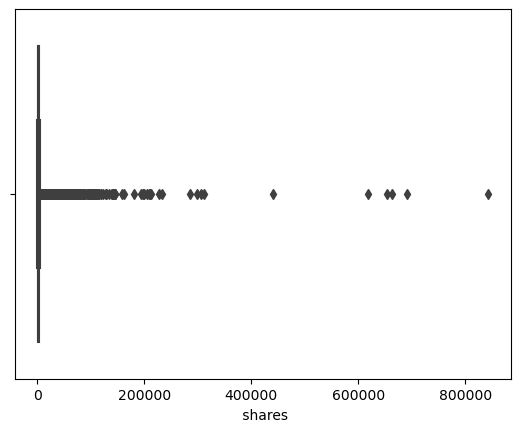

In [784]:
sns.boxplot(x=df[' shares'])
plt.show()

In [786]:
numerical_columns = df.select_dtypes(include = ['int64','float64']).columns

In [788]:
# Plotting box plots for each numerical column
plt.figure(figsize=(15, 6 * len(numerical_columns)))

for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i + 1)  # Adjust the layout (rows, columns)
    sns.boxplot(df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
plt.tight_layout()  
plt.show()

In [789]:
# Function to detect and impute outliers with median using the IQR method
def impute_outliers_with_median(df, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with the median of the column
        median_value = df[col].median()
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median_value, df[col])
    
    return df

# Example usage:

# Assuming df is your DataFrame and numerical_cols contains your numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Impute outliers with median
df_imputed = impute_outliers_with_median(df, numerical_columns)

# View the data after imputing
print("Data after imputing outliers with median:\n", df_imputed.head())

Data after imputing outliers with median:
                                                  url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0 

In [790]:
numerical_columns = df_imputed.select_dtypes(include = ['int64','float64']).columns


# Plotting box plots for each numerical column
plt.figure(figsize=(20, 5 * len(numerical_columns)))

for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i + 1)  # Adjust the layout (rows, columns)
    sns.boxplot(df_imputed[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
plt.tight_layout()  
plt.show()

In [791]:
df_imputed.describe()

timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count  39644.000000     39644.000000       39644.000000      39644.000000   
mean     354.530471        10.381369         469.621456          0.545307   
std      214.163767         2.068798         304.369008          0.095199   
min        8.000000         5.000000           0.000000          0.264228   
25%      164.000000         9.000000         246.000000          0.480564   
50%      339.000000        10.000000         409.000000          0.539226   
75%      542.000000        12.000000         634.000000          0.606178   
max      731.000000        16.000000        1421.000000          0.815385   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       3.964400e+04               39644.000000  39644.000000   
mean        1.000000e+00                   0.695907      8.863334   
std         2.615698e-09                   0.090866      6.316145   
min         1.000000e+00                   0.432432      0.000000   
25%         1.000000e+00                   0.637829      4.000000   
50%         1.000000e+00                   0.690476      8.000000   
75%         1.000000e+00                   0.753425     12.000000   
max         1.000000e+00                   0.947368     29.000000   

        num_self_hrefs      num_imgs    num_videos  ...  \
count     39644.000000  39644.000000  39644.000000  ...   
mean          2.663076      1.284633      0.349637  ...   
std           1.921266      1.417582      0.581233  ...   
min           0.000000      0.000000      0.000000  ...   
25%           1.000000      1.000000      0.000000  ...   
50%           3.000000      1.000000      0.000000  ...   
75%           4.000000      1.000000      1.000000  ...   
max           8.000000      8.000000      2.000000  ...   

        min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
count            39644.000000            39644.000000            39644.000000   
mean                 0.081553                0.756728               -0.250787   
std                  0.037568                0.247786                0.112019   
min                  0.000000                0.000000               -0.540476   
25%                  0.050000                0.600000               -0.320332   
50%                  0.100000                0.800000               -0.253333   
75%                  0.100000                1.000000               -0.186905   
max                  0.166667                1.000000                0.000000   

        min_negative_polarity   max_negative_polarity   title_subjectivity  \
count            39644.000000            39644.000000         39644.000000   
mean                -0.521944               -0.089461             0.282353   
std                  0.290290                0.047945             0.324247   
min                 -1.000000               -0.230769             0.000000   
25%                 -0.700000               -0.125000             0.000000   
50%                 -0.500000               -0.100000             0.150000   
75%                 -0.300000               -0.050000             0.500000   
max                  0.000000                0.000000             1.000000   

        title_sentiment_polarity   abs_title_subjectivity  \
count               39644.000000             39644.000000   
mean                    0.032506                 0.341843   
std                     0.100318                 0.188791   
min                    -0.222222                 0.000000   
25%                     0.000000                 0.166667   
50%                     0.000000                 0.500000   
75%                     0.000000                 0.500000   
max                     0.375000                 0.500000   

        abs_title_sentiment_polarity        shares  
count                   39644.000000  39644.000000  
mean                        0.119955   1640.819695  
std                 

In [796]:
numerical_cols = df_imputed.select_dtypes(include=['int64', 'float64']).columns

# Function to detect outliers using the IQR method
def detect_outliers_iqr(df_imputed, columns):
    outlier_info = {}
    
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df_imputed[col].quantile(0.25)
        Q3 = df_imputed[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Detect outliers
        outliers = df_imputed[(df_imputed[col] < lower_bound) | (df_imputed[col] > upper_bound)]
        
        # Store outlier information
        outlier_info[col] = {
            "Number of outliers": len(outliers),
            "Lower bound": lower_bound,
            "Upper bound": upper_bound,
            "Outliers": outliers[col].values
        }
        
        # Print the results
        print(f"Column: {col}")
        print(f"Number of outliers detected: {len(outliers)}")
        print(f"Outliers:\n{outliers[col].values}")
        print('-'*50)
    
    return outlier_info


# Detect outliers using the IQR method
outlier_info = detect_outliers_iqr(df_imputed, numerical_cols)

Column:  timedelta
Number of outliers detected: 0
Outliers:
[]
--------------------------------------------------
Column:  n_tokens_title
Number of outliers detected: 0
Outliers:
[]
--------------------------------------------------
Column:  n_tokens_content
Number of outliers detected: 1030
Outliers:
[1248. 1248. 1225. ... 1300. 1250. 1335.]
--------------------------------------------------
Column:  n_unique_tokens
Number of outliers detected: 278
Outliers:
[0.79999999 0.79999999 0.79999999 0.28484321 0.79545454 0.80851063
 0.2768514  0.28323699 0.80152671 0.81443298 0.79999999 0.26651406
 0.79999999 0.79999999 0.81521738 0.80829015 0.80555554 0.80722891
 0.80487804 0.80219779 0.80681817 0.80459769 0.79999998 0.79674796
 0.80434782 0.8080808  0.80681817 0.79761904 0.81481481 0.79591836
 0.79999999 0.79999999 0.79999999 0.80645161 0.80898875 0.8130841
 0.8076923  0.28667703 0.79816513 0.28701145 0.80555554 0.80898875
 0.28614458 0.8        0.2830033  0.28525896 0.29116945 0.80152671
 

In [798]:
numerical_cols = df_imputed.select_dtypes(include=['int64', 'float64']).columns


# Function to detect and remove outliers using the IQR method
def remove_outliers_iqr(df_imputed , columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df_imputed[col].quantile(0.25)
        Q3 = df_imputed[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove rows with outliers
        df_imputed = df_imputed[(df_imputed[col] >= lower_bound) & (df_imputed[col] <= upper_bound)]
    
    return df_imputed

# Remove outliers from the dataset
df_no_outliers = remove_outliers_iqr(df_imputed, numerical_cols)

# View the dataset after removing outliers
print("Data after removing outliers:\n", df_no_outliers.head())

Data after removing outliers:
                                                    url   timedelta  \
82   http://mashable.com/2013/01/08/nfl-arian-foste...       730.0   
149      http://mashable.com/2013/01/09/mint-the-coin/       729.0   
194  http://mashable.com/2013/01/10/cheaper-iphone-...       728.0   
203  http://mashable.com/2013/01/10/earth-like-plan...       728.0   
205        http://mashable.com/2013/01/10/faster-wifi/       728.0   

      n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
82              11.0              281.0          0.610714                1.0   
149             10.0              614.0          0.530579                1.0   
194             10.0              289.0          0.586957                1.0   
203              9.0              757.0          0.449198                1.0   
205             10.0              357.0          0.525424                1.0   

      n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_i

In [800]:
df_no_outliers

url   timedelta  \
82     http://mashable.com/2013/01/08/nfl-arian-foste...       730.0   
149        http://mashable.com/2013/01/09/mint-the-coin/       729.0   
194    http://mashable.com/2013/01/10/cheaper-iphone-...       728.0   
203    http://mashable.com/2013/01/10/earth-like-plan...       728.0   
205          http://mashable.com/2013/01/10/faster-wifi/       728.0   
...                                                  ...         ...   
39609  http://mashable.com/2014/12/26/roberto-orci-st...         9.0   
39628  http://mashable.com/2014/12/27/facebook-year-i...         9.0   
39631  http://mashable.com/2014/12/27/japan-elderly-d...         9.0   
39633  http://mashable.com/2014/12/27/lbj-adviser-sla...         9.0   
39642     http://mashable.com/2014/12/27/ukraine-blasts/         8.0   

        n_tokens_title   n_tokens_content   n_unique_tokens  \
82                11.0              281.0          0.610714   
149               10.0              614.0          0.530579   
194               10.0              289.0          0.586957   
203                9.0              757.0          0.449198   
205               10.0              357.0          0.525424   
...                ...                ...               ...   
39609              8.0              437.0          0.547564   
39628             14.0              626.0          0.552504   
39631             13.0              746.0          0.465306   
39633              9.0              614.0          0.476033   
39642              6.0              682.0          0.539493   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
82                   1.0                   0.766467         5.0   
149                  1.0                   0.750000        11.0   
194                  1.0                   0.724551         8.0   
203                  1.0                   0.634033        11.0   
205                  1.0                   0.650442         6.0   
...                  ...                        ...         ...   
39609                1.0                   0.780992         5.0   
39628                1.0                   0.759791         4.0   
39631                1.0                   0.735849         4.0   
39633                1.0                   0.614987        10.0   
39642                1.0                   0.692661        10.0   

        num_self_hrefs   num_imgs  ...   min_positive_polarity  \
82                 4.0        1.0  ...                0.136364   
149                2.0        1.0  ...                0.062500   
194                7.0        1.0  ...                0.062500   
203                0.0        1.0  ...                0.100000   
205                4.0        1.0  ...                0.062500   
...                ...        ...  ...                     ...   
39609              2.0        1.0  ...                0.100000   
39628              2.0        1.0  ...                0.033333   
39631              1.0        1.0  ...                0.100000   
39633              0.0        1.0  ...                0.050000   
39642              1.0        1.0  ...                0.062500   

        max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
82                       0.50               -0.278472                    -0.5   
149                      1.00               -0.247222                    -0.5   
194                      1.00               -0.206250                    -0.3   
203                      1.00               -0.227381                    -0.5   
205                      0.70               -0.181111                    -0.4   
...                       ...                     ...                     ...   
39609                    0.50               -0.151111                    -0.2   
39628                    0.80               -0.253333                    -1.0   
39631                    0.85               -0.375000                    -1.0   
39633                  

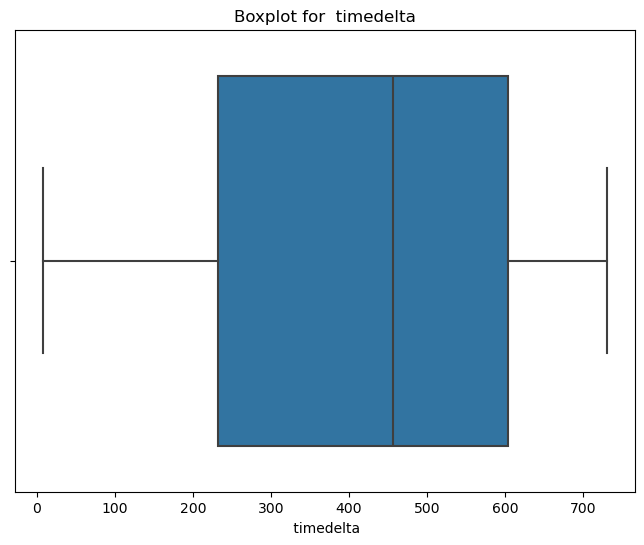

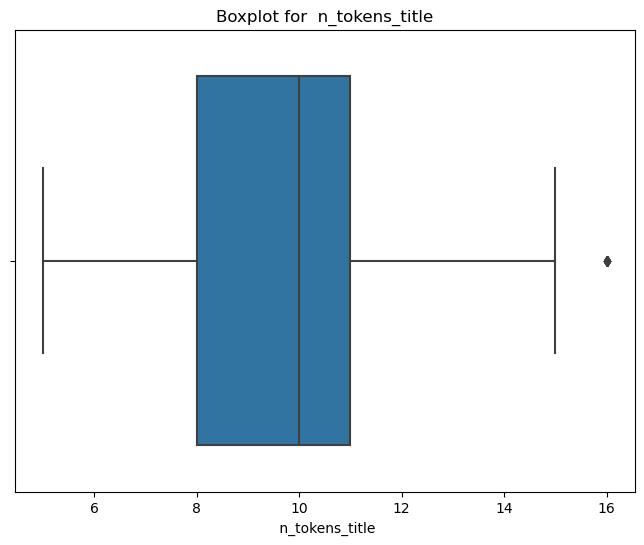

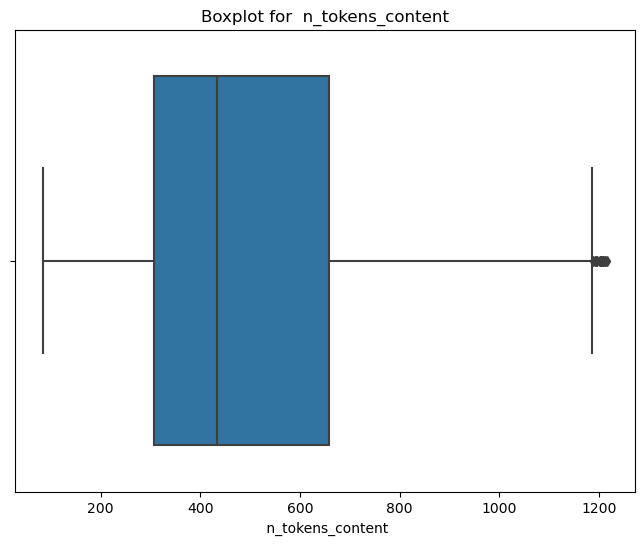

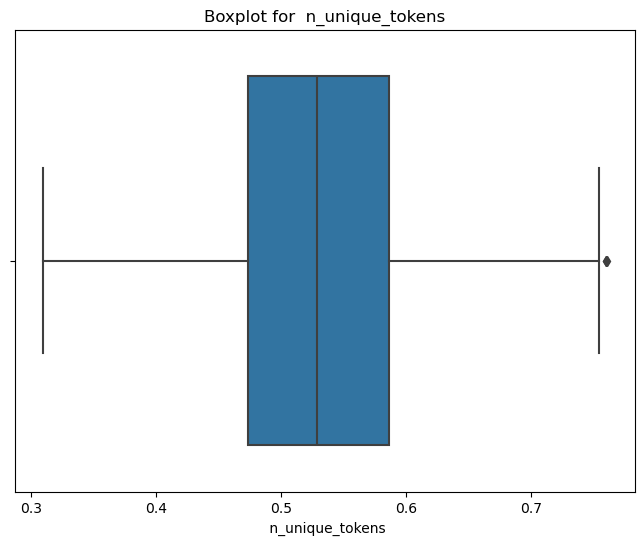

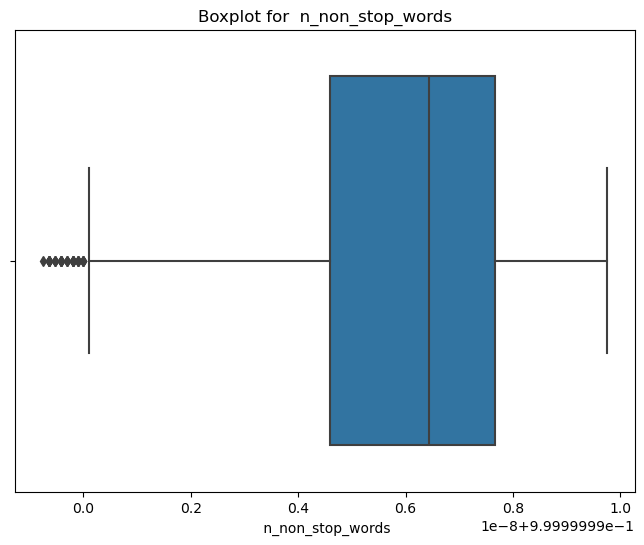

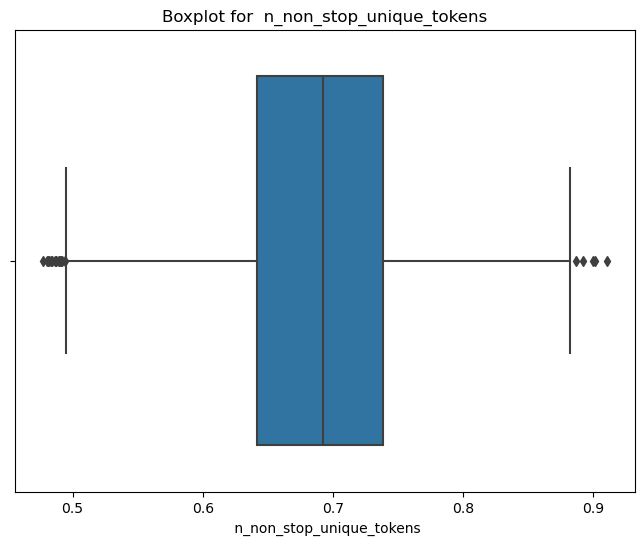

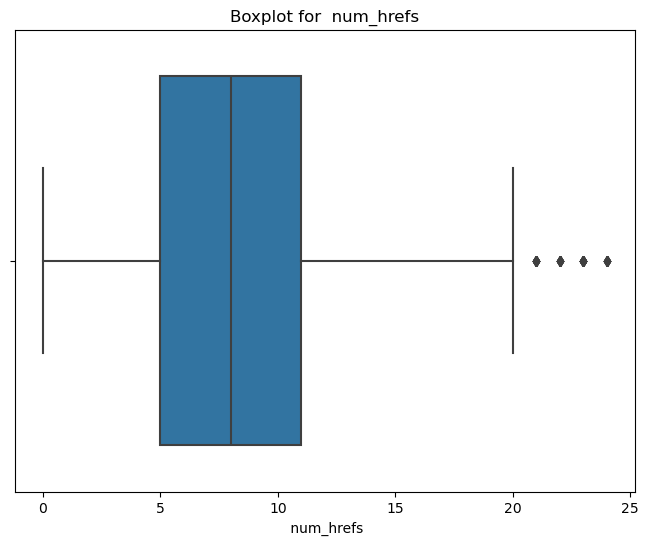

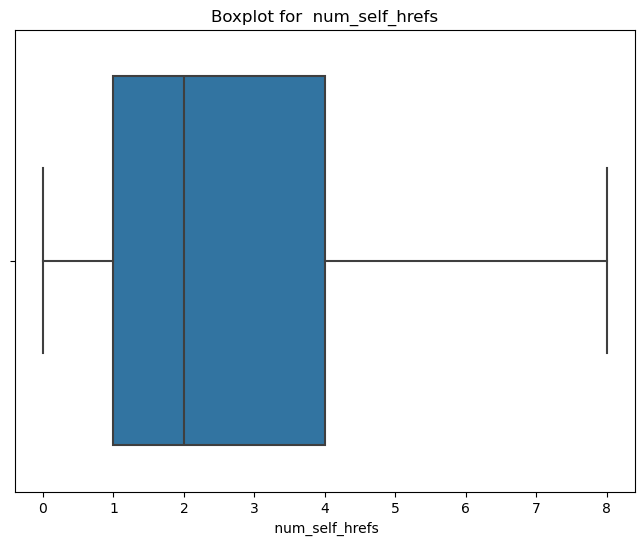

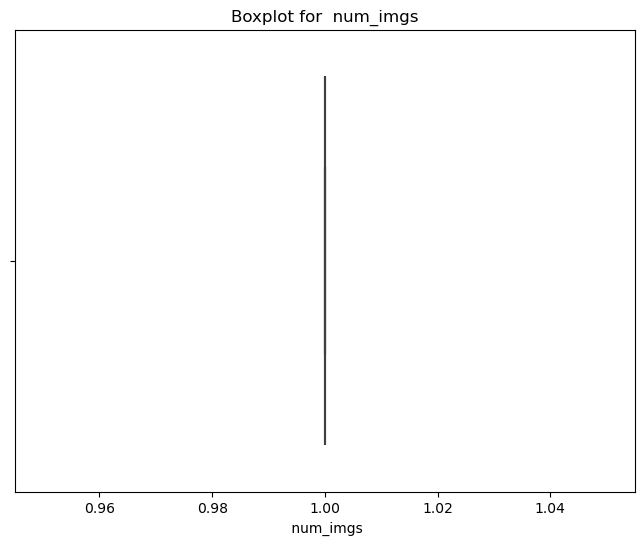

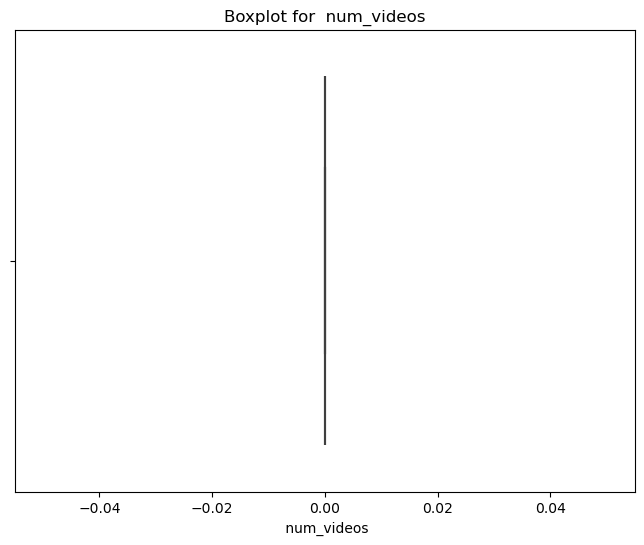

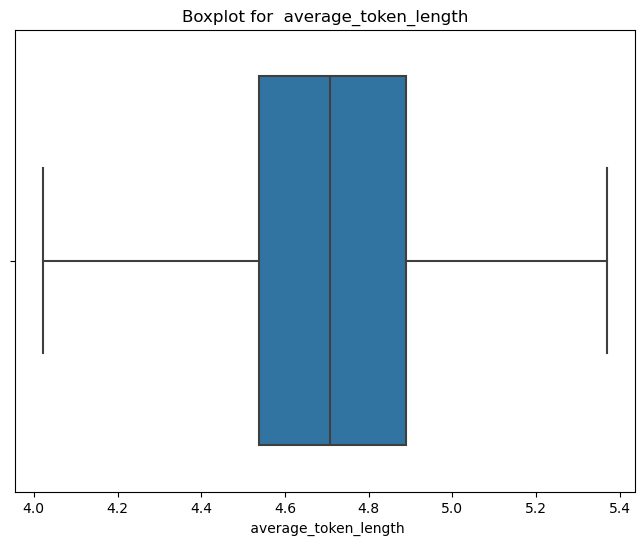

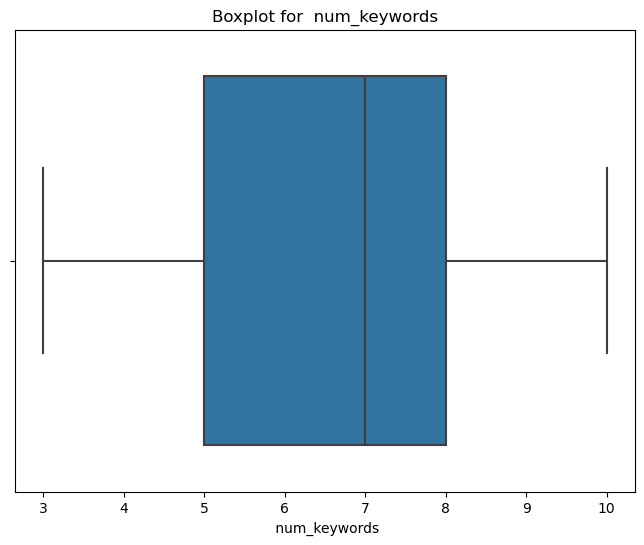

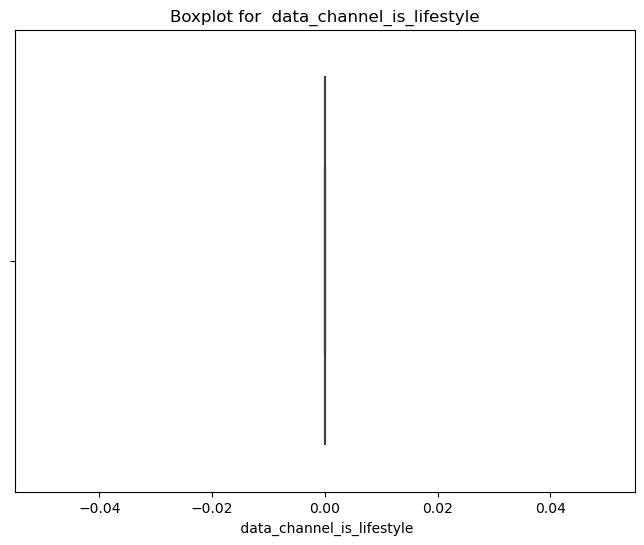

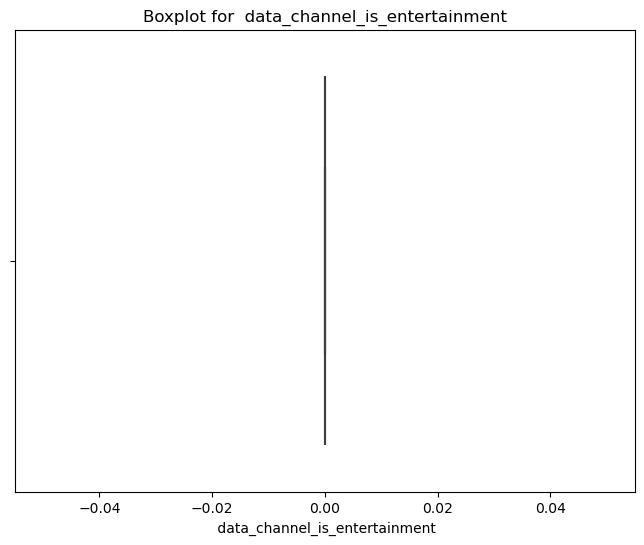

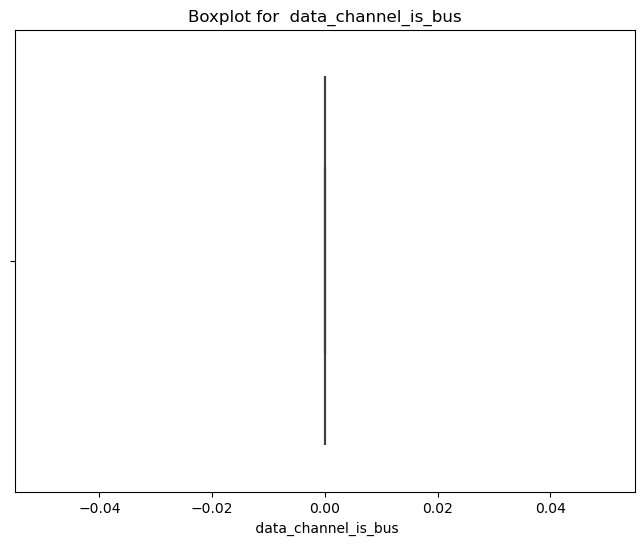

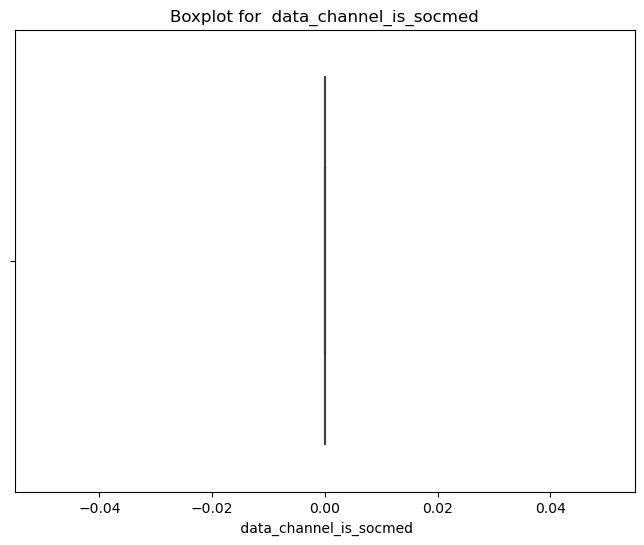

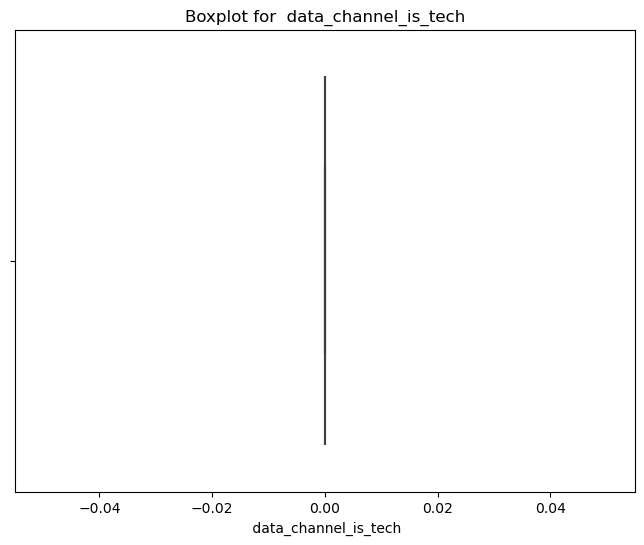

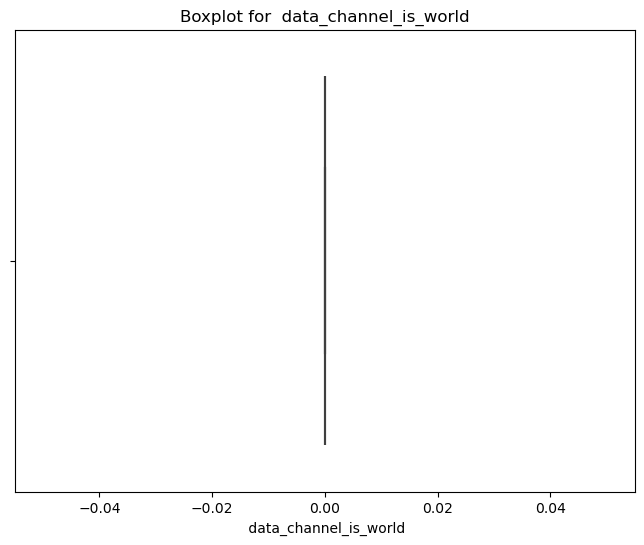

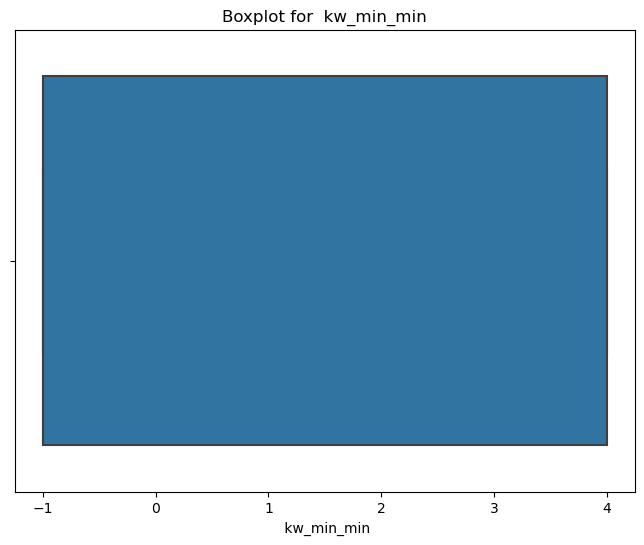

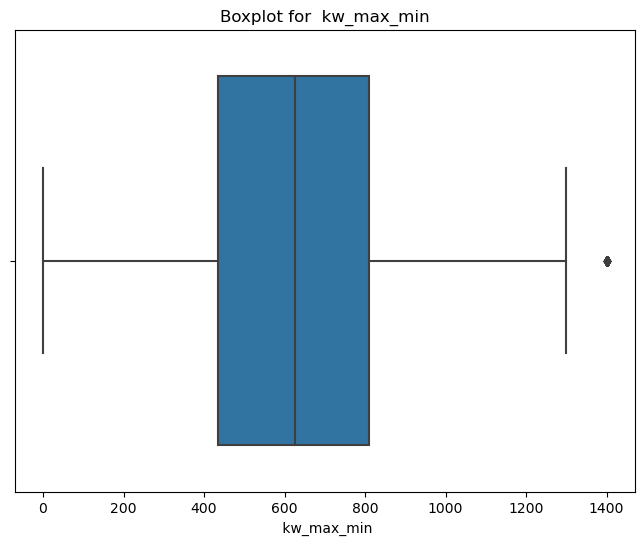

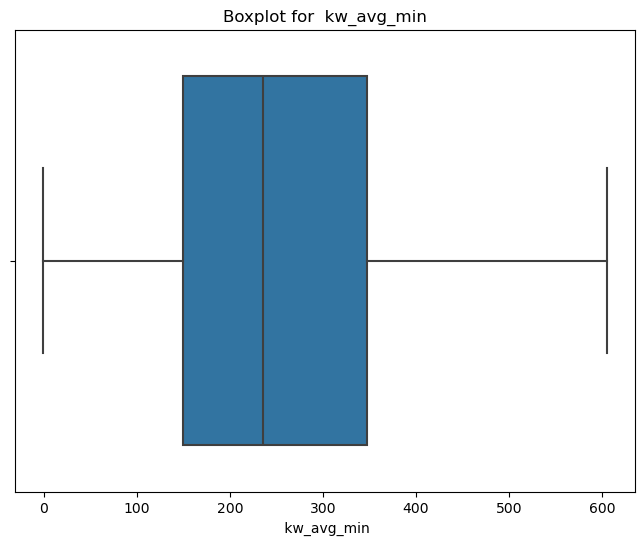

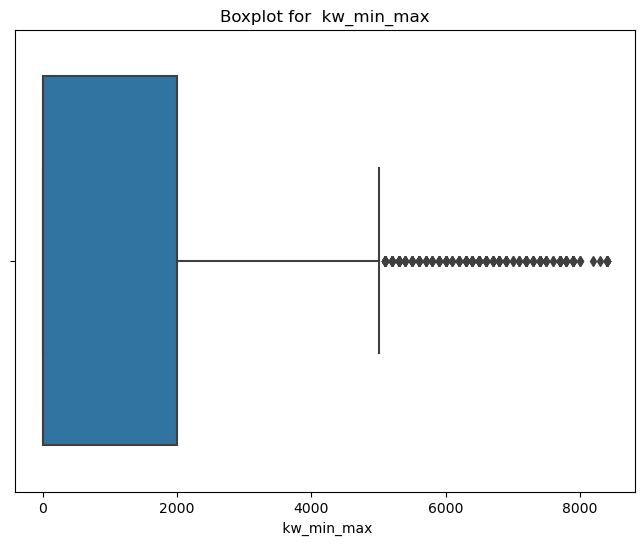

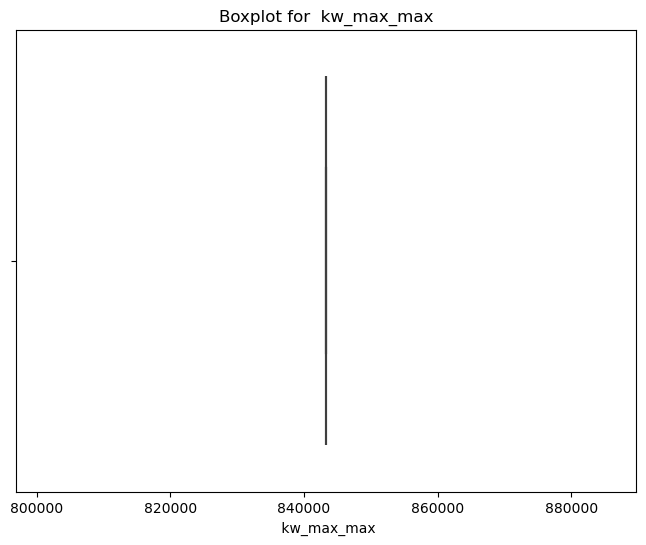

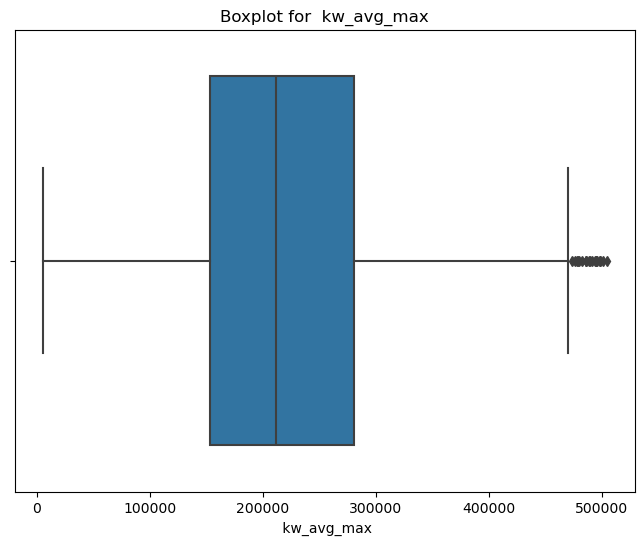

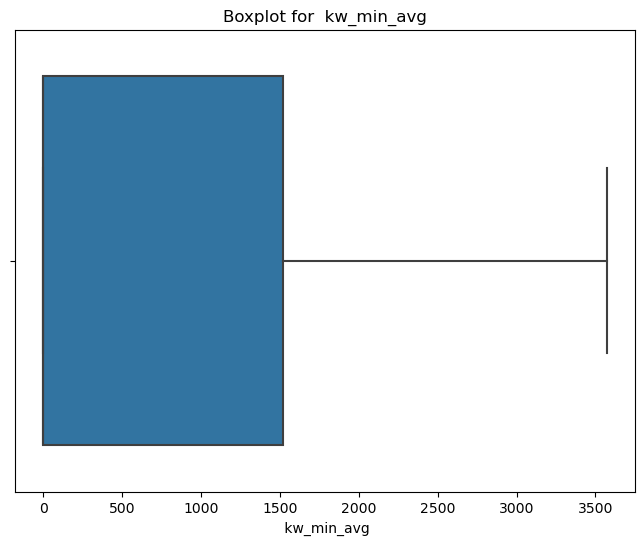

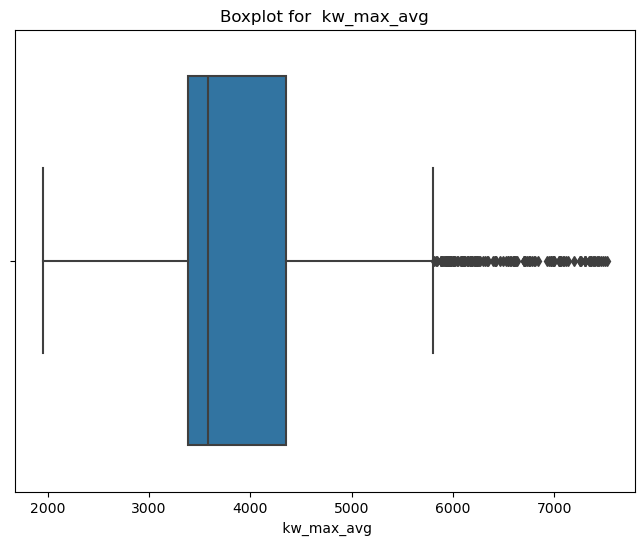

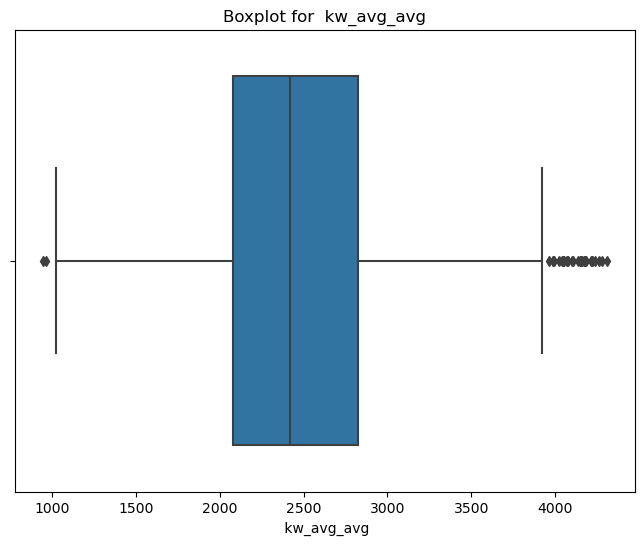

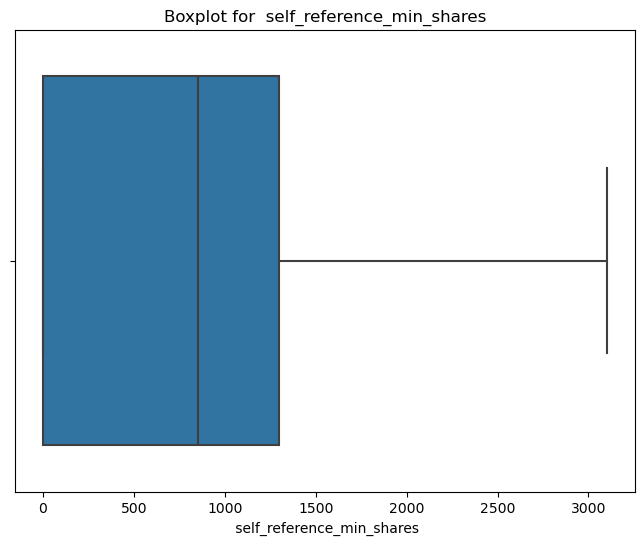

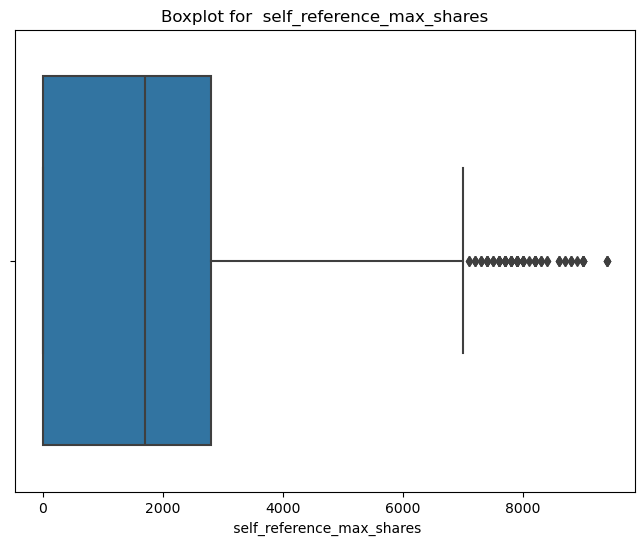

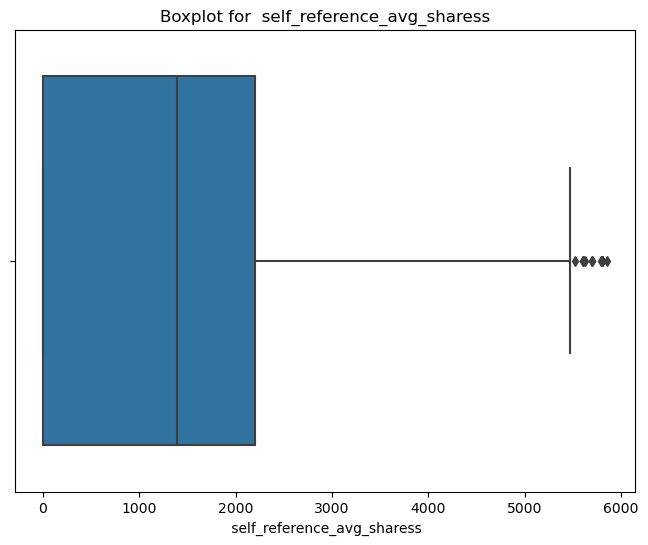

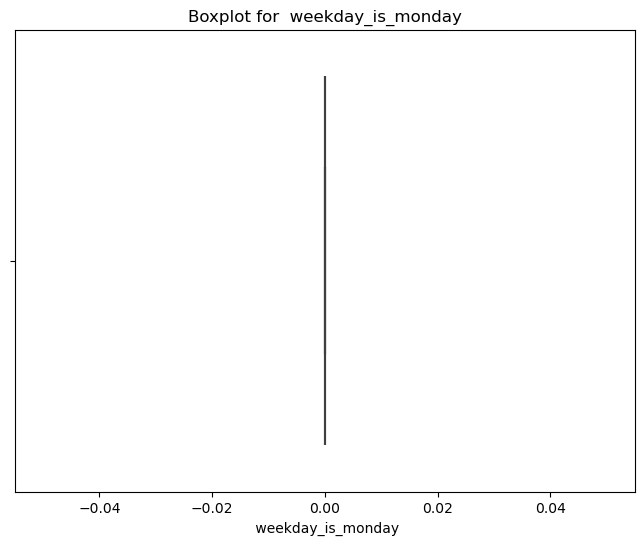

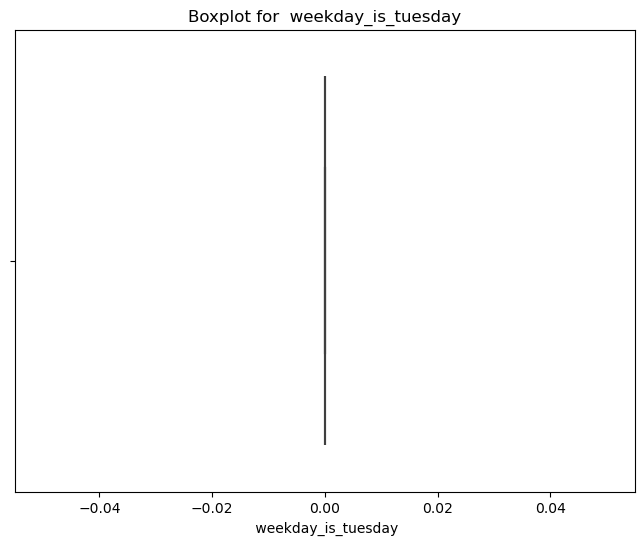

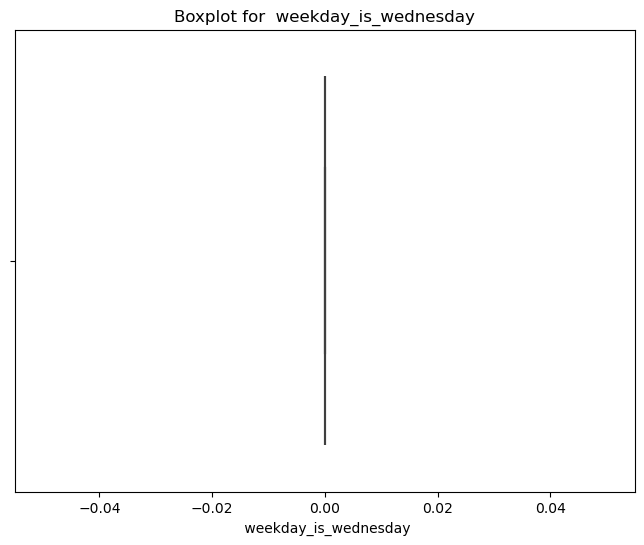

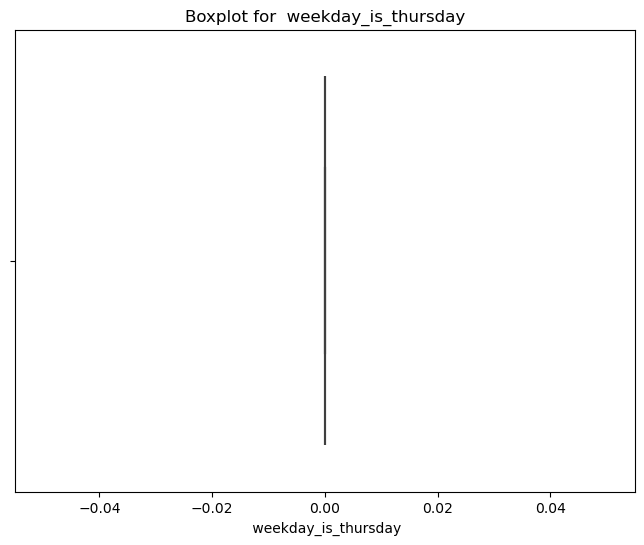

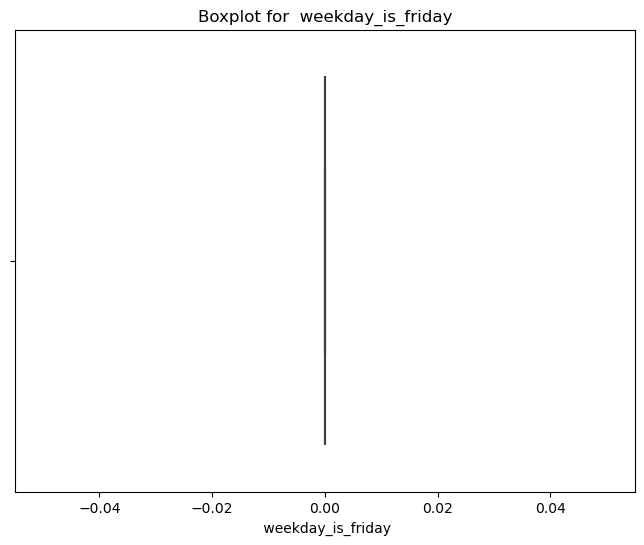

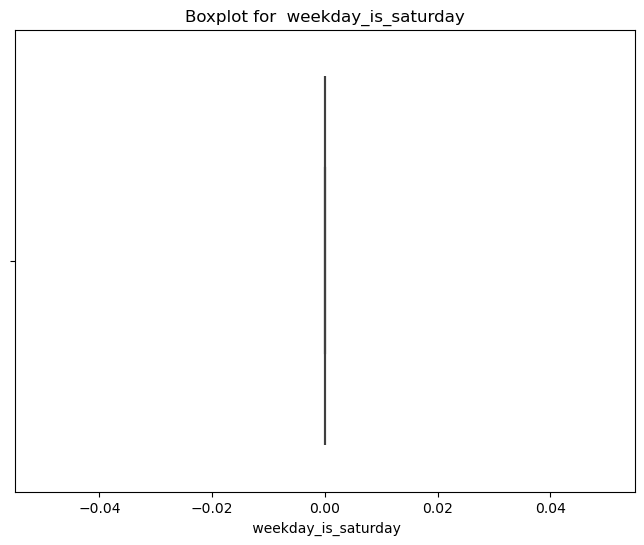

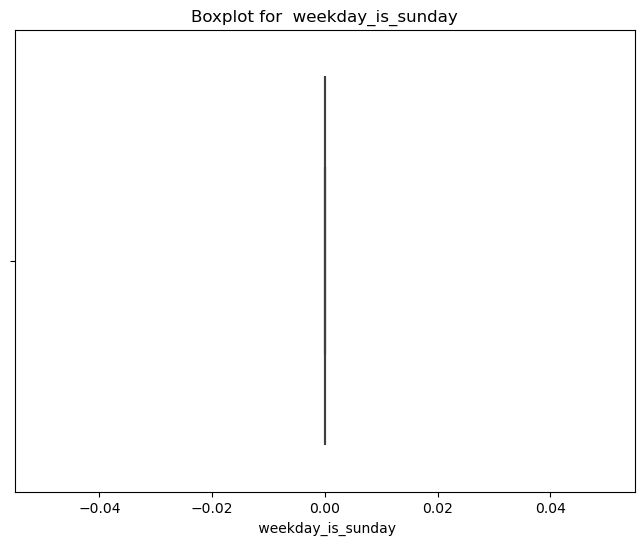

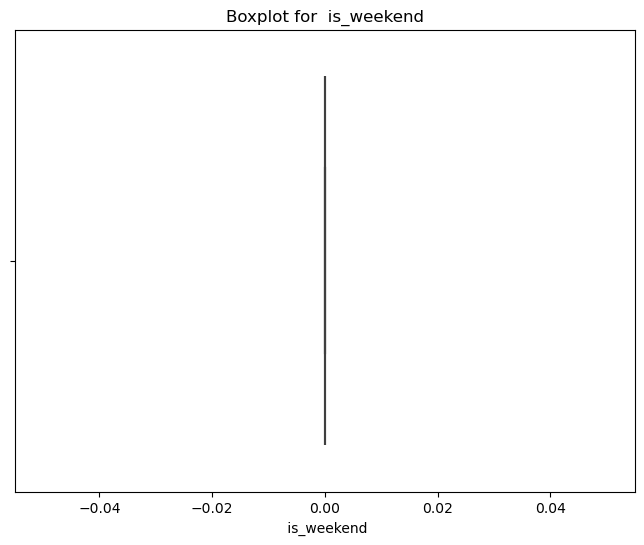

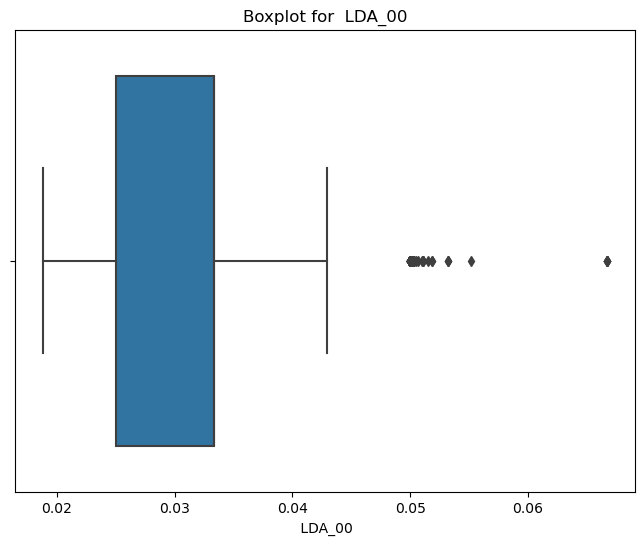

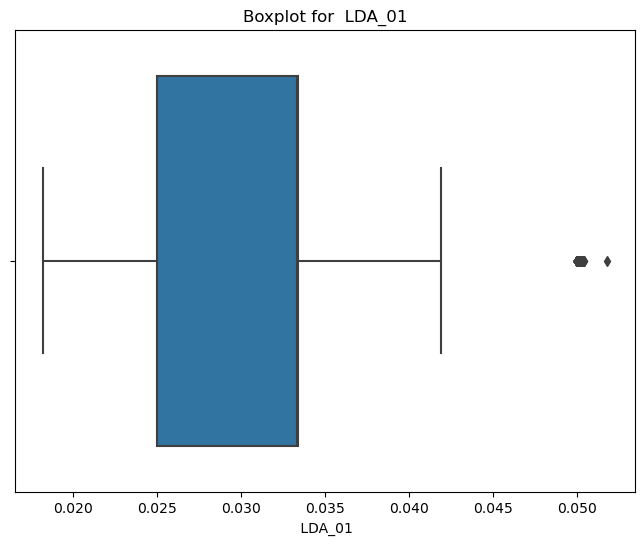

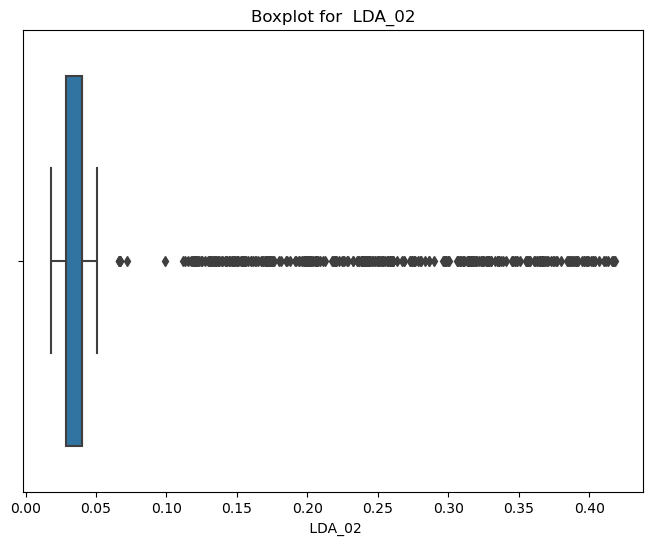

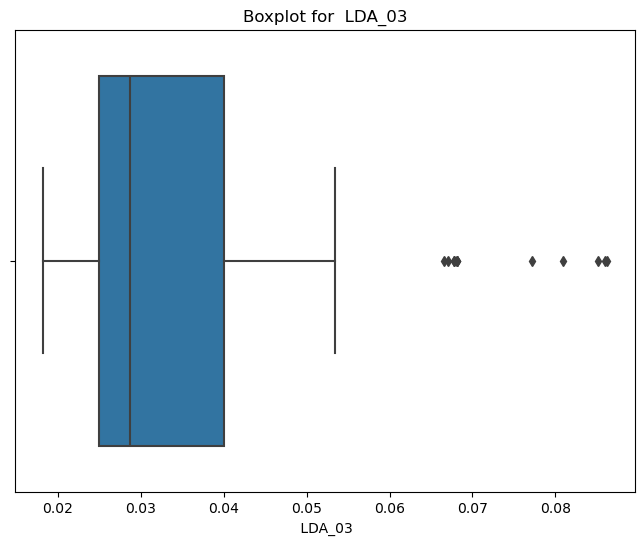

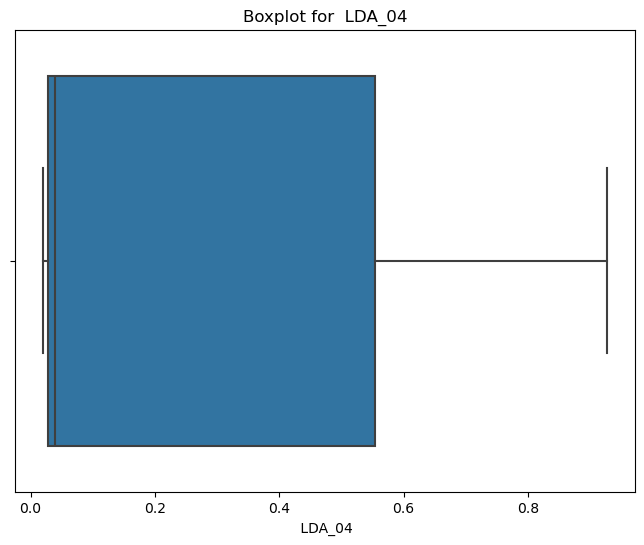

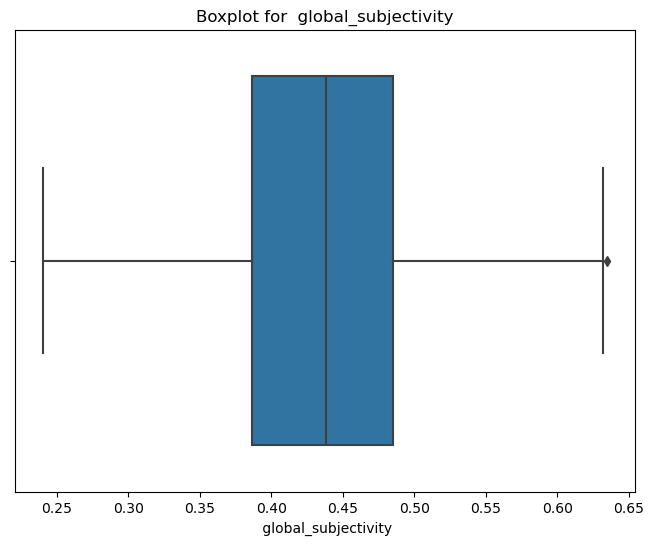

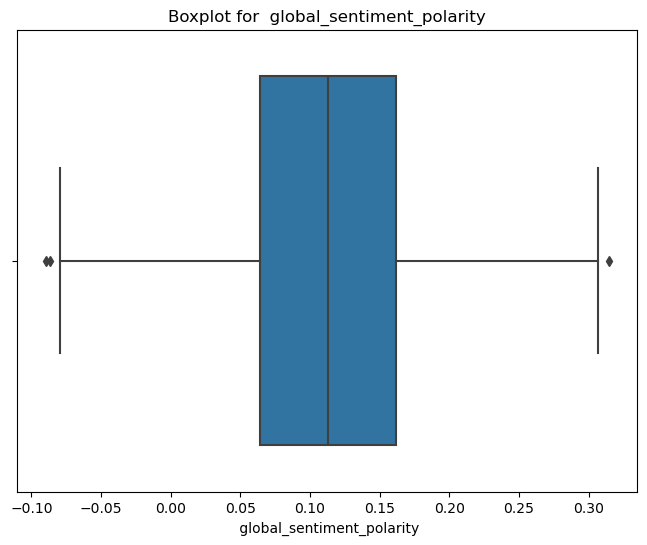

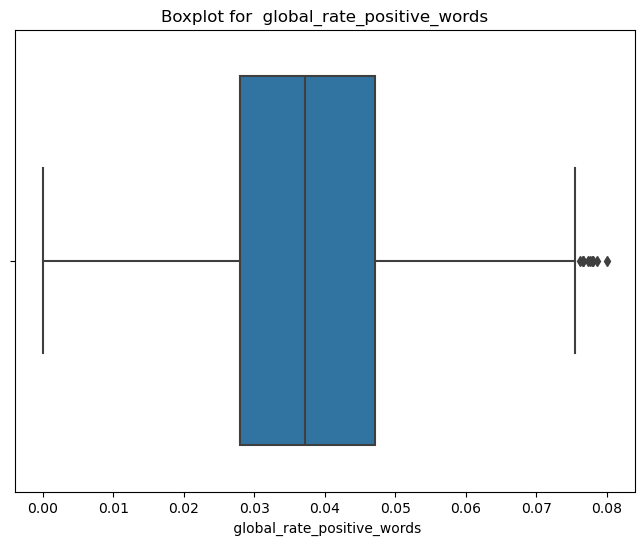

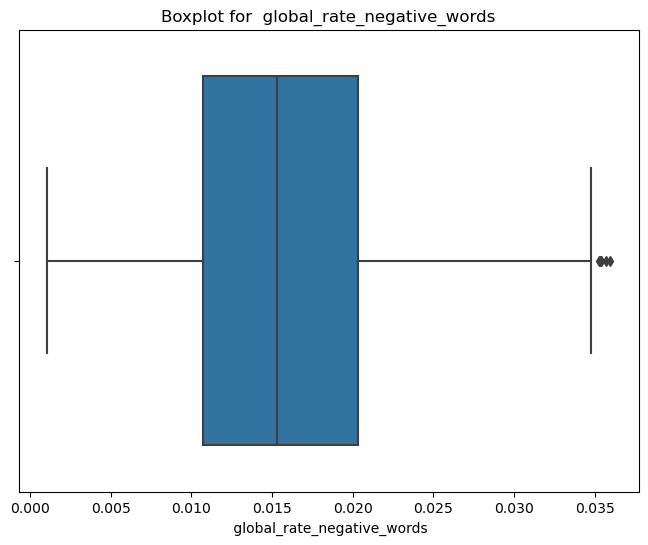

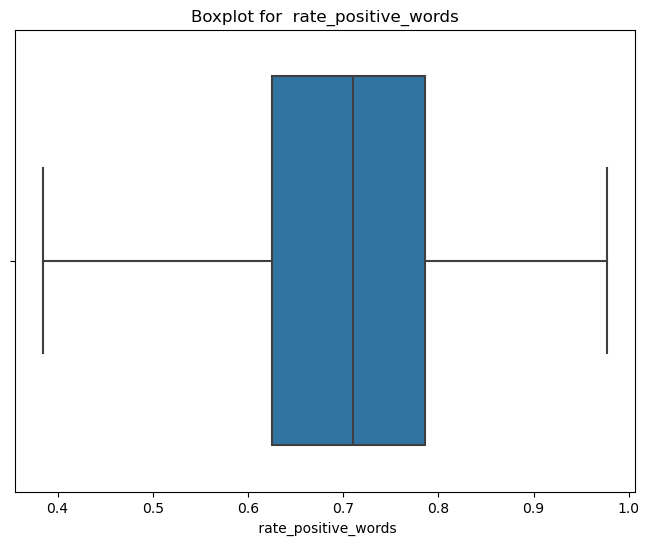

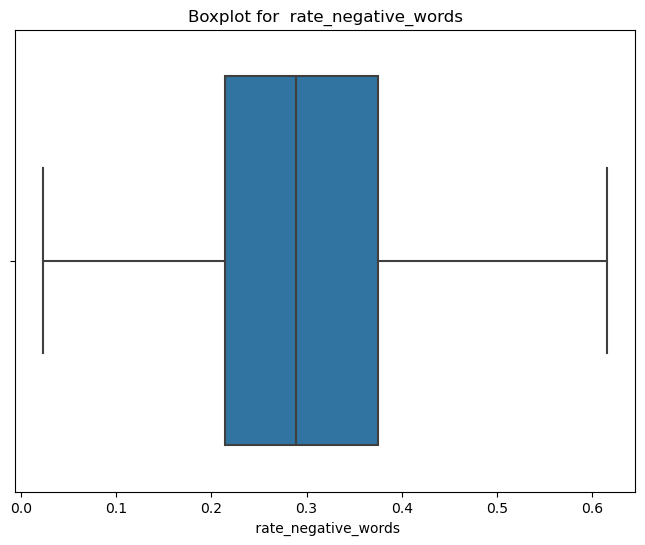

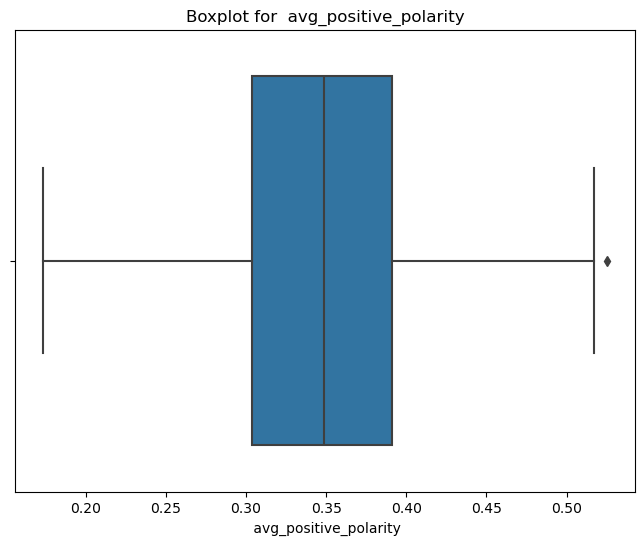

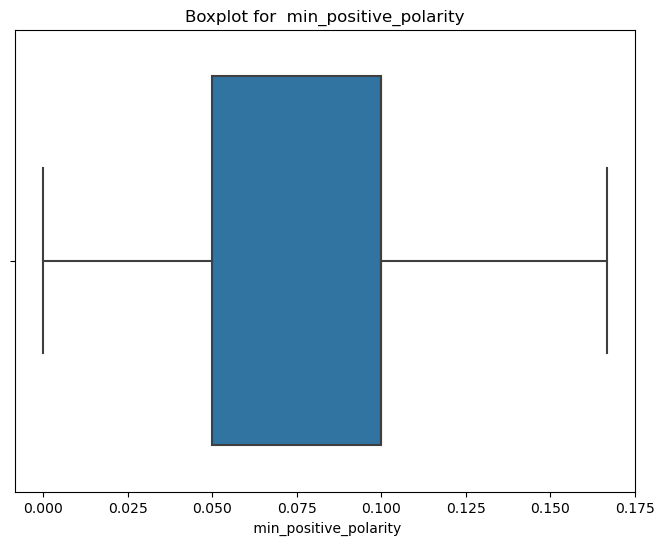

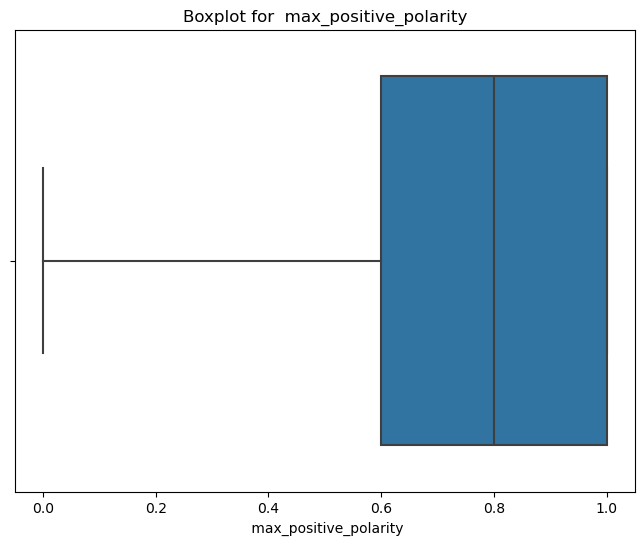

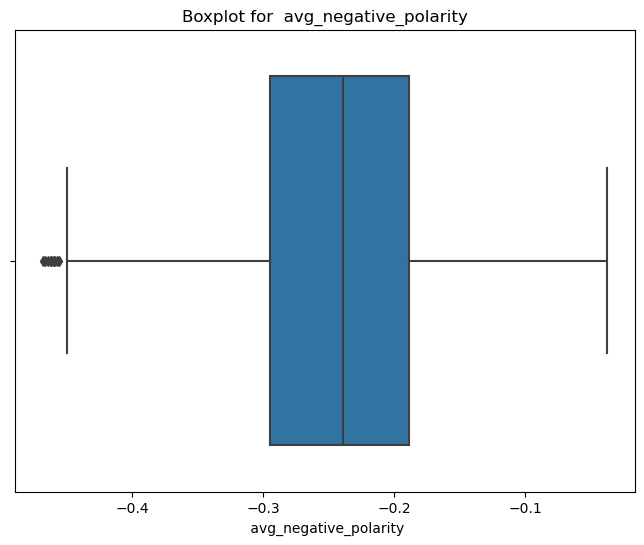

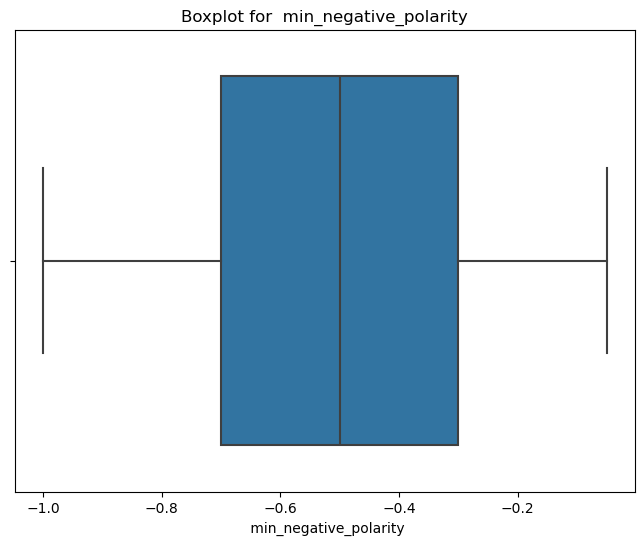

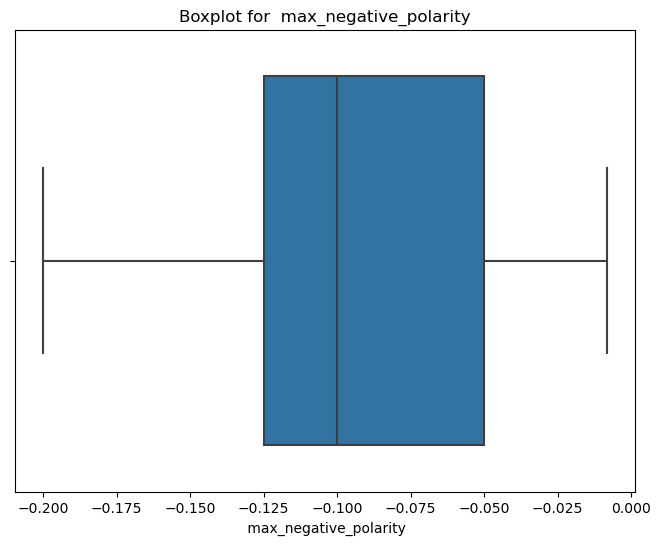

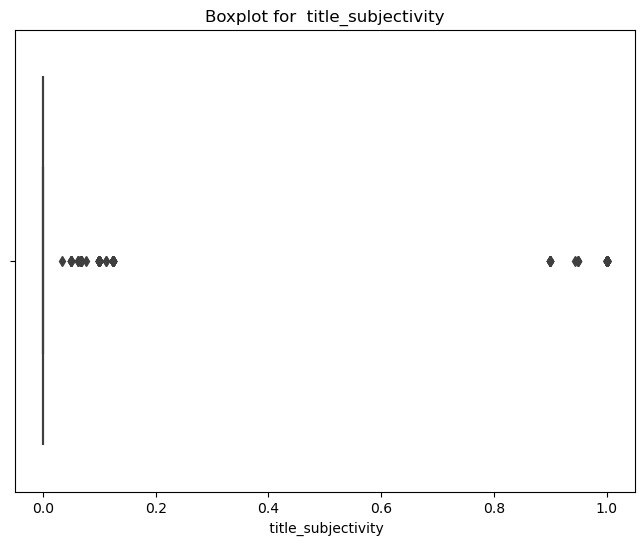

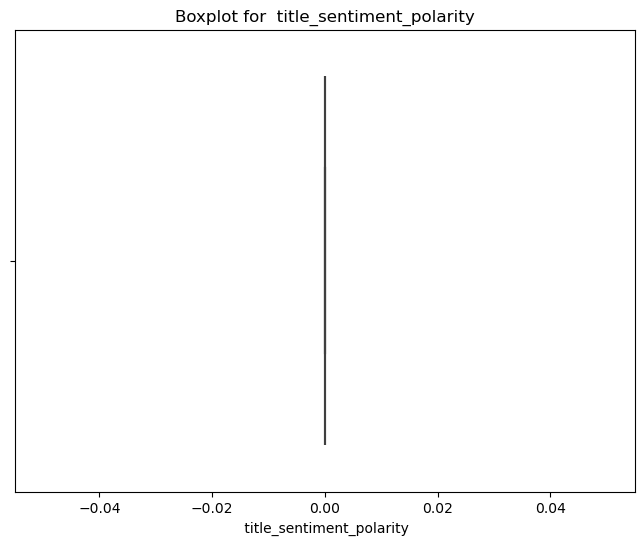

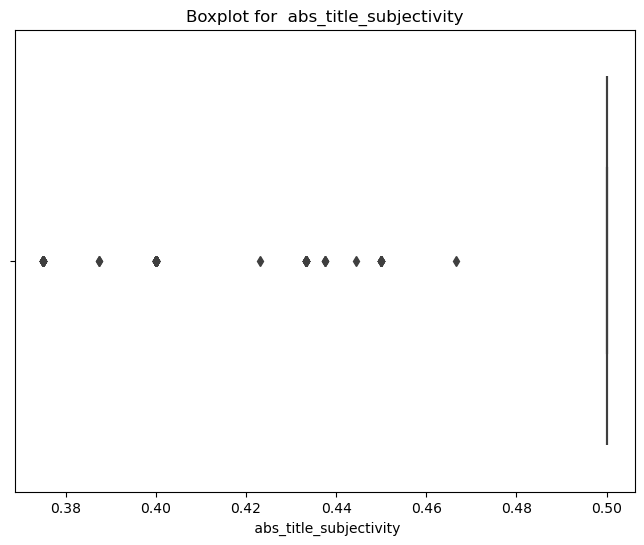

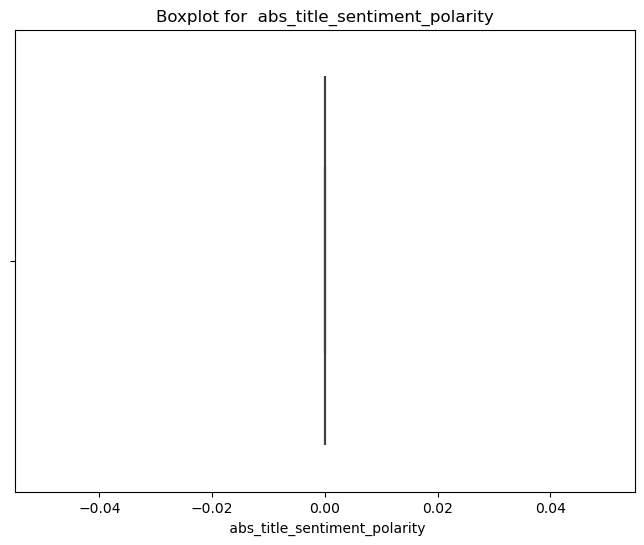

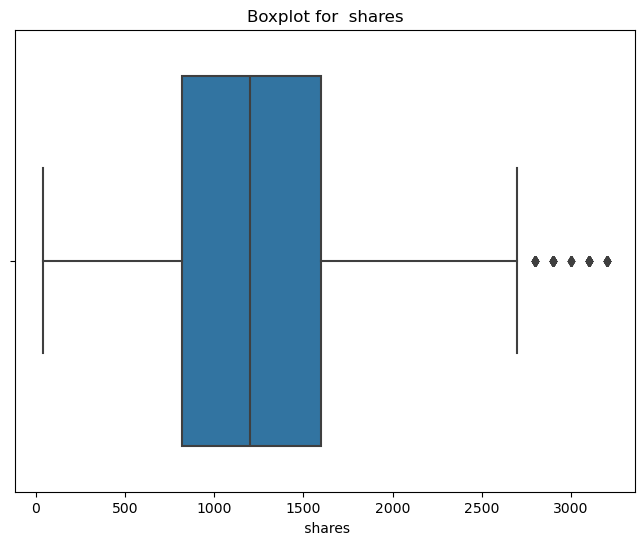

In [530]:
# Function to draw boxplots for all numerical columns in df_no_outliers
def draw_boxplots(df_no_outliers):
    numerical_cols = df_no_outliers.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df_no_outliers[col])
        plt.title(f'Boxplot for {col}')
        plt.show()

# Example usage:
draw_boxplots(df_no_outliers)

In [802]:
numerical_cols = df_no_outliers.select_dtypes(include=['int64', 'float64']).columns

# Function to detect outliers using the IQR method
def detect_outliers_iqr(df_no_outliers, columns):
    outlier_info = {}
    
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df_no_outliers[col].quantile(0.25)
        Q3 = df_no_outliers[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Detect outliers
        outliers = df_no_outliers[(df_no_outliers[col] < lower_bound) | (df_no_outliers[col] > upper_bound)]
        
        # Store outlier information
        outlier_info[col] = {
            "Number of outliers": len(outliers),
            "Lower bound": lower_bound,
            "Upper bound": upper_bound,
            "Outliers": outliers[col].values
        }
        
        # Print the results
        print(f"Column: {col}")
        print(f"Number of outliers detected: {len(outliers)}")
        print(f"Outliers:\n{outliers[col].values}")
        print('-'*50)
    
    return outlier_info


# Detect outliers using the IQR method
outlier_info = detect_outliers_iqr(df_no_outliers, numerical_cols)

Column:  timedelta
Number of outliers detected: 0
Outliers:
[]
--------------------------------------------------
Column:  n_tokens_title
Number of outliers detected: 10
Outliers:
[16. 16. 16. 16. 16. 16. 16. 16. 16. 16.]
--------------------------------------------------
Column:  n_tokens_content
Number of outliers detected: 15
Outliers:
[1209. 1202. 1188. 1194. 1209. 1193. 1213. 1203. 1209. 1213. 1216. 1205.
 1205. 1206. 1196.]
--------------------------------------------------
Column:  n_unique_tokens
Number of outliers detected: 3
Outliers:
[0.76041666 0.75999999 0.75999999]
--------------------------------------------------
Column:  n_non_stop_words
Number of outliers detected: 33
Outliers:
[0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999999 0.99

In [804]:
# Function to detect and impute outliers with mean using the IQR method
def impute_outliers_with_mean(df_no_outliers, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df_no_outliers[col].quantile(0.25)
        Q3 = df_no_outliers[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with the median of the column
        mean_value = df_no_outliers[col].mean()
        df_no_outliers[col] = np.where((df_no_outliers[col] < lower_bound) | (df_no_outliers[col] > upper_bound), mean_value, df_no_outliers[col])
    
    return df_no_outliers

# Example usage:

# Assuming df is your DataFrame and numerical_cols contains your numerical columns
numerical_columns = df_no_outliers.select_dtypes(include=['int64', 'float64']).columns

# Impute outliers with median
df_imputed_mean = impute_outliers_with_mean(df_no_outliers, numerical_columns)

# View the data after imputing
print("Data after imputing outliers with mean:\n", df_imputed_mean.head())

Data after imputing outliers with mean:
                                                    url   timedelta  \
82   http://mashable.com/2013/01/08/nfl-arian-foste...       730.0   
149      http://mashable.com/2013/01/09/mint-the-coin/       729.0   
194  http://mashable.com/2013/01/10/cheaper-iphone-...       728.0   
203  http://mashable.com/2013/01/10/earth-like-plan...       728.0   
205        http://mashable.com/2013/01/10/faster-wifi/       728.0   

      n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
82              11.0              281.0          0.610714                1.0   
149             10.0              614.0          0.530579                1.0   
194             10.0              289.0          0.586957                1.0   
203              9.0              757.0          0.449198                1.0   
205             10.0              357.0          0.525424                1.0   

      n_non_stop_unique_tokens   num_hrefs   num_self_hre

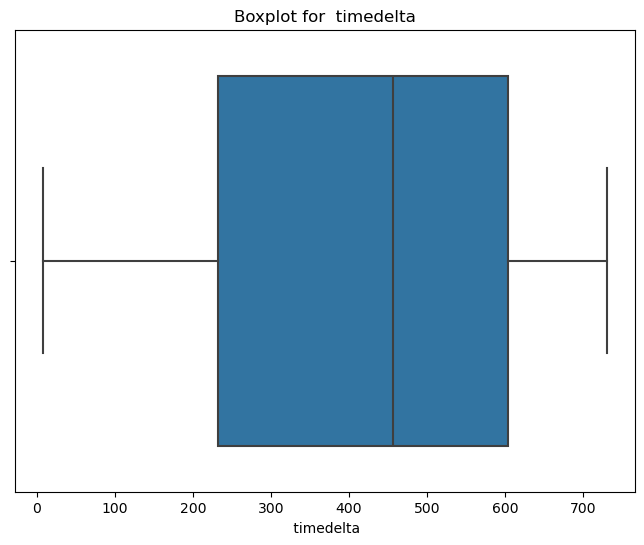

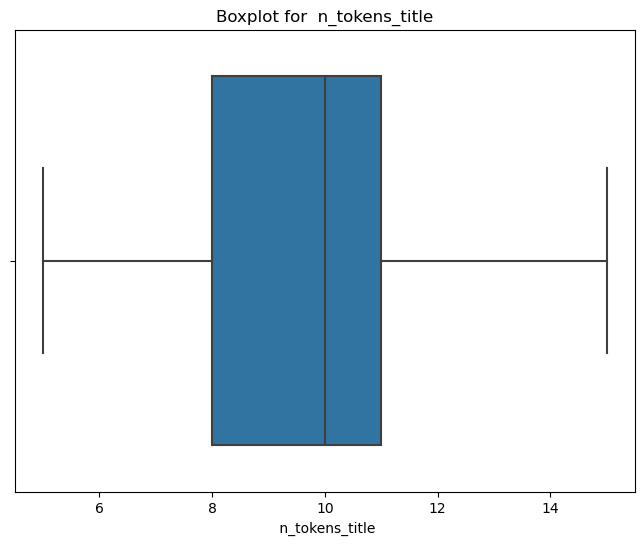

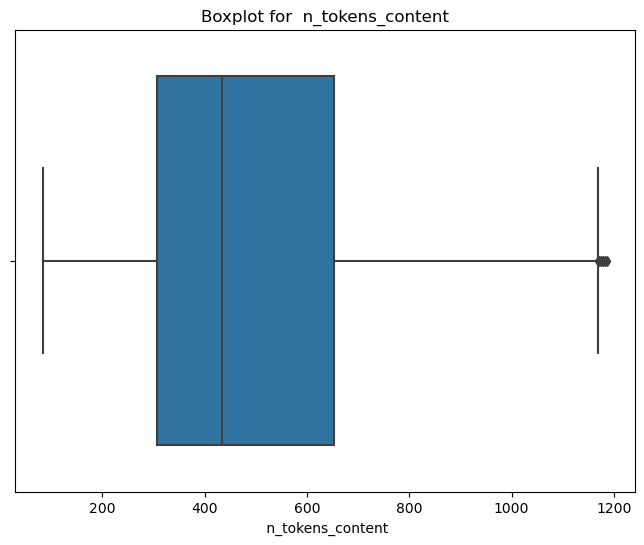

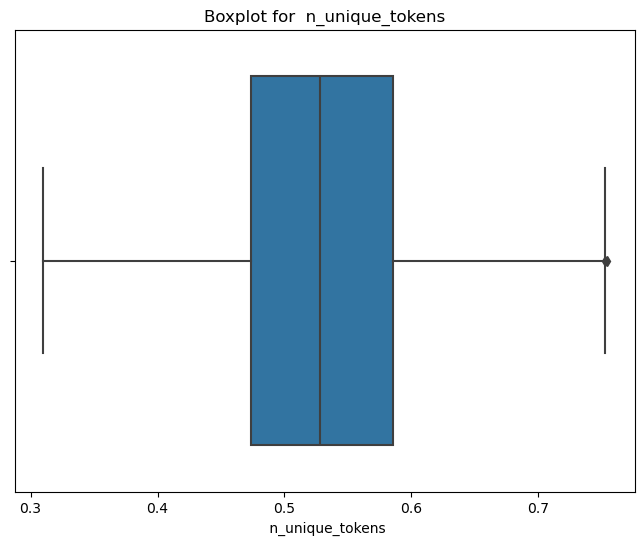

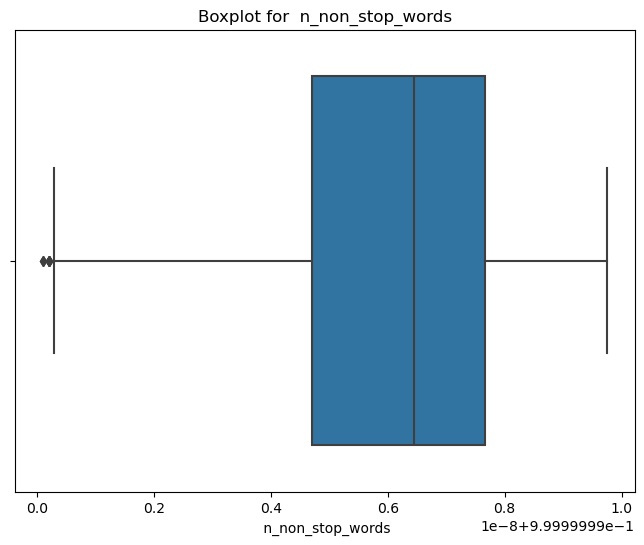

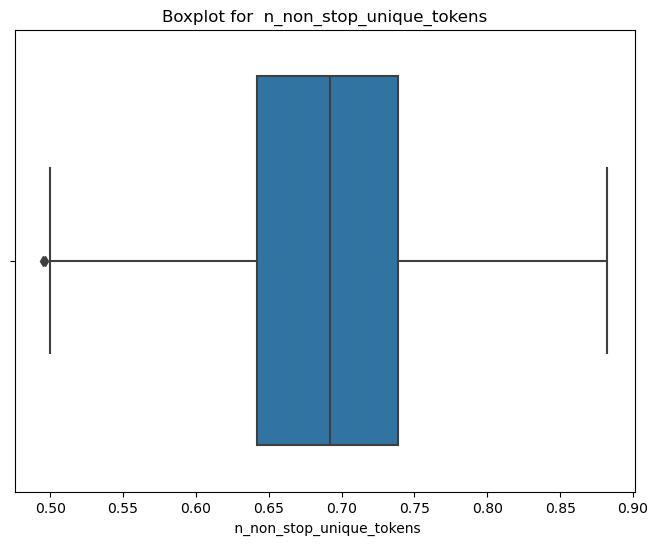

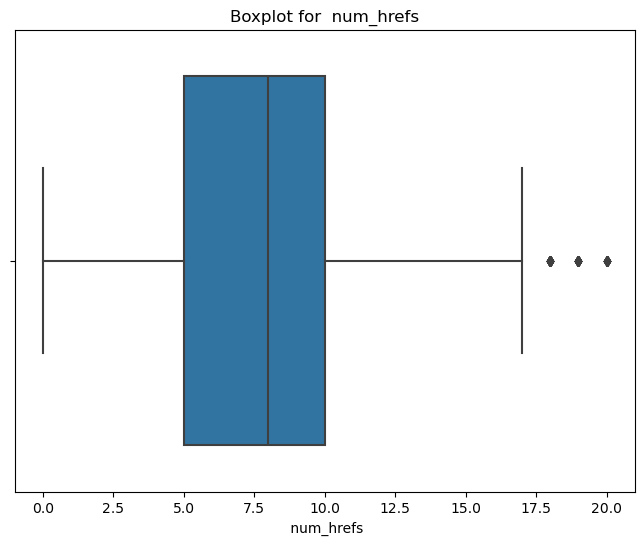

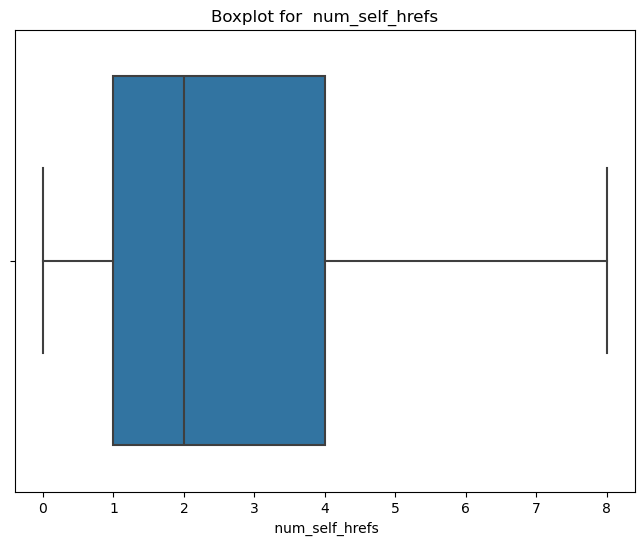

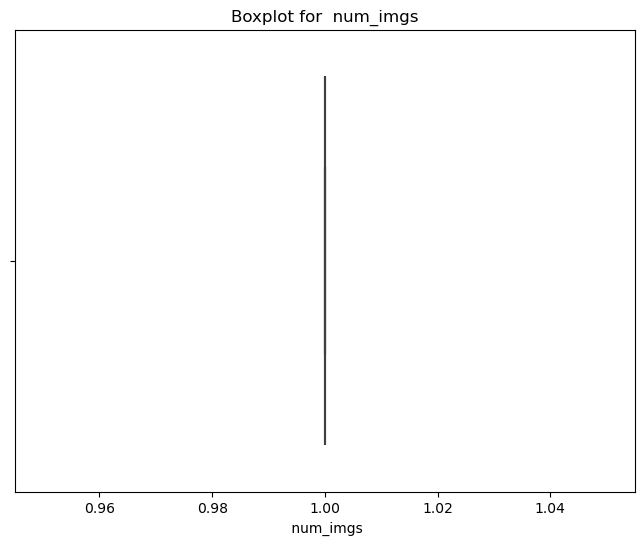

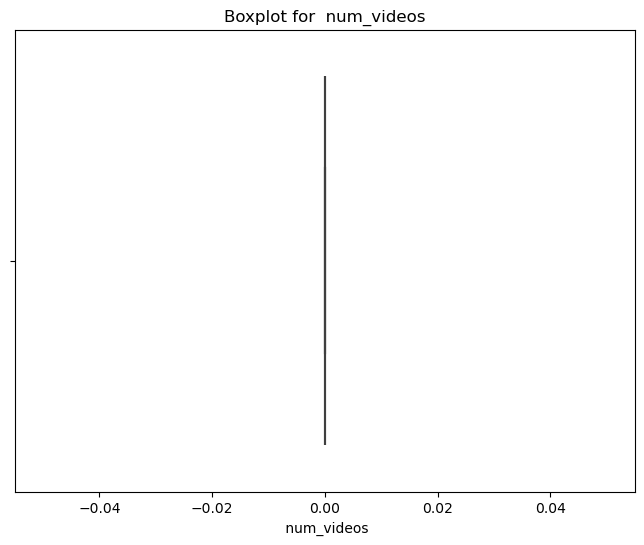

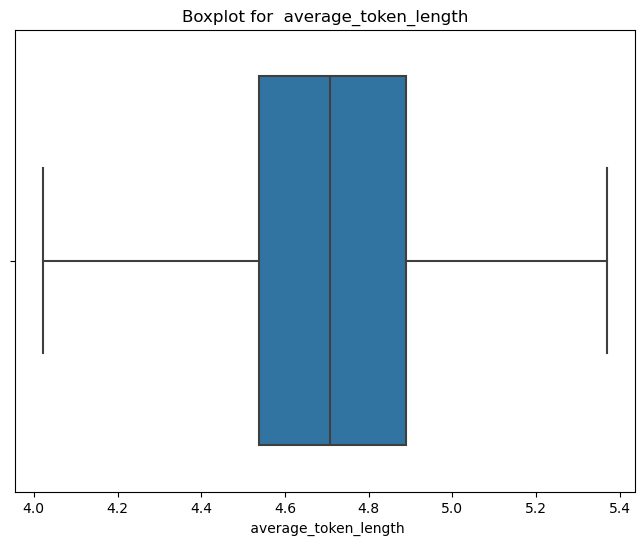

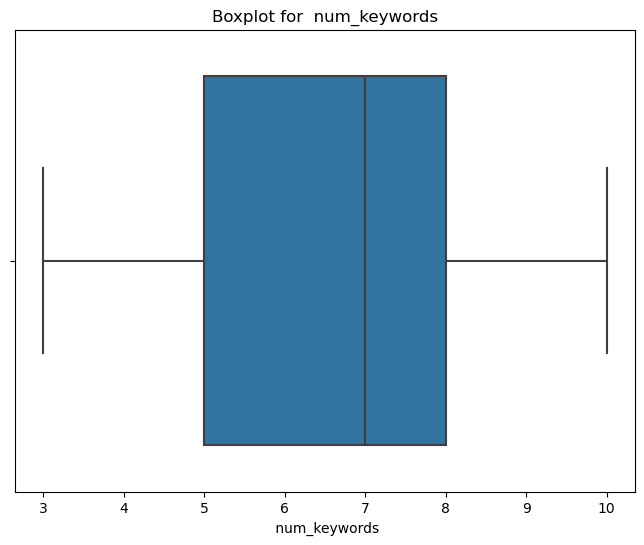

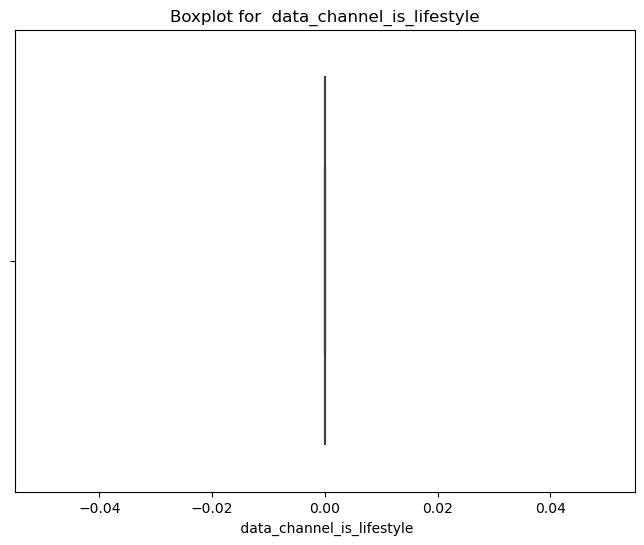

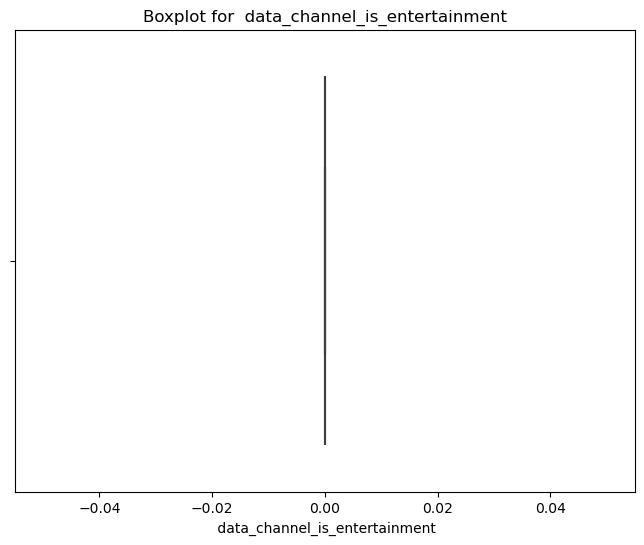

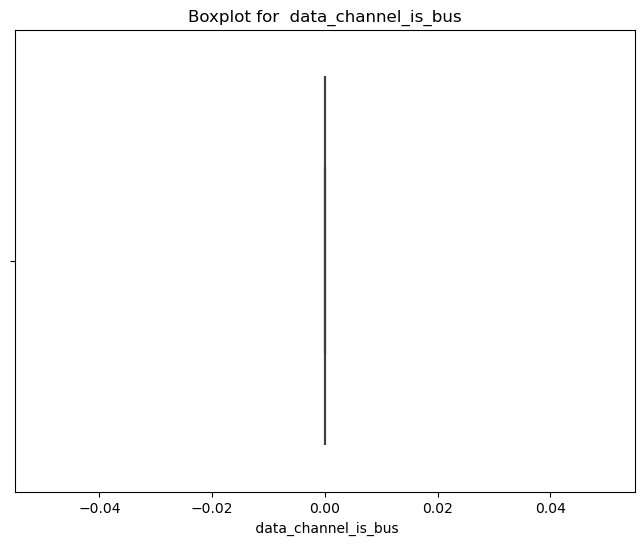

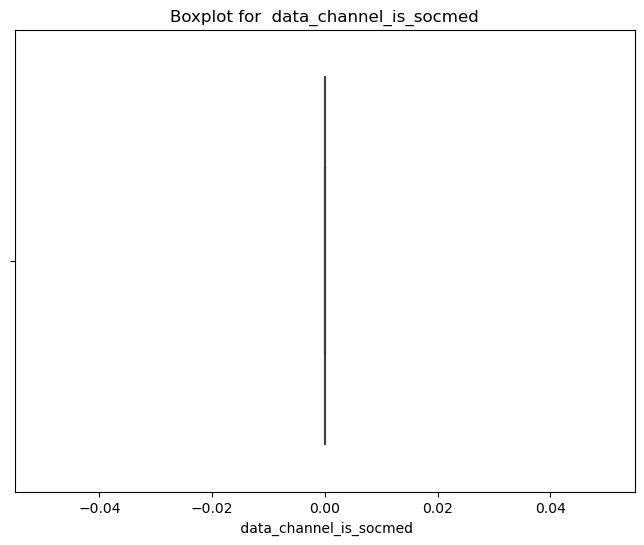

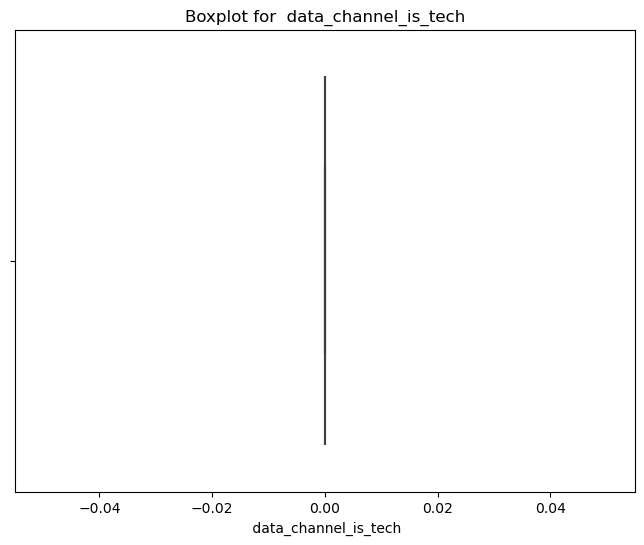

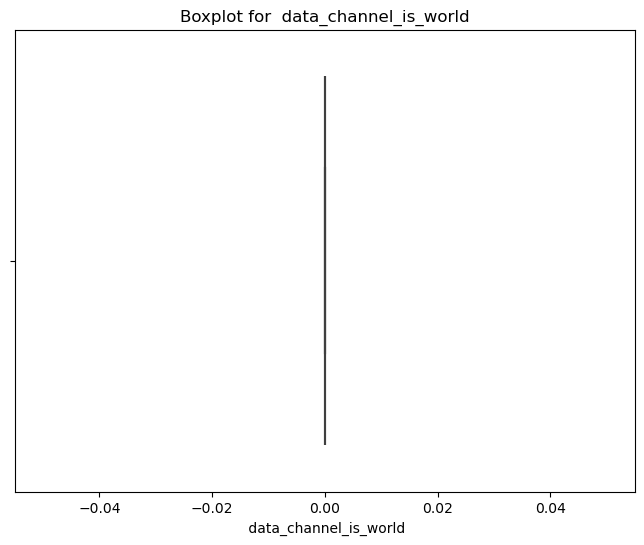

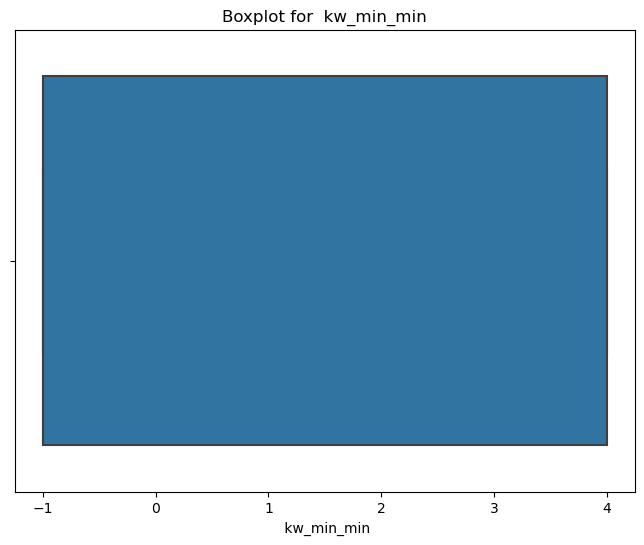

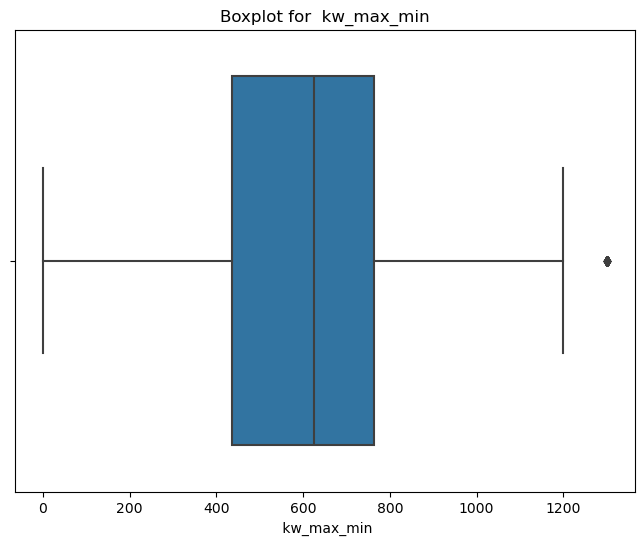

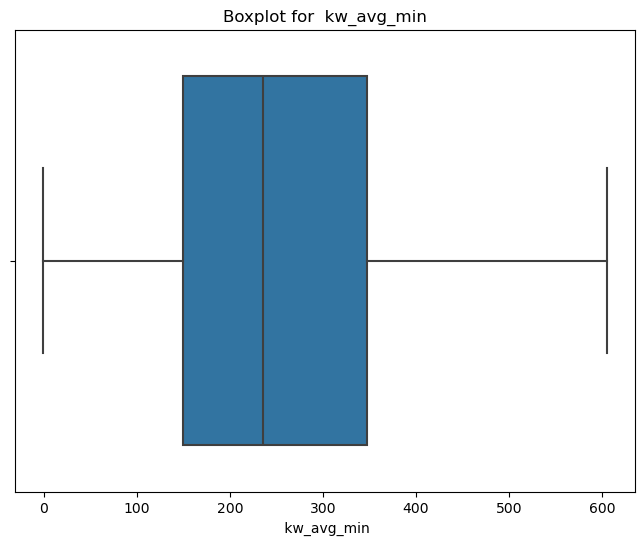

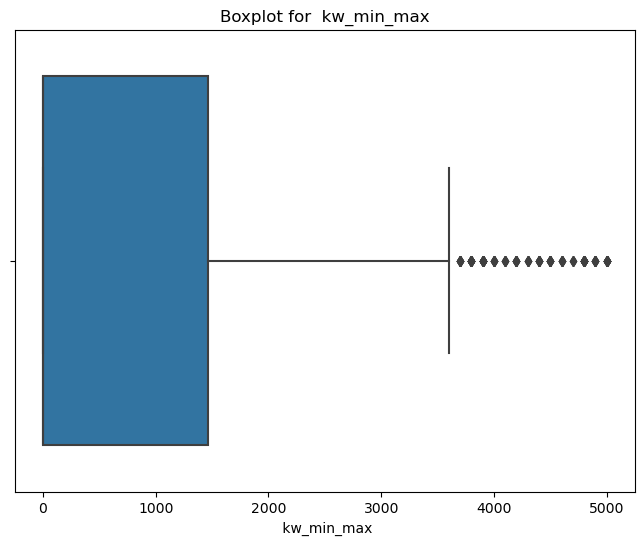

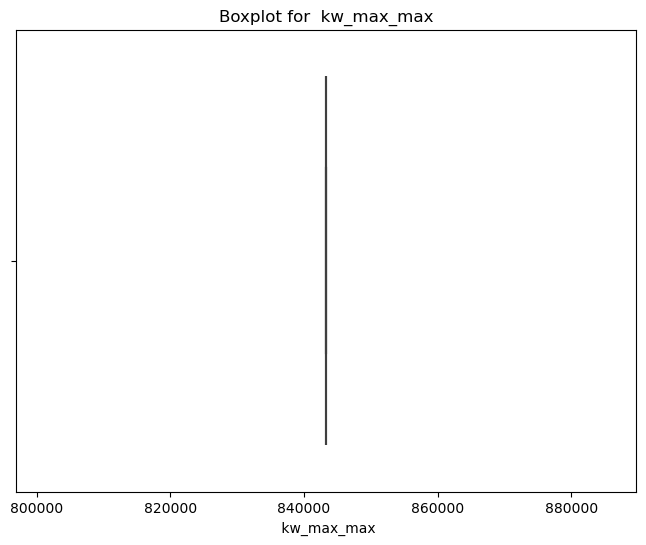

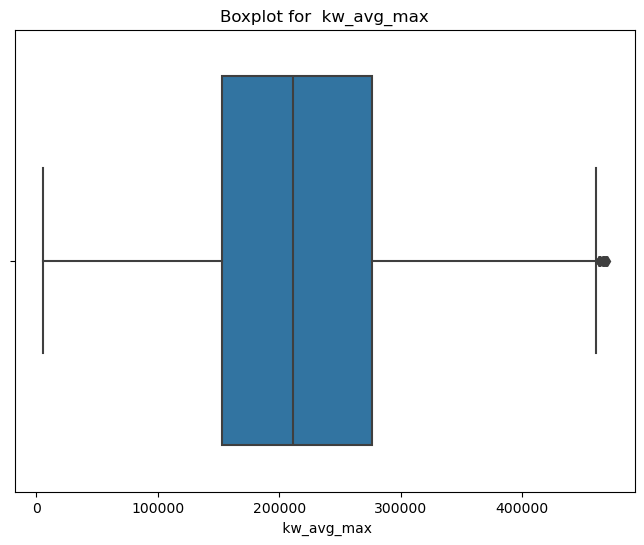

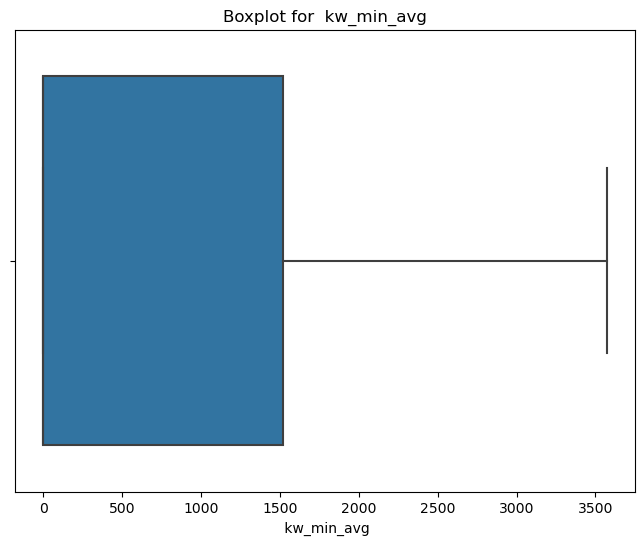

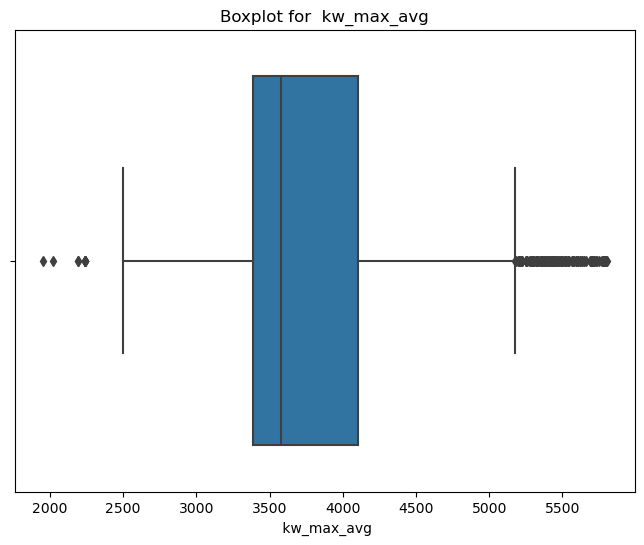

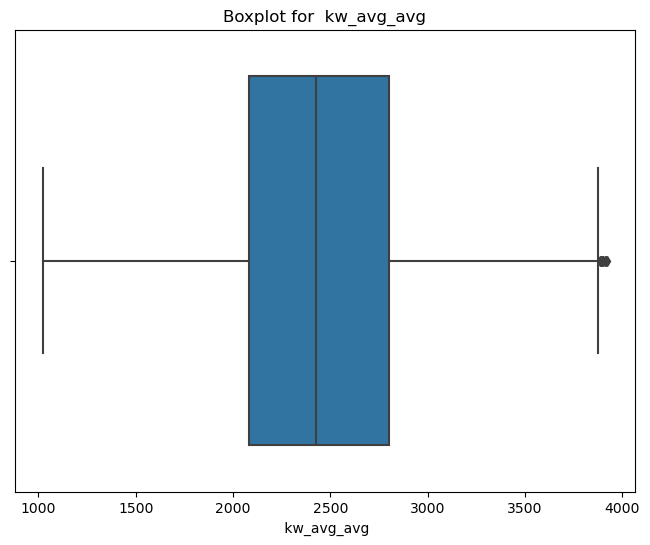

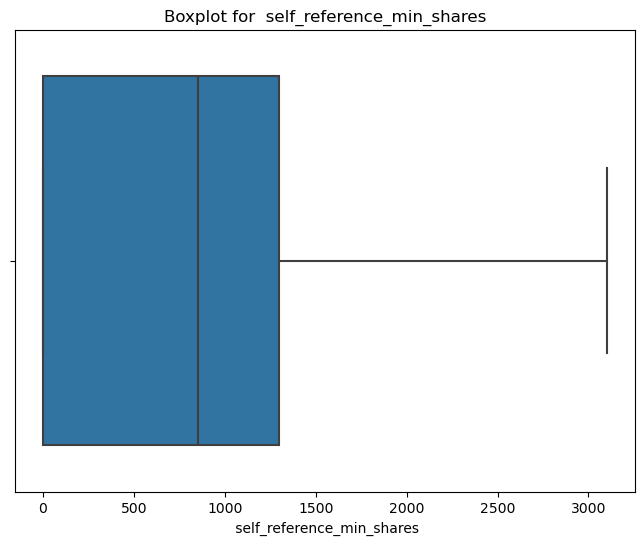

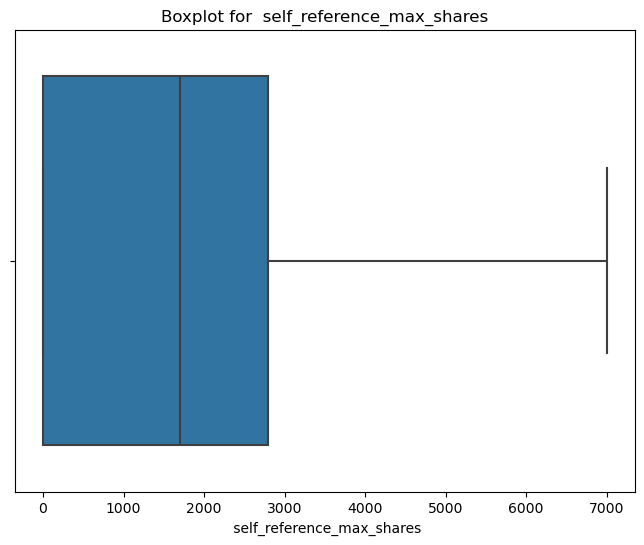

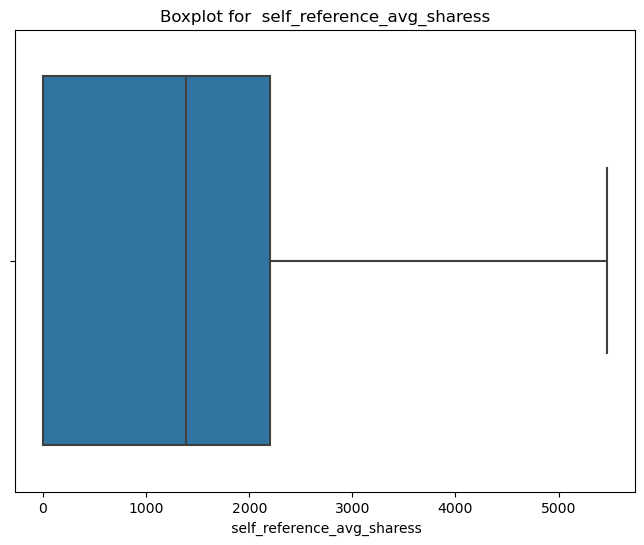

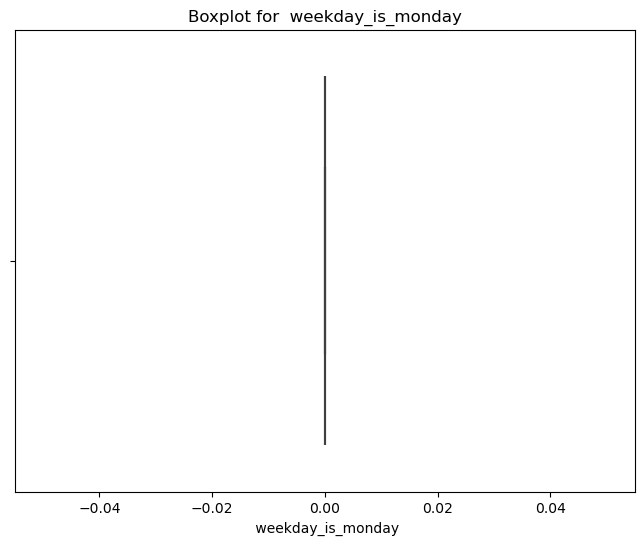

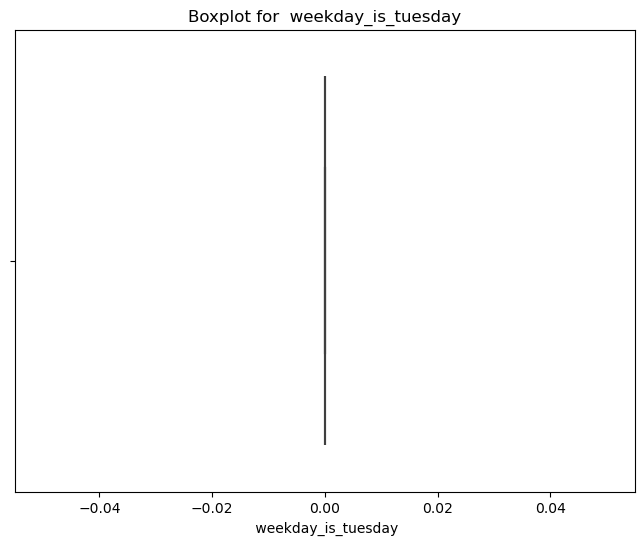

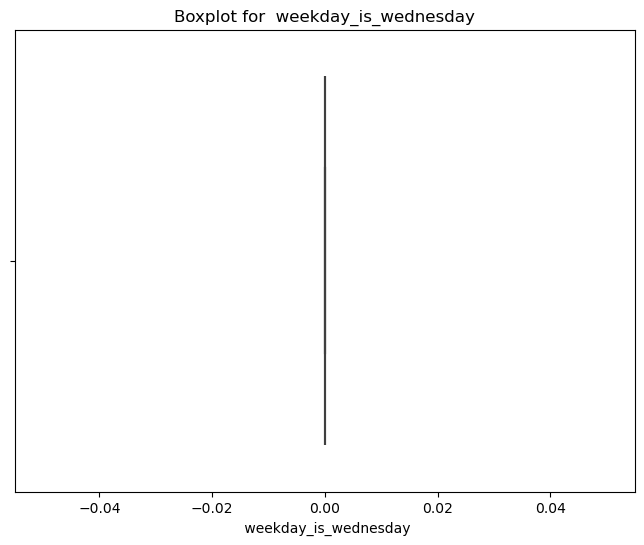

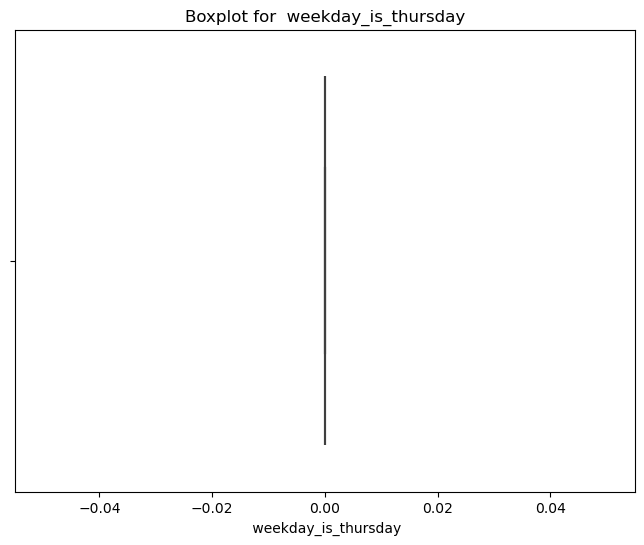

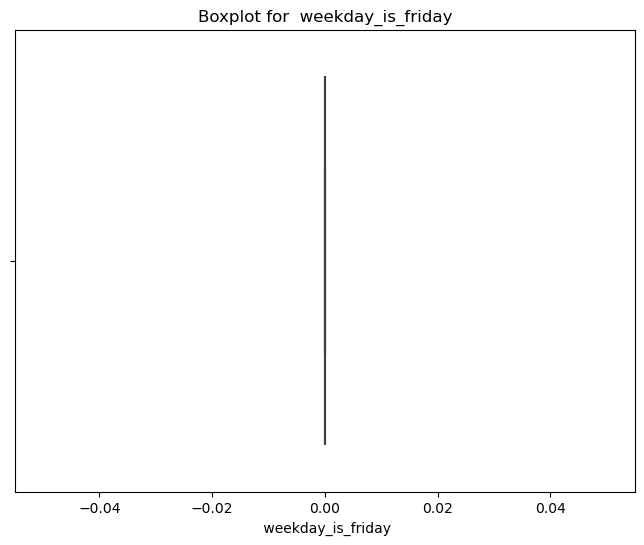

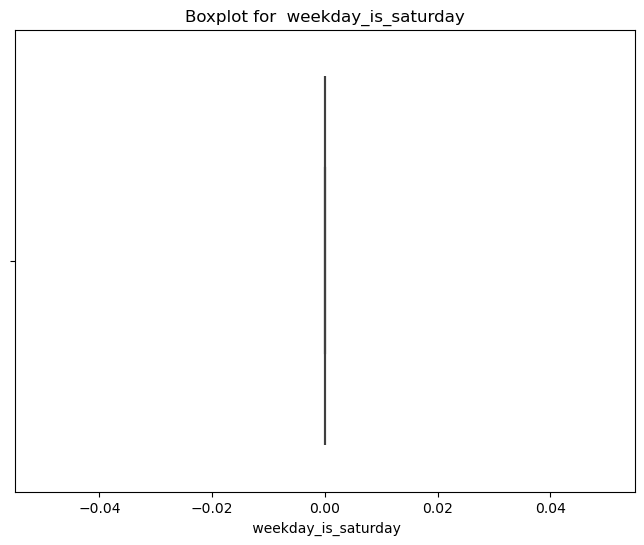

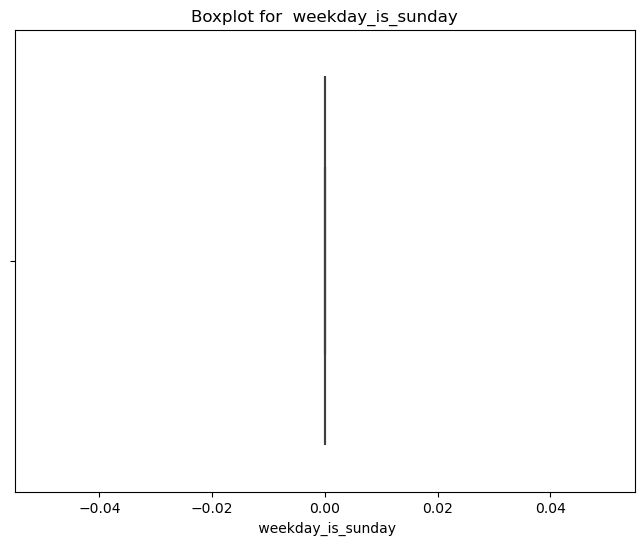

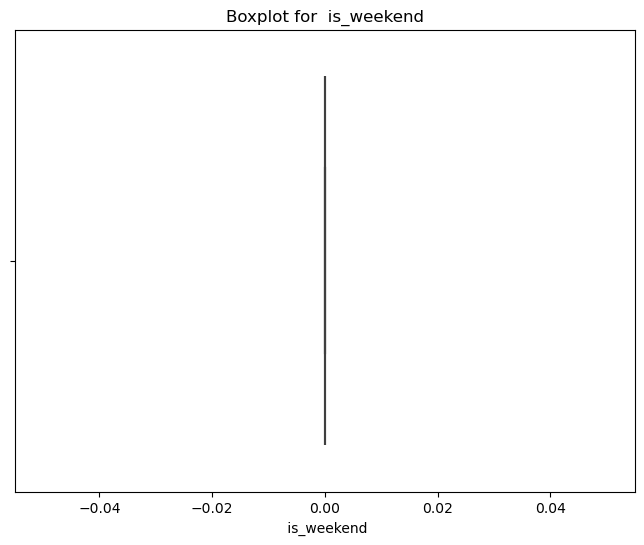

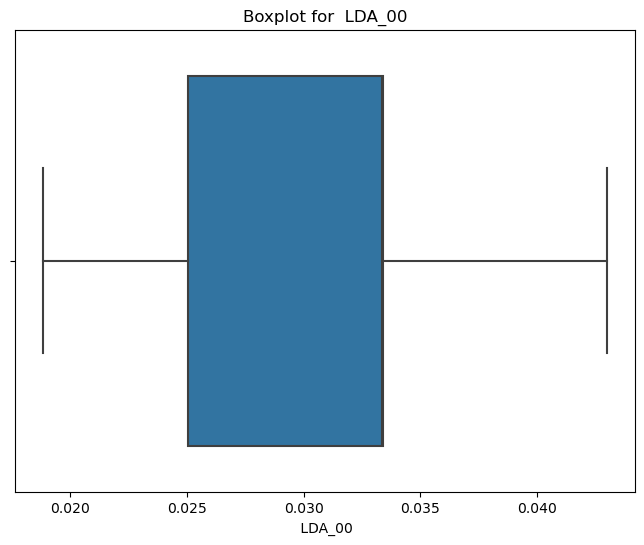

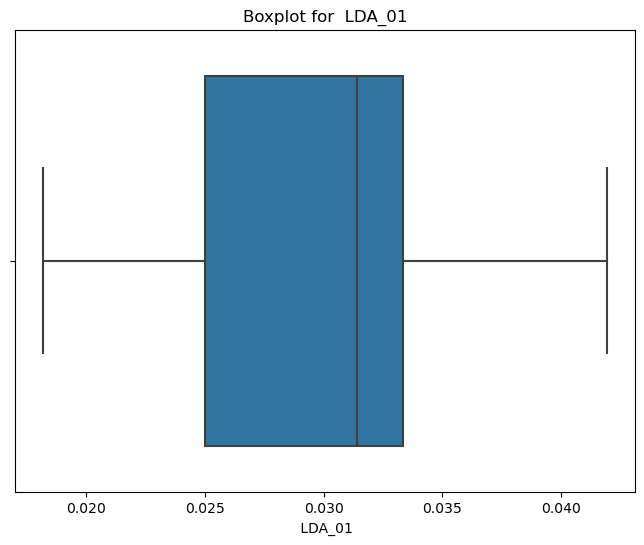

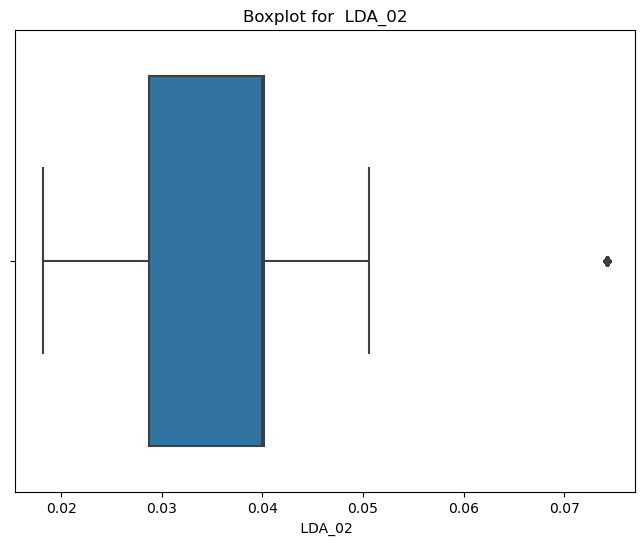

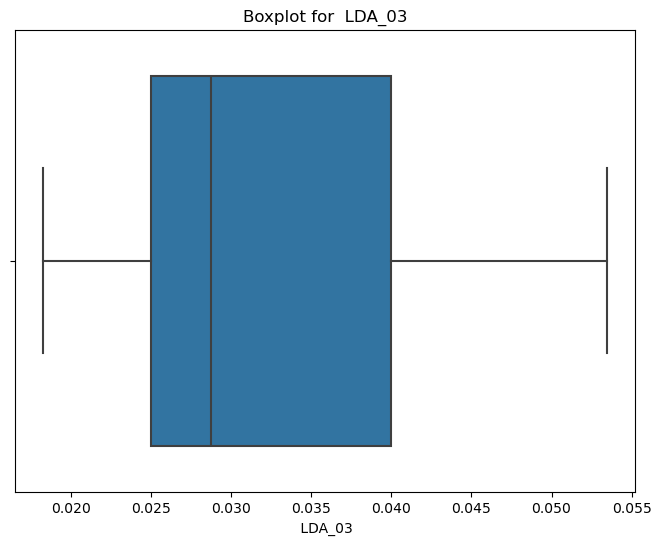

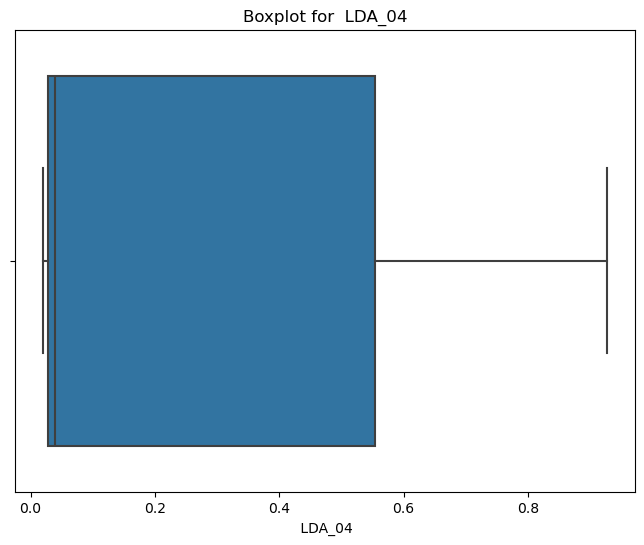

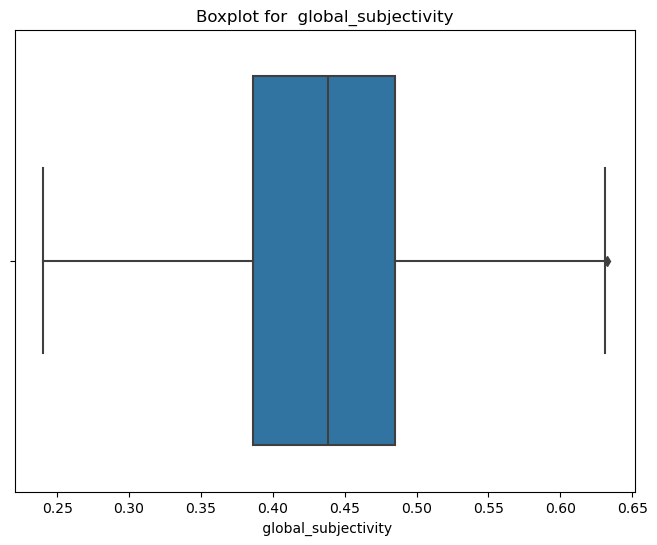

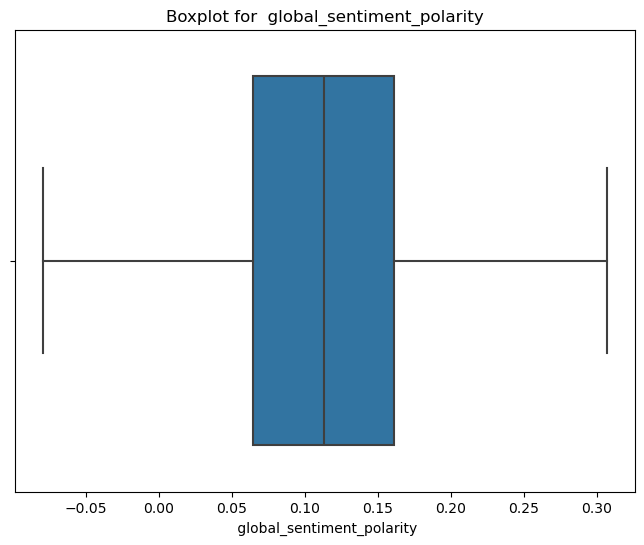

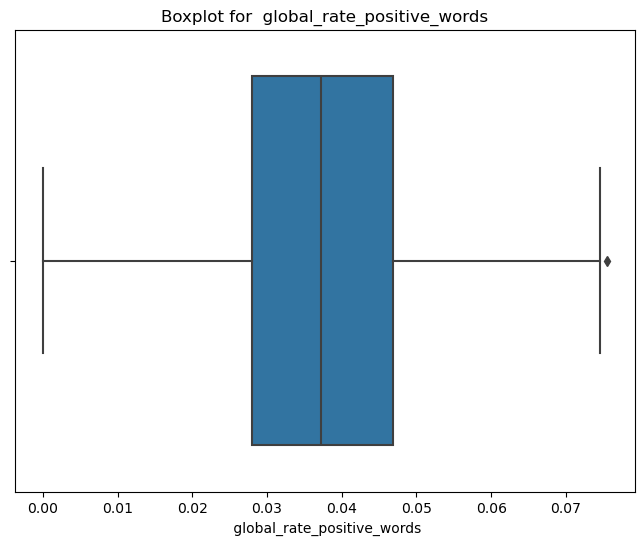

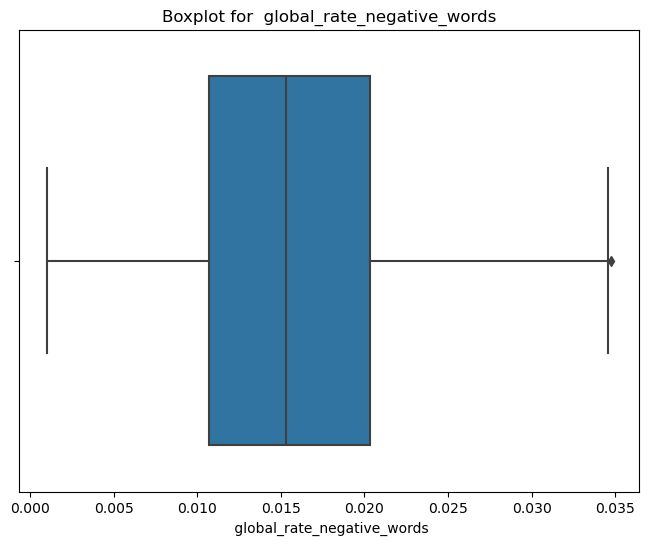

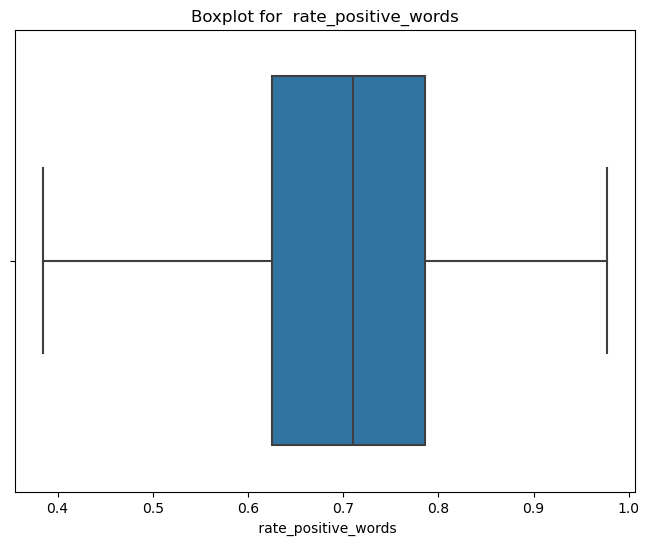

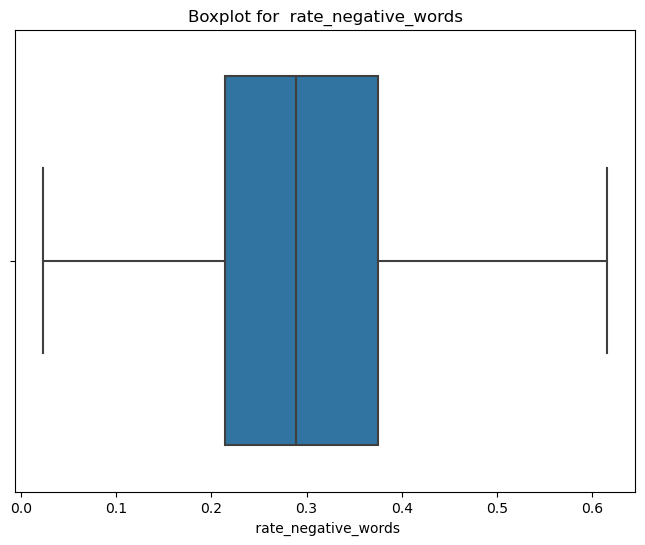

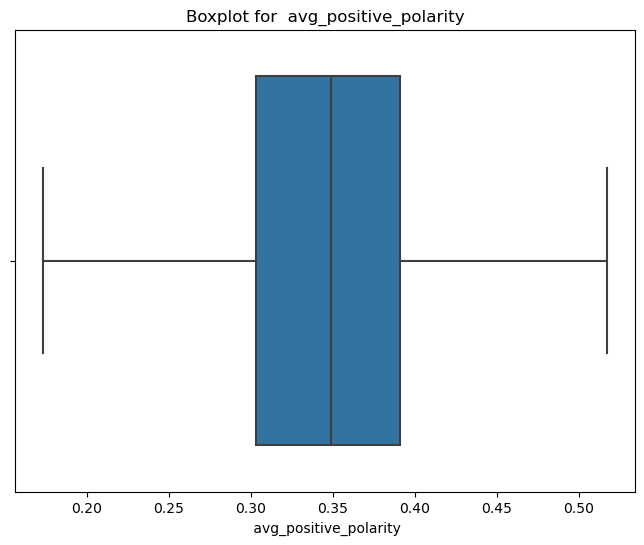

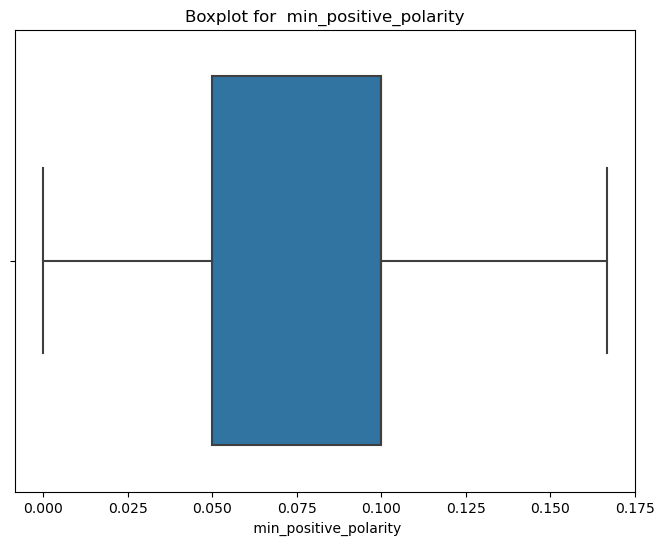

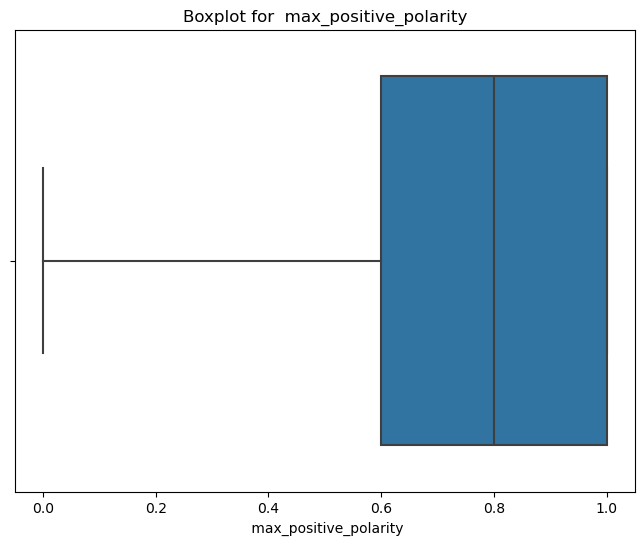

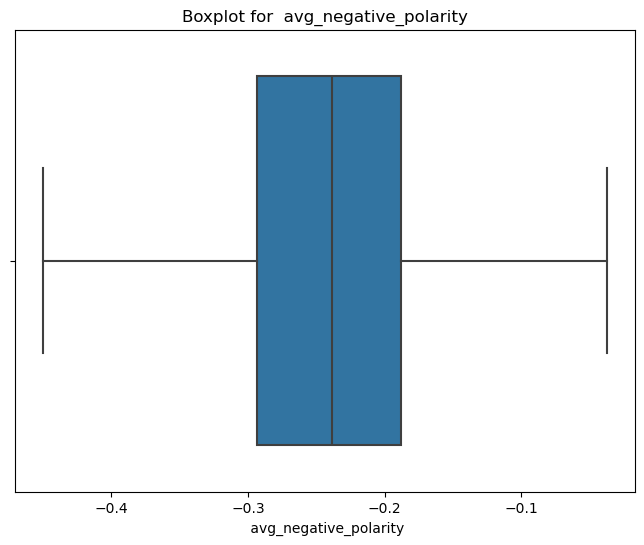

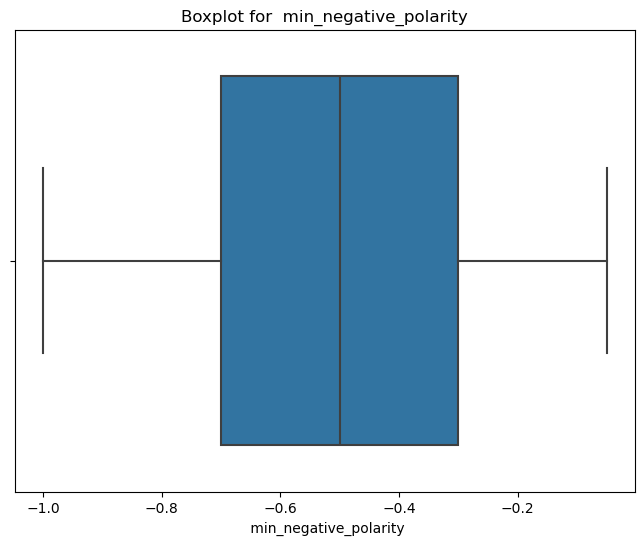

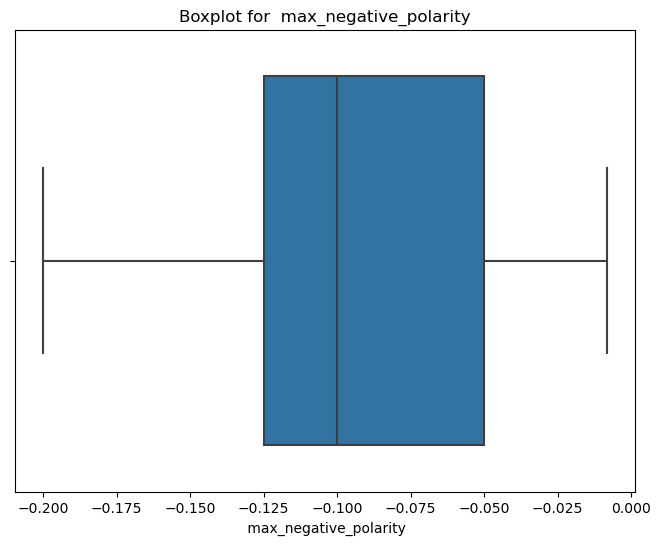

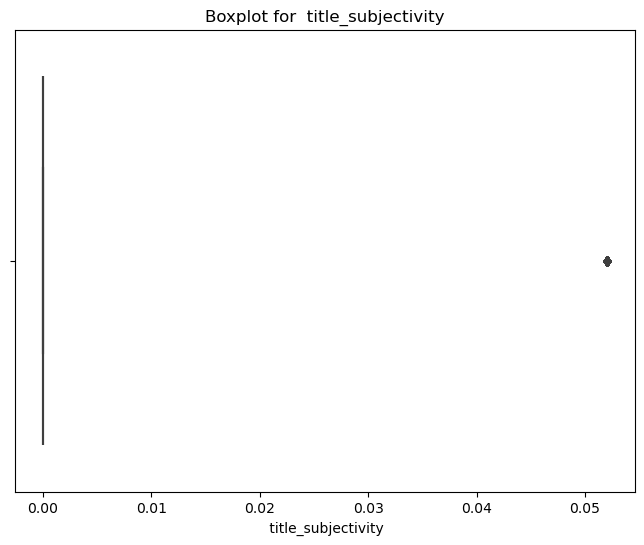

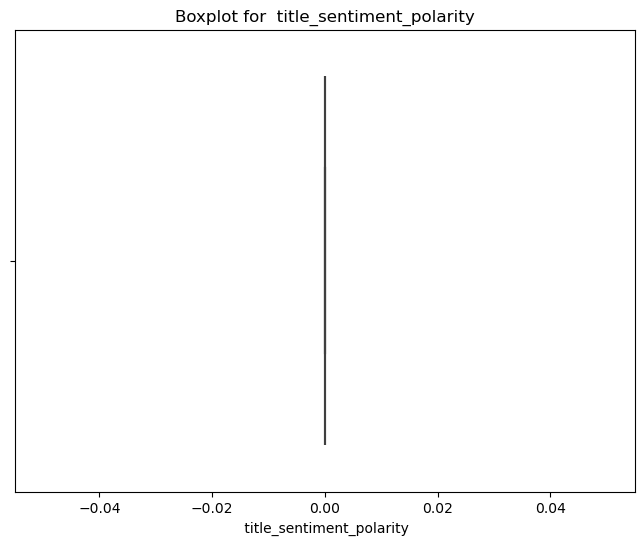

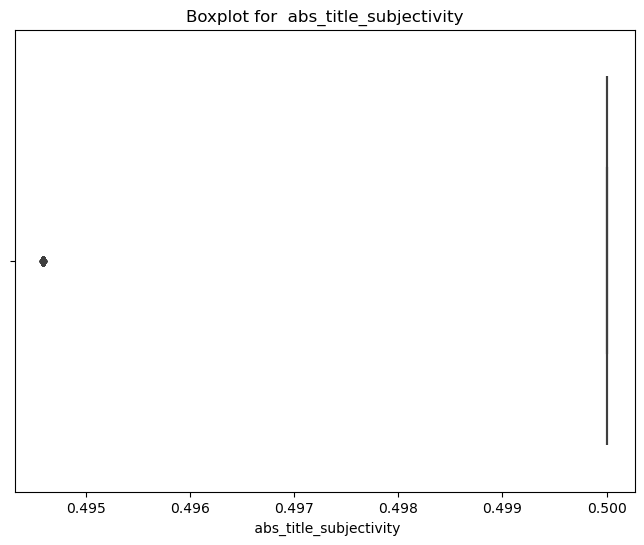

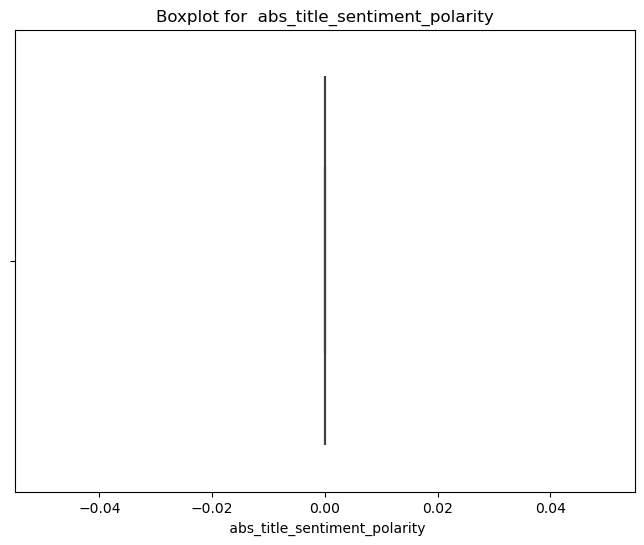

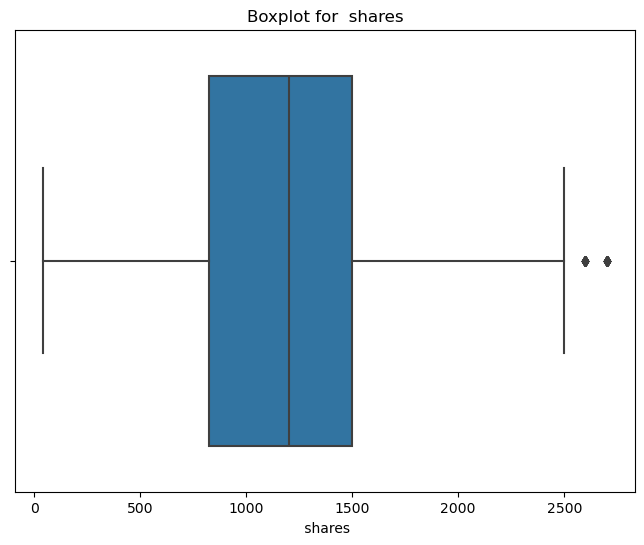

In [806]:
def draw_boxplots(df_imputed_mean):
    numerical_cols = df_imputed_mean.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df_imputed_mean[col])
        plt.title(f'Boxplot for {col}')
        plt.show()

# Example usage:
draw_boxplots(df_imputed_mean)

In [816]:
numerical_cols = df_imputed_mean.select_dtypes(include=['int64', 'float64']).columns


# Function to detect and remove outliers using the IQR method
def remove_outliers_iqr(df_imputed_mean , columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df_imputed_mean[col].quantile(0.25)
        Q3 = df_imputed_mean[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove rows with outliers
        df_imputed = df_imputed_mean[(df_imputed_mean[col] >= lower_bound) & (df_imputed_mean[col] <= upper_bound)]
    
    return df_imputed_mean

# Remove outliers from the dataset
df_no_outliers2 = remove_outliers_iqr(df_imputed_mean, numerical_cols)

# View the dataset after removing outliers
print("Data after removing outliers:\n", df_no_outliers2)

Data after removing outliers:
                                                      url   timedelta  \
82     http://mashable.com/2013/01/08/nfl-arian-foste...       730.0   
149        http://mashable.com/2013/01/09/mint-the-coin/       729.0   
194    http://mashable.com/2013/01/10/cheaper-iphone-...       728.0   
203    http://mashable.com/2013/01/10/earth-like-plan...       728.0   
205          http://mashable.com/2013/01/10/faster-wifi/       728.0   
...                                                  ...         ...   
39609  http://mashable.com/2014/12/26/roberto-orci-st...         9.0   
39628  http://mashable.com/2014/12/27/facebook-year-i...         9.0   
39631  http://mashable.com/2014/12/27/japan-elderly-d...         9.0   
39633  http://mashable.com/2014/12/27/lbj-adviser-sla...         9.0   
39642     http://mashable.com/2014/12/27/ukraine-blasts/         8.0   

        n_tokens_title   n_tokens_content   n_unique_tokens  \
82                11.0              281.0

In [818]:
numerical_cols = df_no_outliers2.select_dtypes(include=['int64', 'float64']).columns

# Function to detect outliers using the IQR method
def detect_outliers_iqr(df_no_outliers2, columns):
    outlier_info = {}
    
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df_no_outliers2[col].quantile(0.25)
        Q3 = df_no_outliers2[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Detect outliers
        outliers = df_no_outliers2[(df_no_outliers2[col] < lower_bound) | (df_no_outliers2[col] > upper_bound)]
        
        # Store outlier information
        outlier_info[col] = {
            "Number of outliers": len(outliers),
            "Lower bound": lower_bound,
            "Upper bound": upper_bound,
            "Outliers": outliers[col].values
        }
        
        # Print the results
        print(f"Column: {col}")
        print(f"Number of outliers detected: {len(outliers)}")
        print(f"Outliers:\n{outliers[col].values}")
        print('-'*50)
    
    return outlier_info


# Detect outliers using the IQR method
outlier_info = detect_outliers_iqr(df_no_outliers2, numerical_cols)

Column:  timedelta
Number of outliers detected: 0
Outliers:
[]
--------------------------------------------------
Column:  n_tokens_title
Number of outliers detected: 0
Outliers:
[]
--------------------------------------------------
Column:  n_tokens_content
Number of outliers detected: 7
Outliers:
[1186. 1170. 1175. 1183. 1179. 1171. 1174.]
--------------------------------------------------
Column:  n_unique_tokens
Number of outliers detected: 2
Outliers:
[0.75308642 0.75409835]
--------------------------------------------------
Column:  n_non_stop_words
Number of outliers detected: 7
Outliers:
[0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999]
--------------------------------------------------
Column:  n_non_stop_unique_tokens
Number of outliers detected: 2
Outliers:
[0.49664429 0.49512987]
--------------------------------------------------
Column:  num_hrefs
Number of outliers detected: 74
Outliers:
[19. 19. 18. 20. 19. 19. 19. 18. 20. 19. 18. 18. 19. 18

In [822]:
df_no_outliers2.duplicated().sum()

0

### To find out the skewness

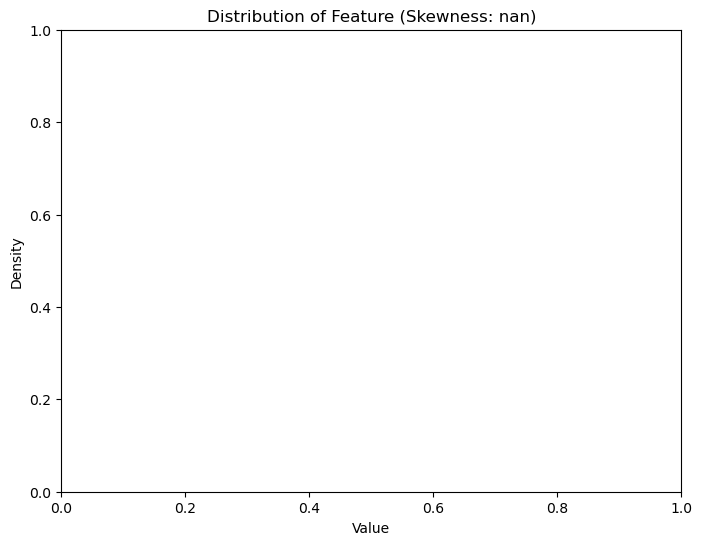

In [824]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


data = {'feature': []}
df1 = pd.DataFrame(data)

# Calculate skewness
skewness = df1['feature'].skew()

# Plot histogram and KDE (density) on the same plot
plt.figure(figsize=(8, 6))
sns.histplot(df1['feature'], kde=True, bins=10, color='skyblue', stat='density')

# Add skewness text to the plot
plt.title(f'Distribution of Feature (Skewness: {skewness:.2f})')
plt.xlabel('Value')
plt.ylabel('Density')

plt.show()

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


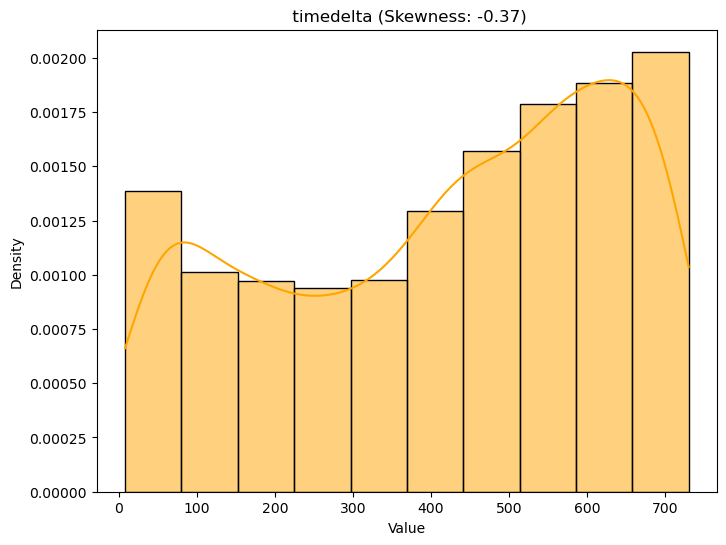

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


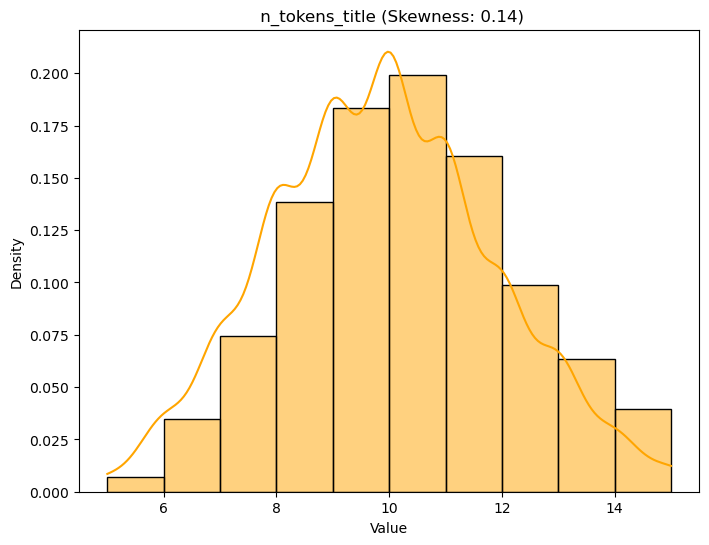

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


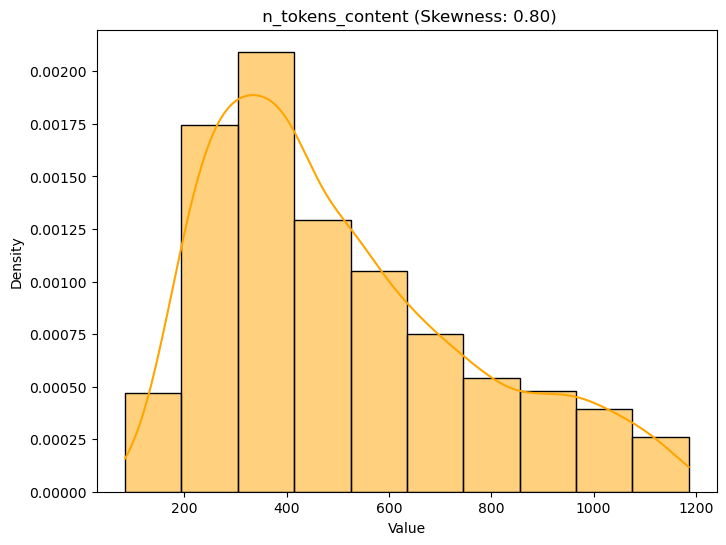

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


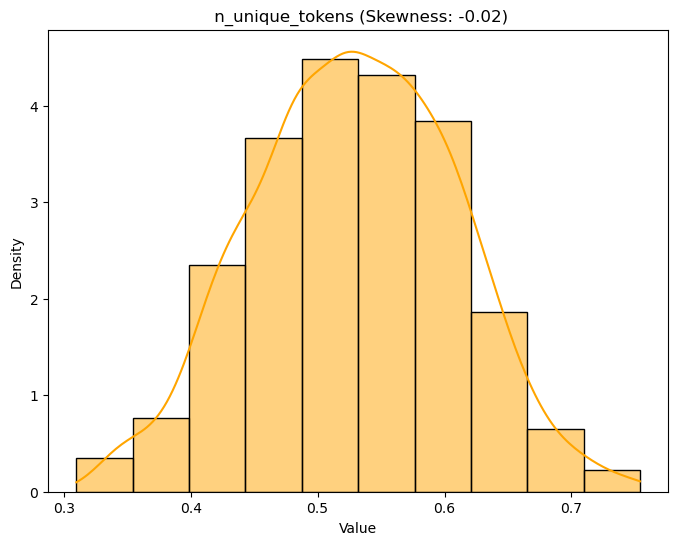

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


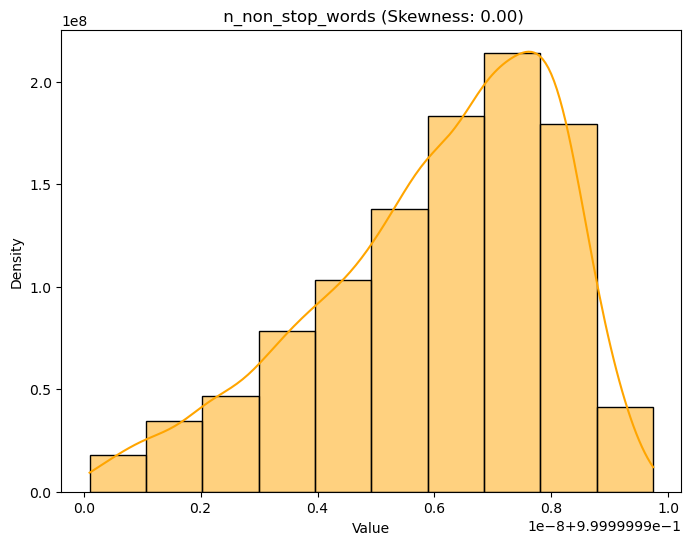

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


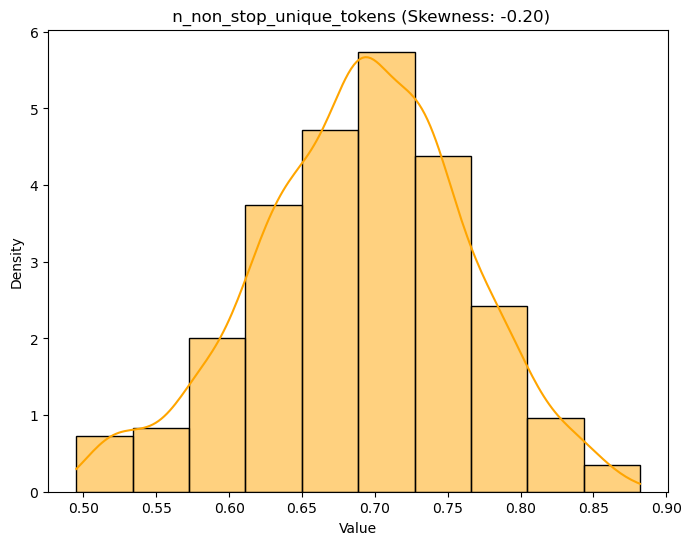

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


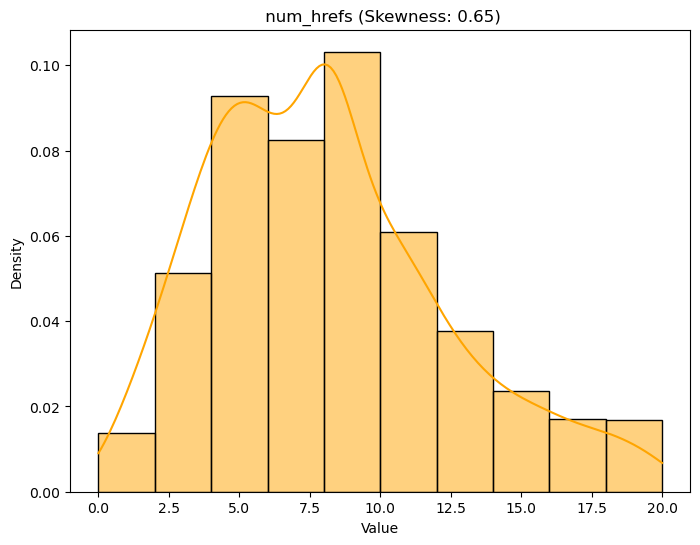

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


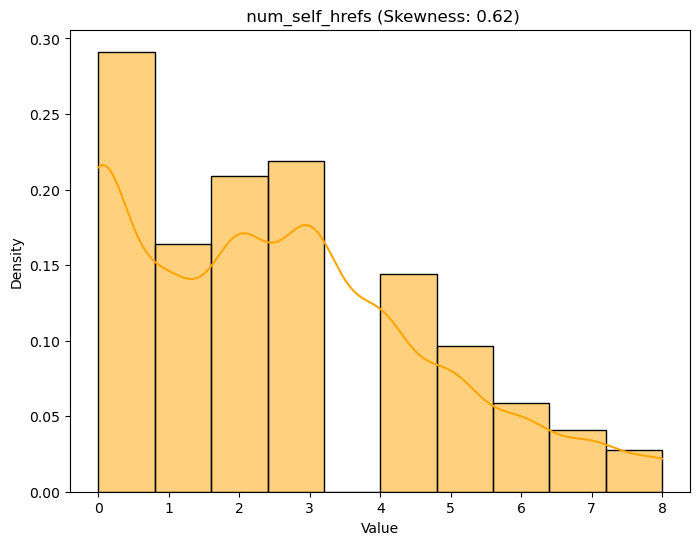

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


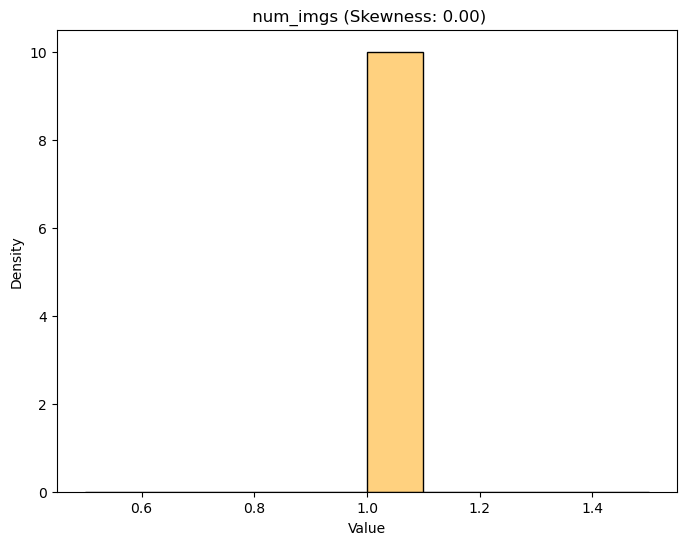

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


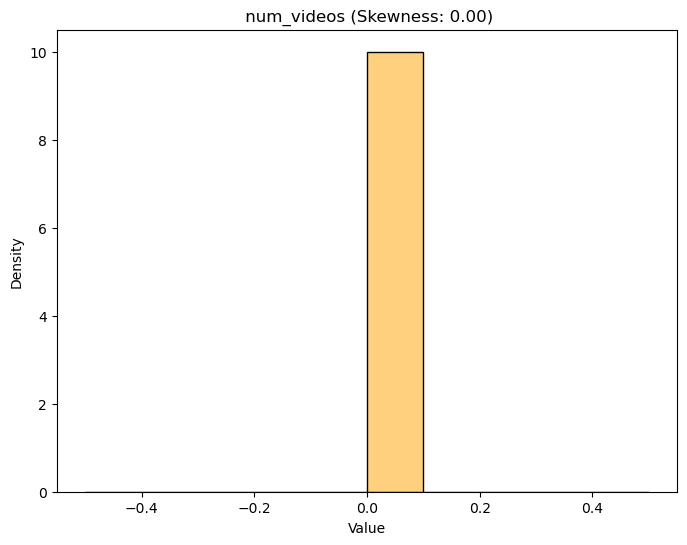

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


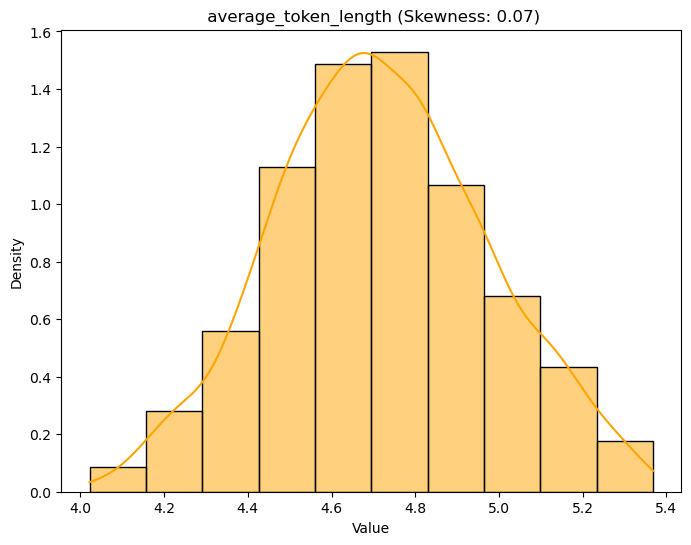

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


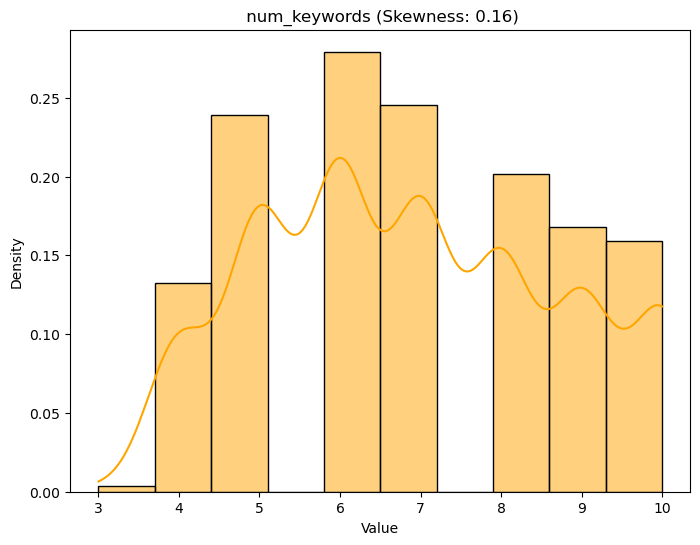

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


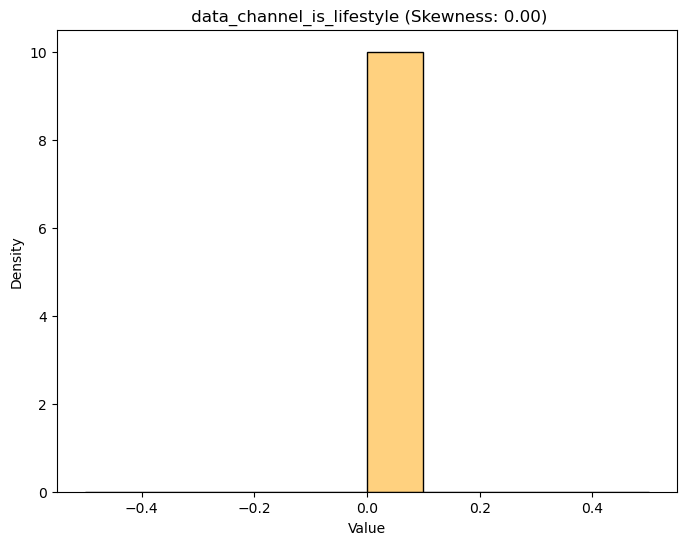

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


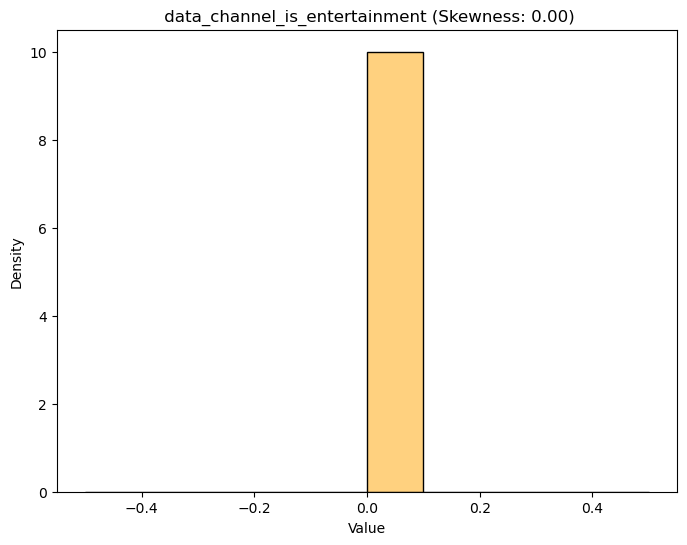

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


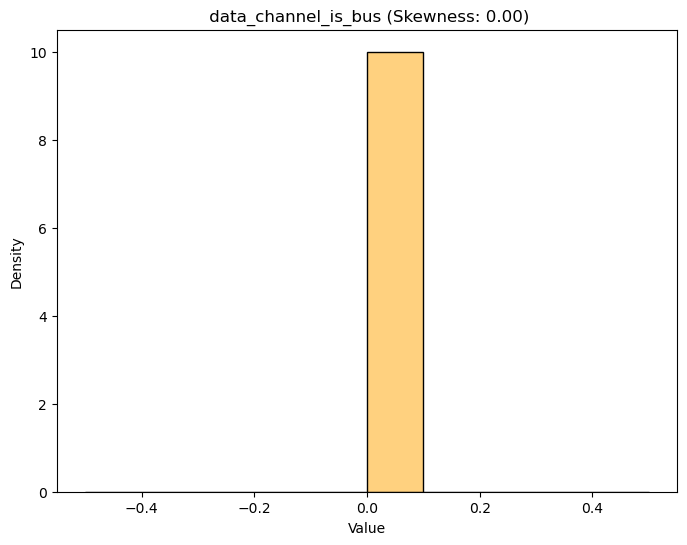

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


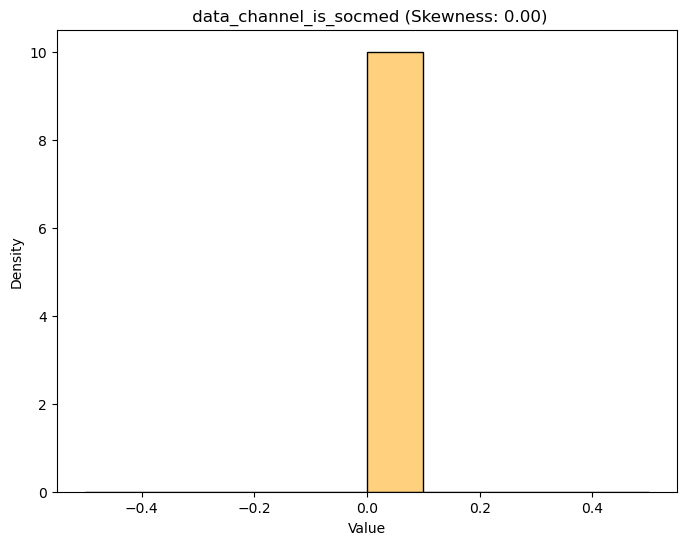

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


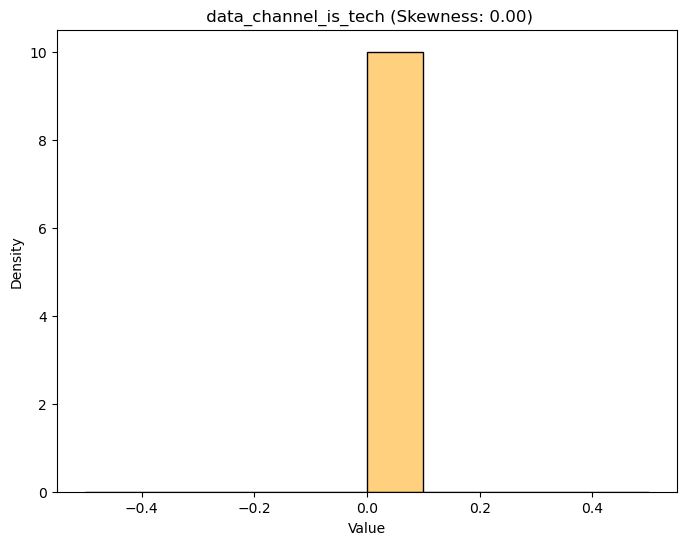

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


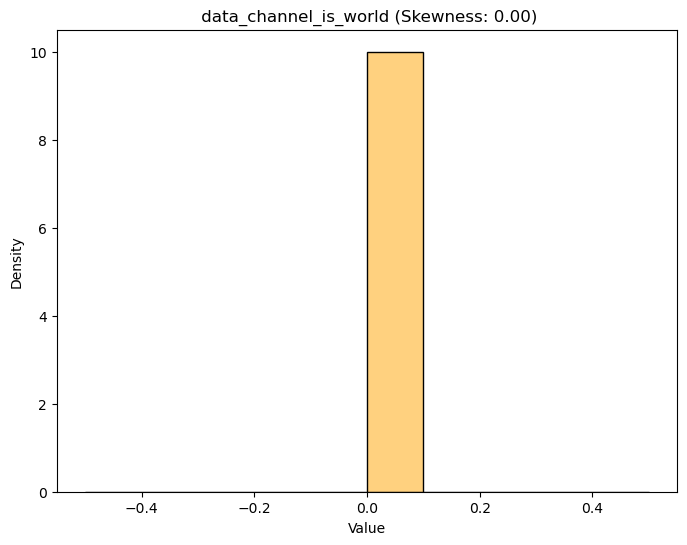

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


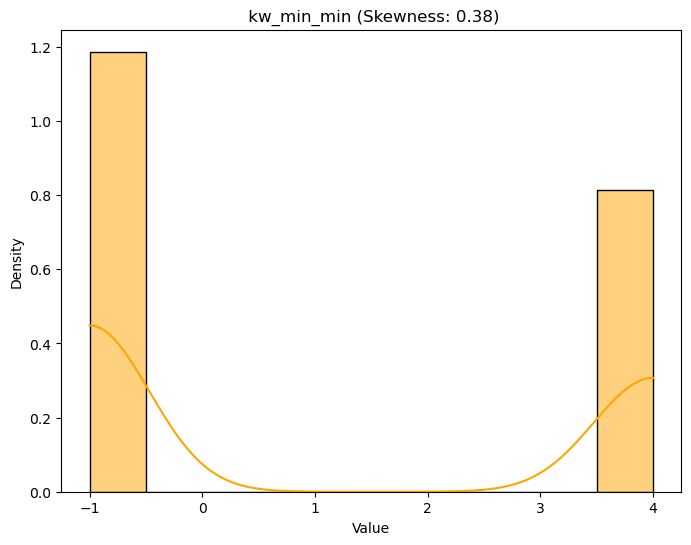

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


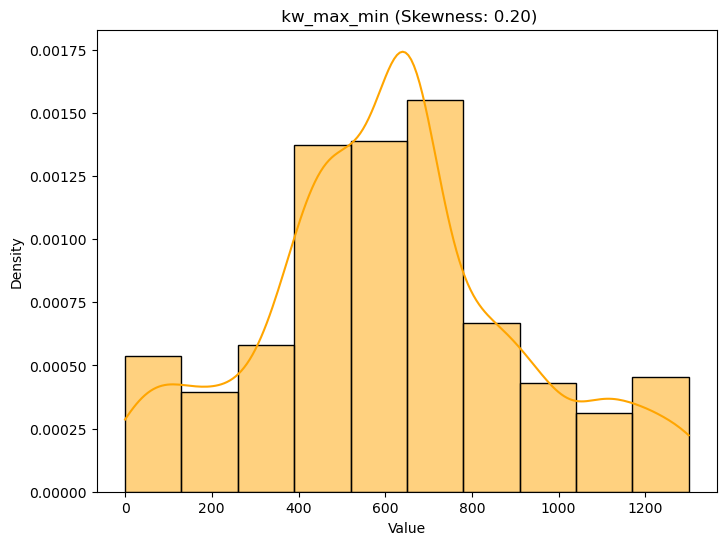

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


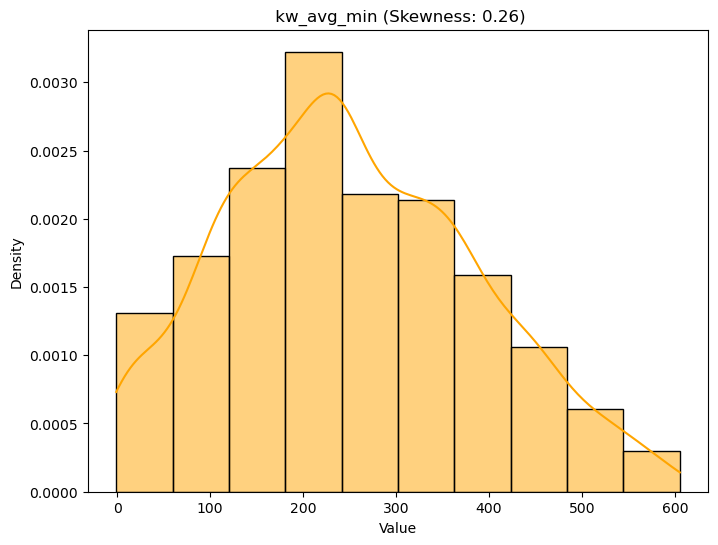

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


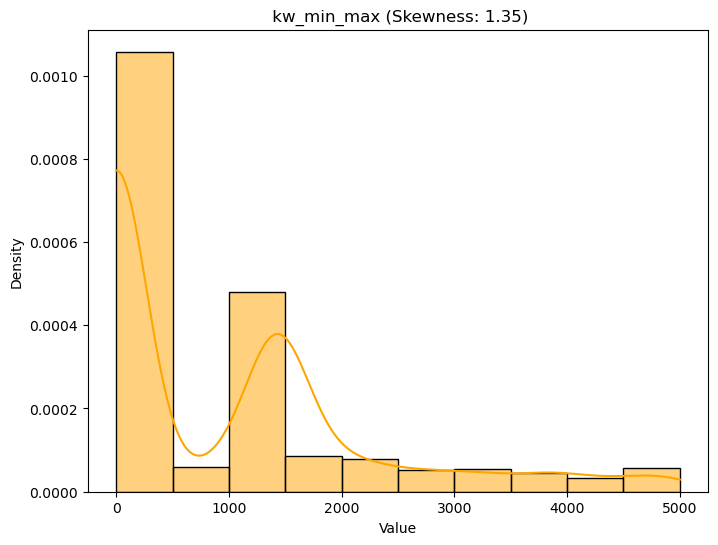

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


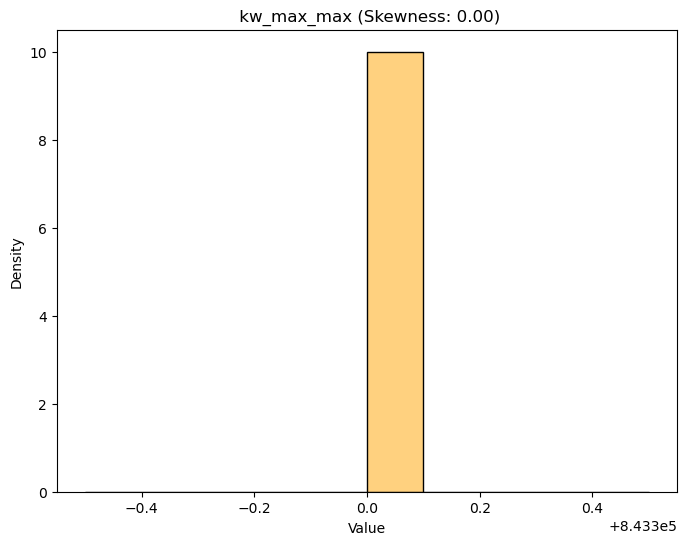

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


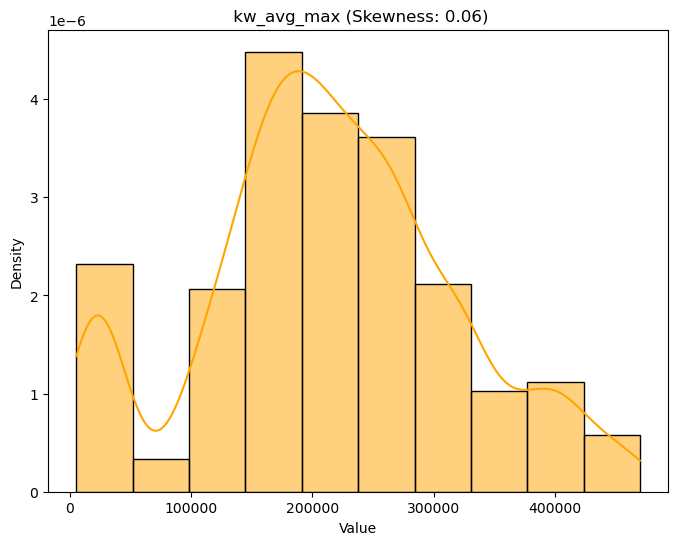

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


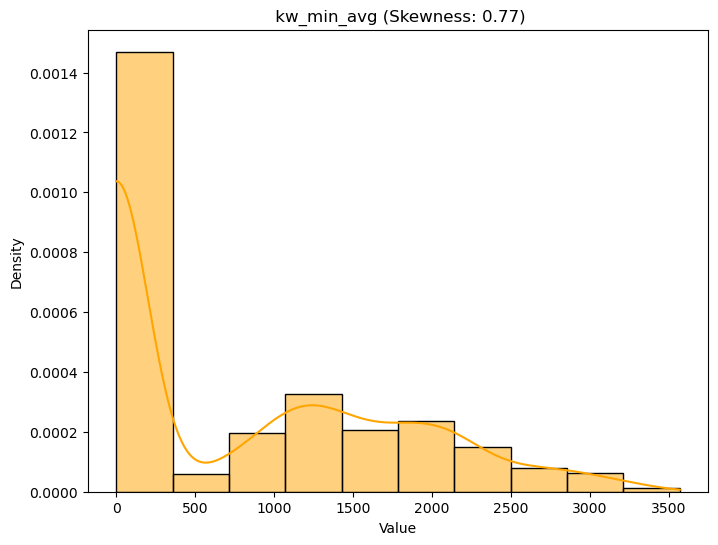

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


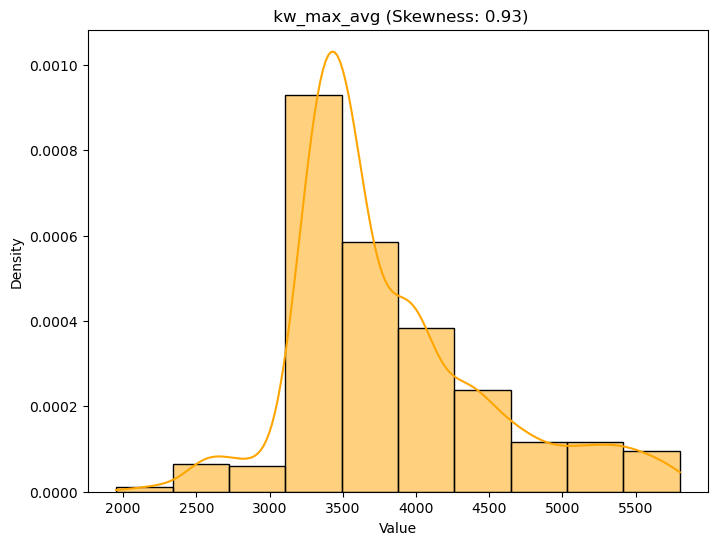

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


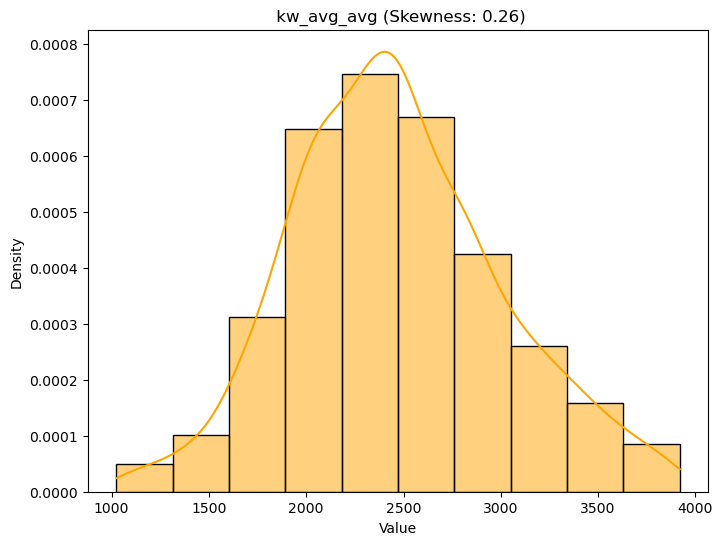

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


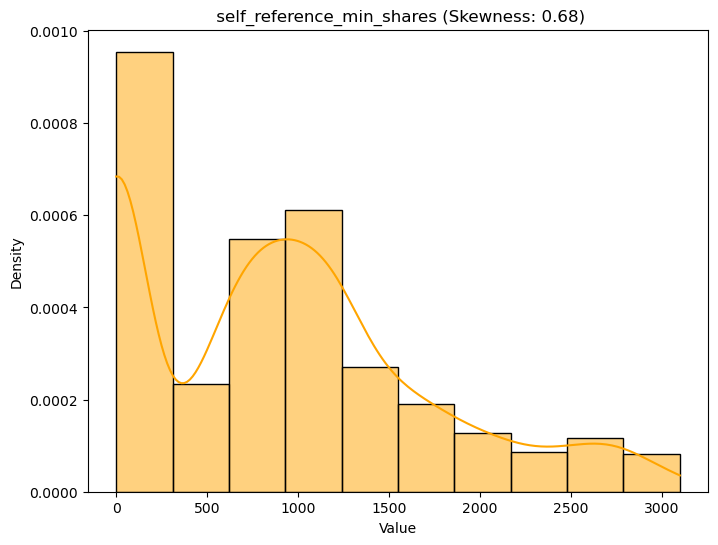

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


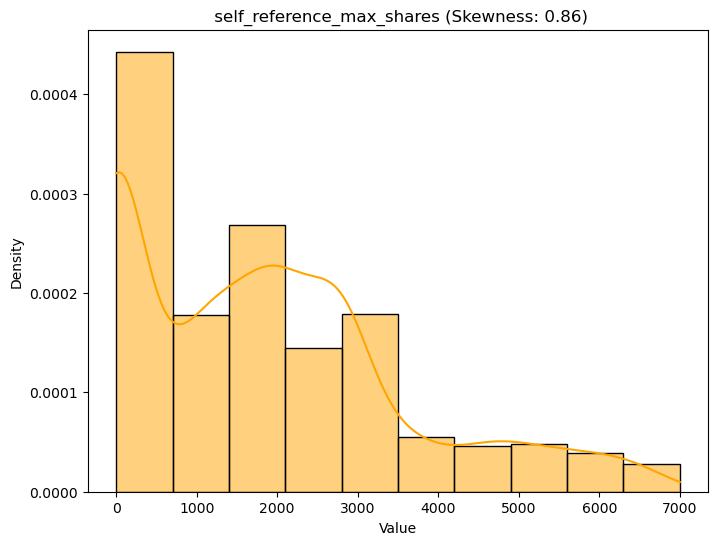

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


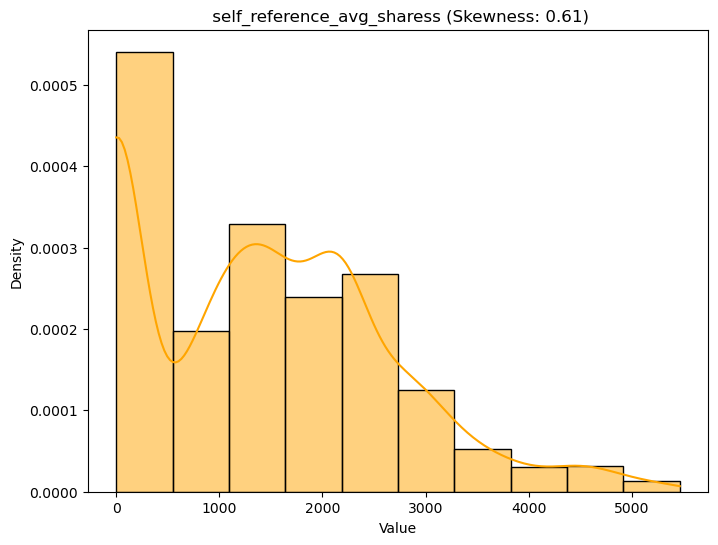

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


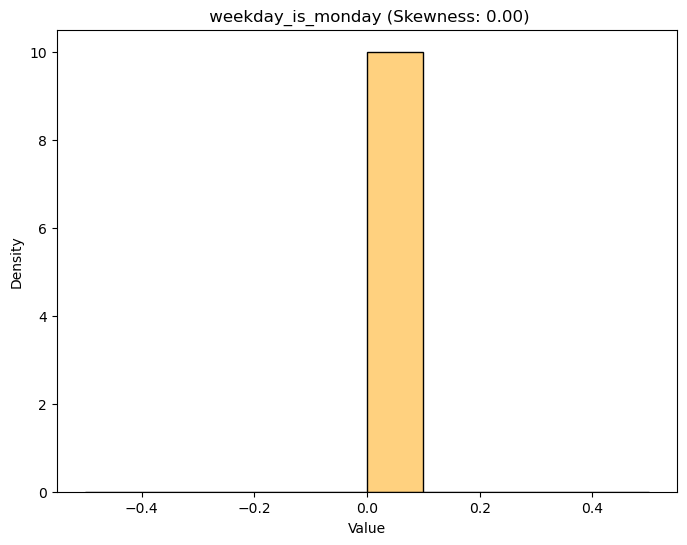

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


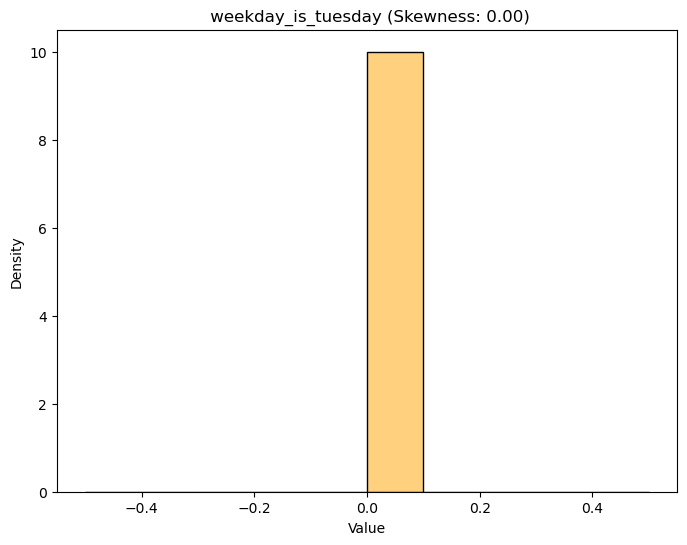

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


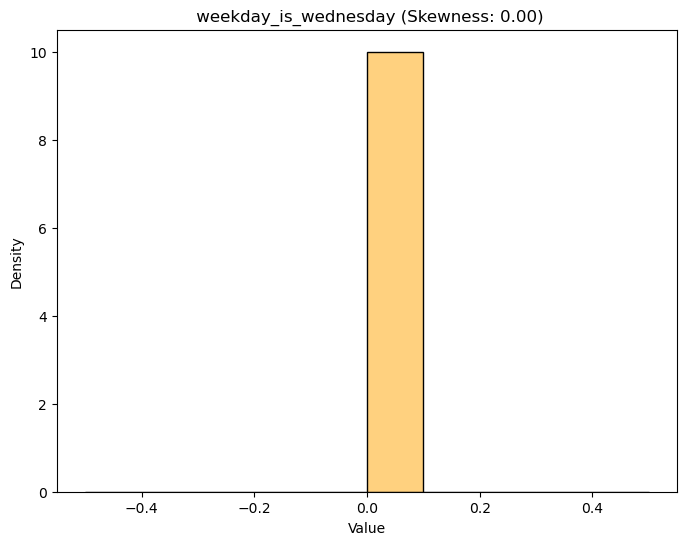

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


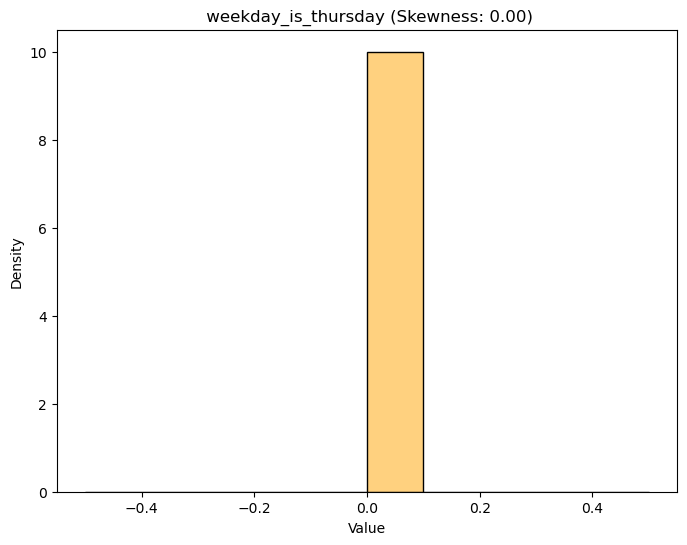

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


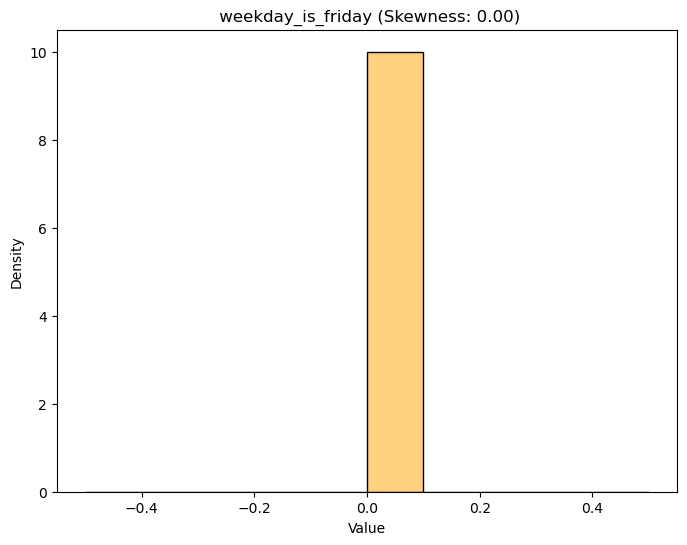

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


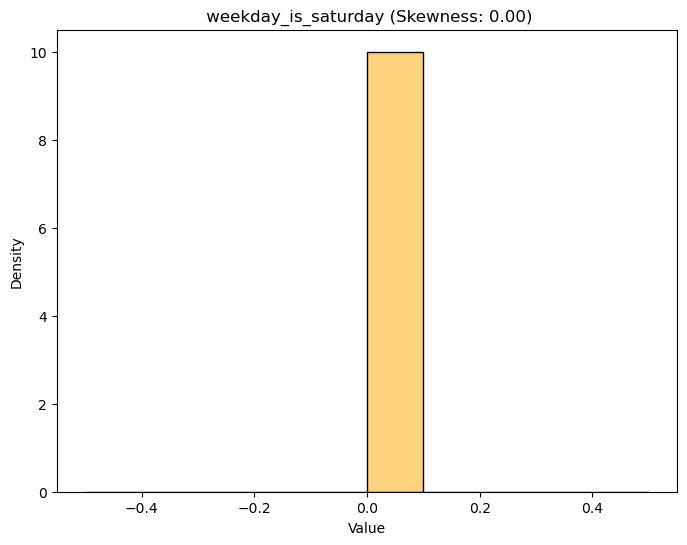

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


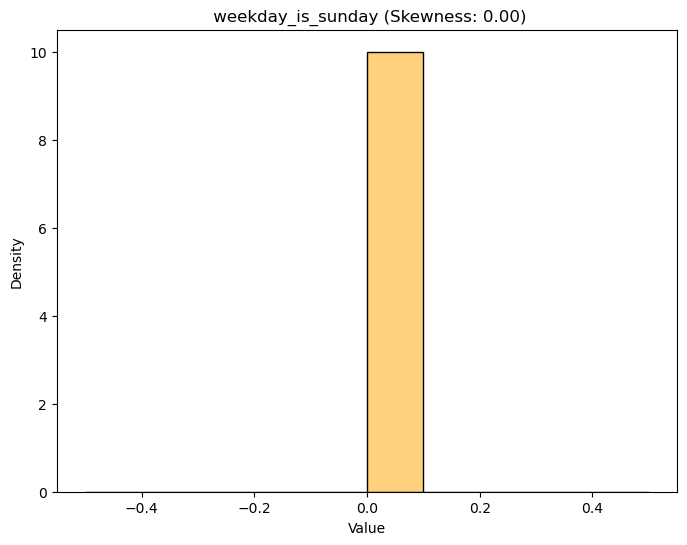

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


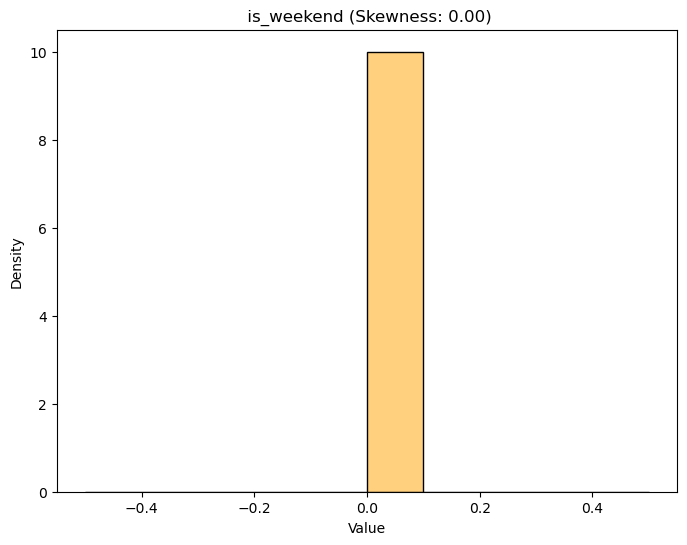

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


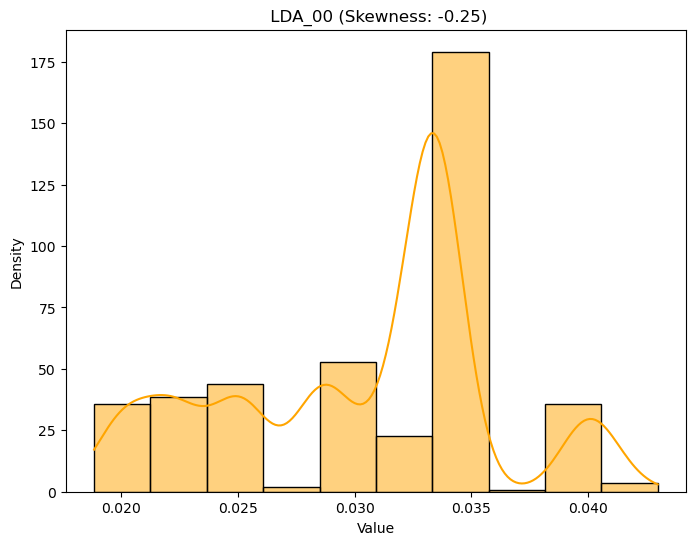

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


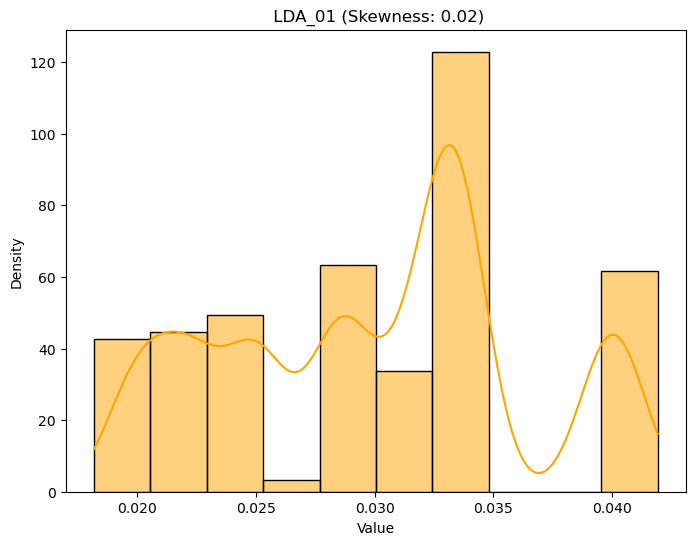

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


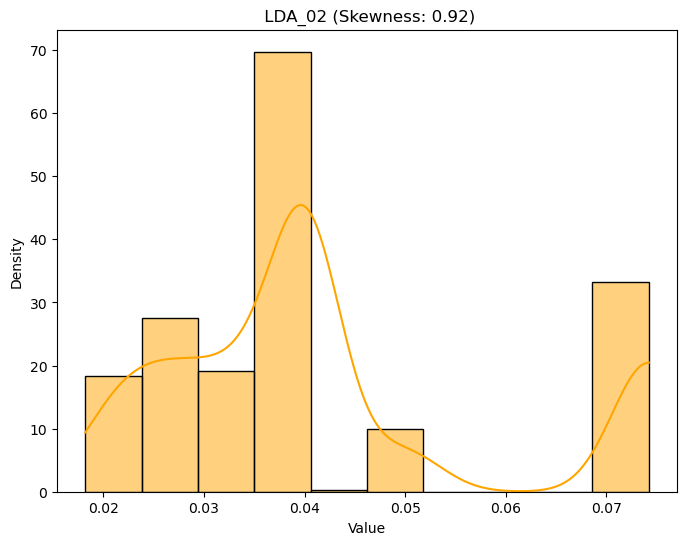

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


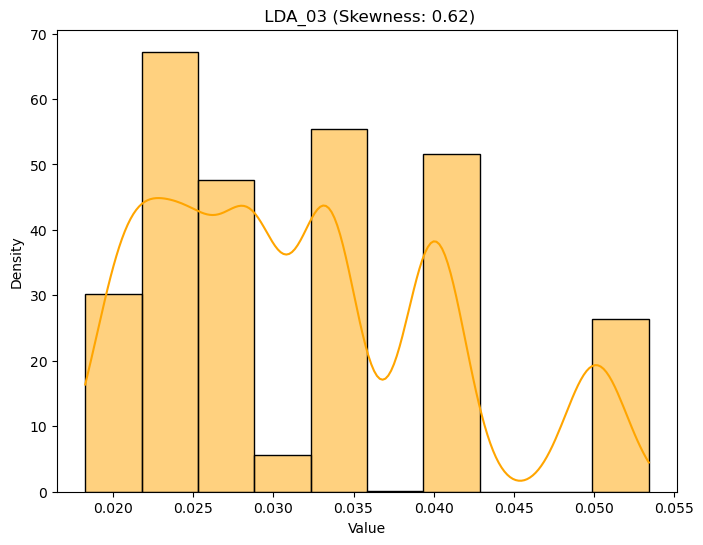

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


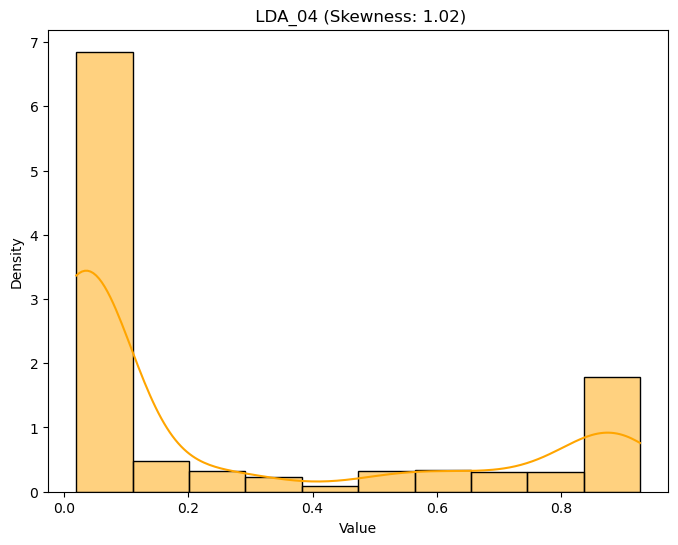

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


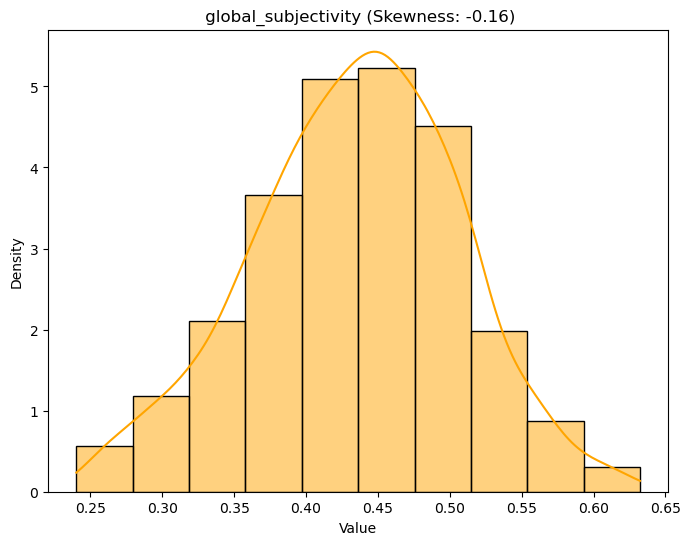

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


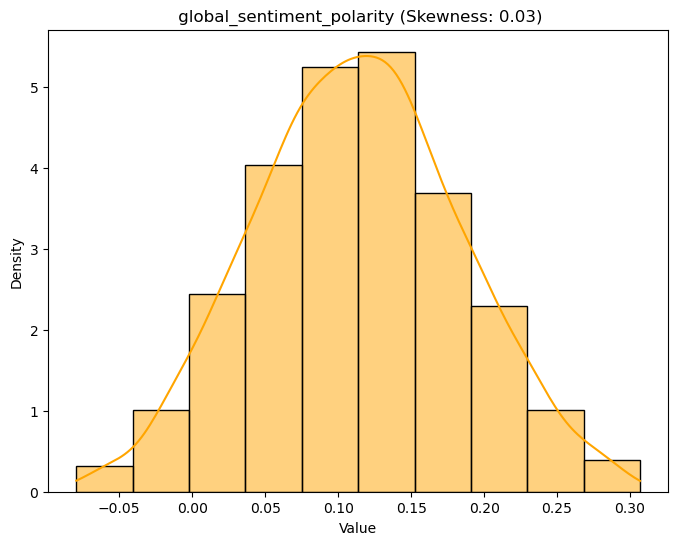

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


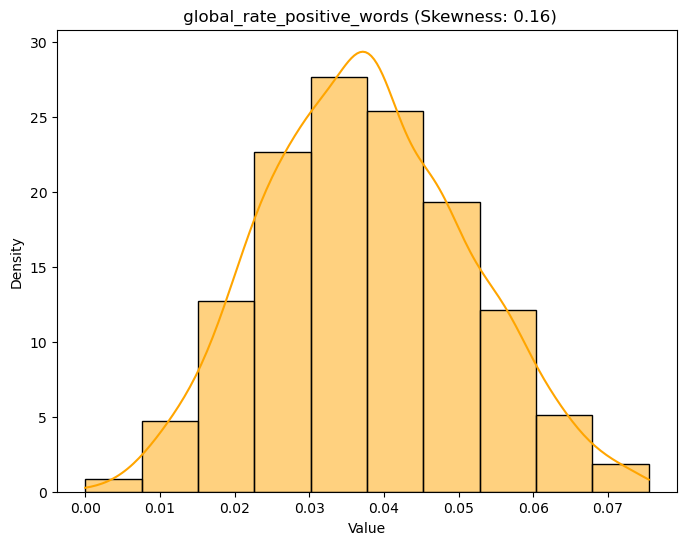

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


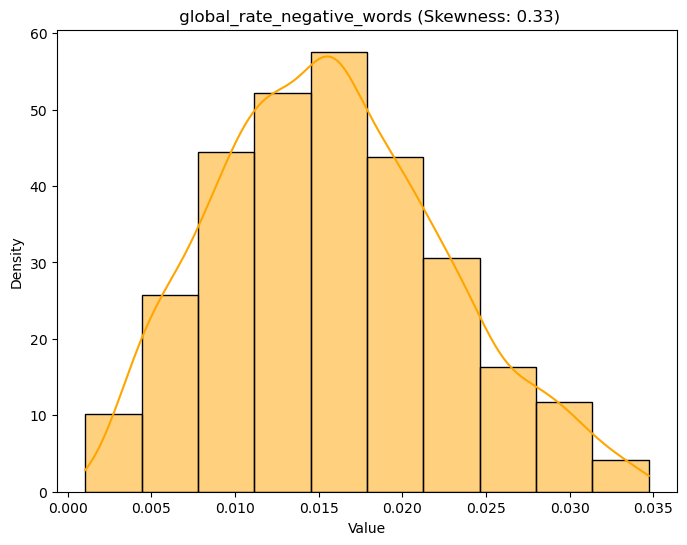

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


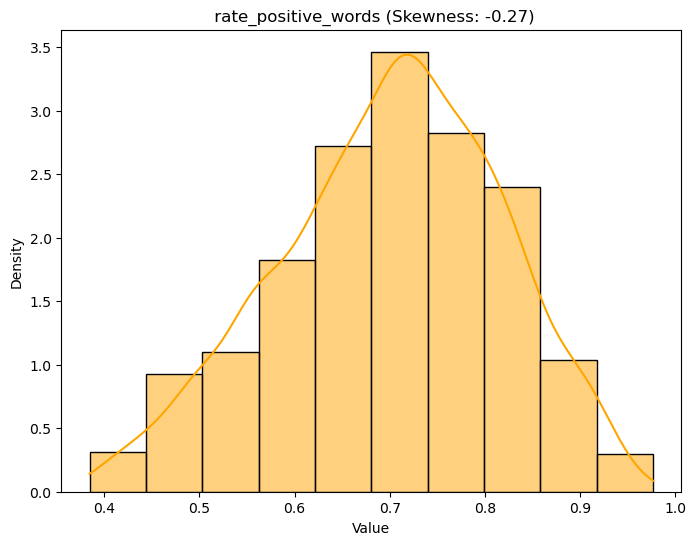

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


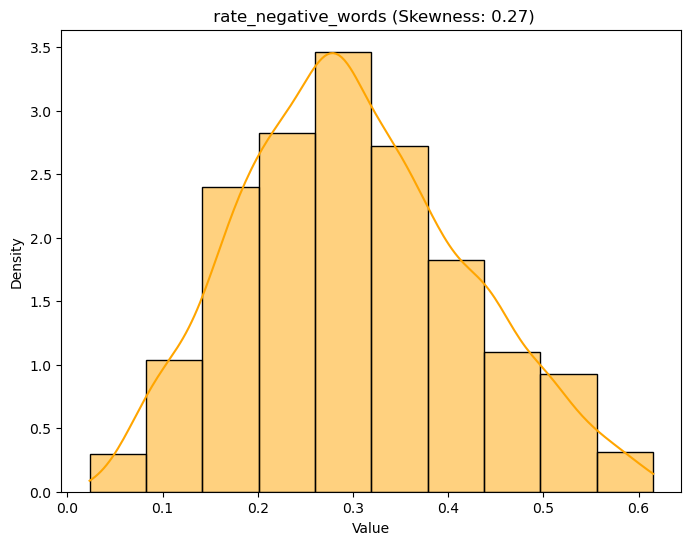

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


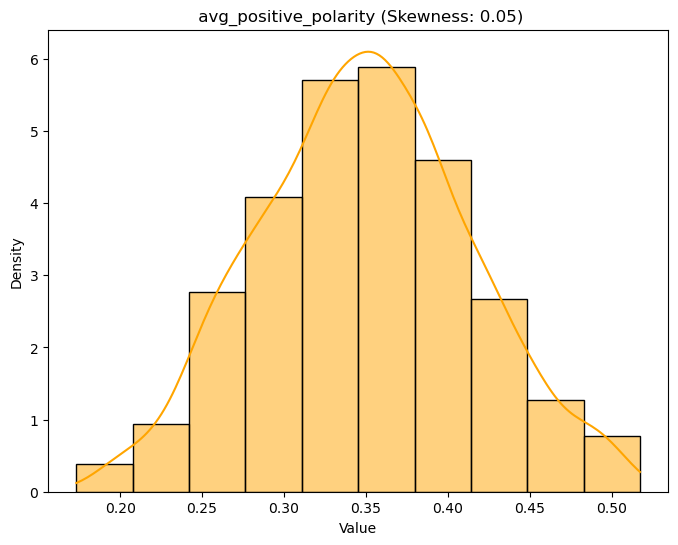

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


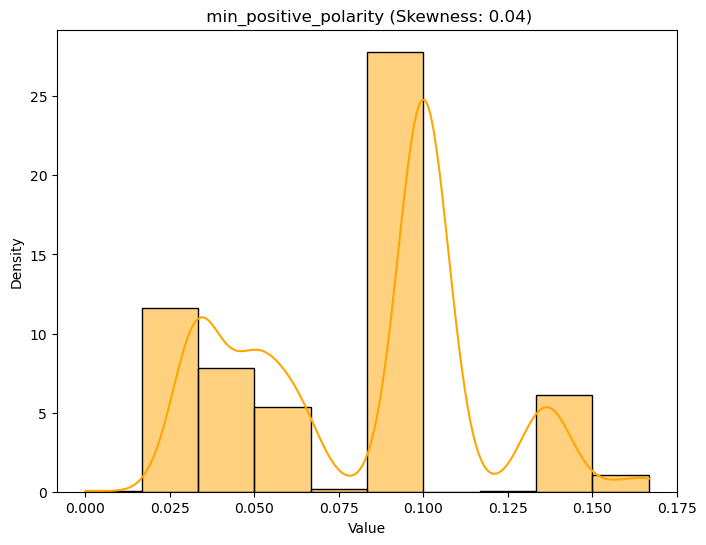

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


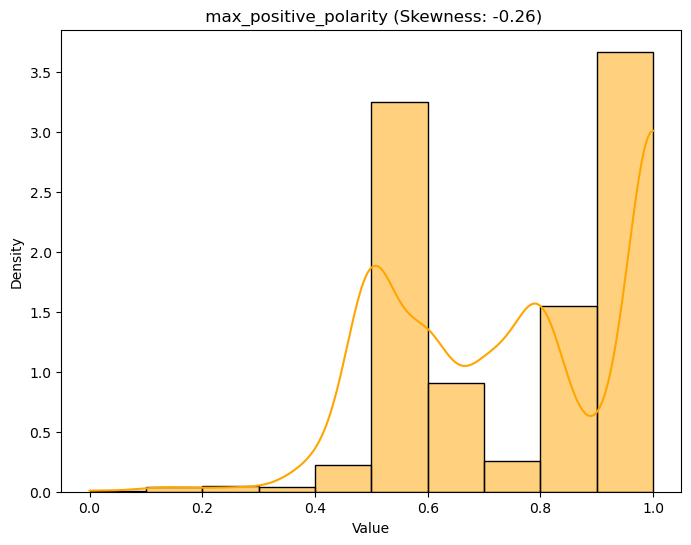

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


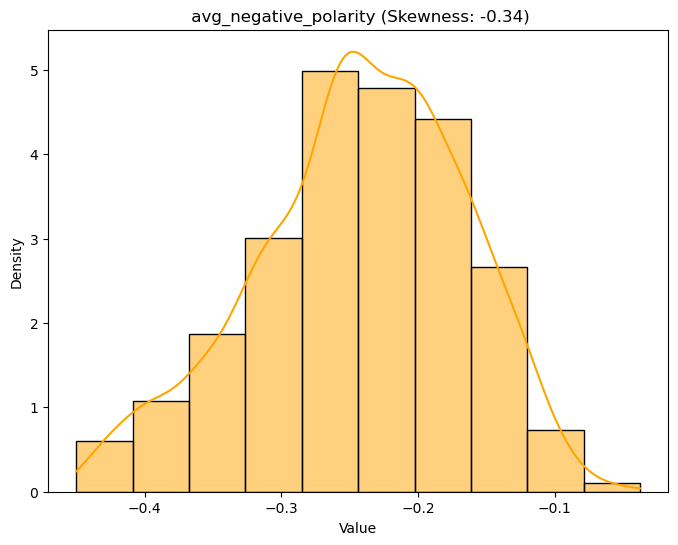

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


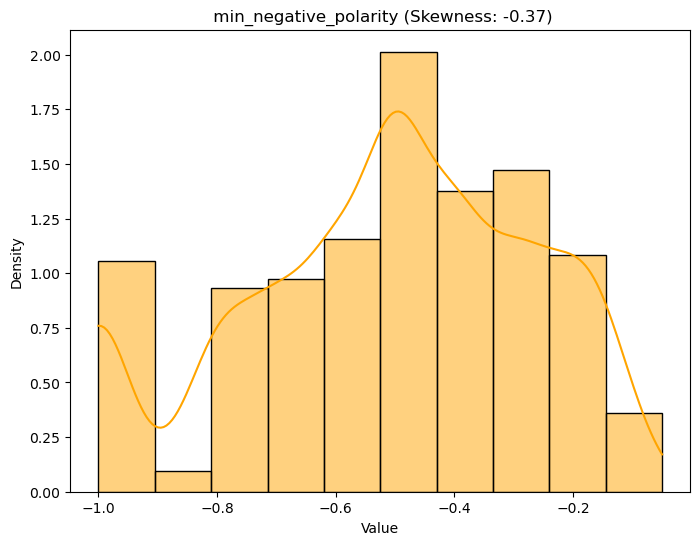

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


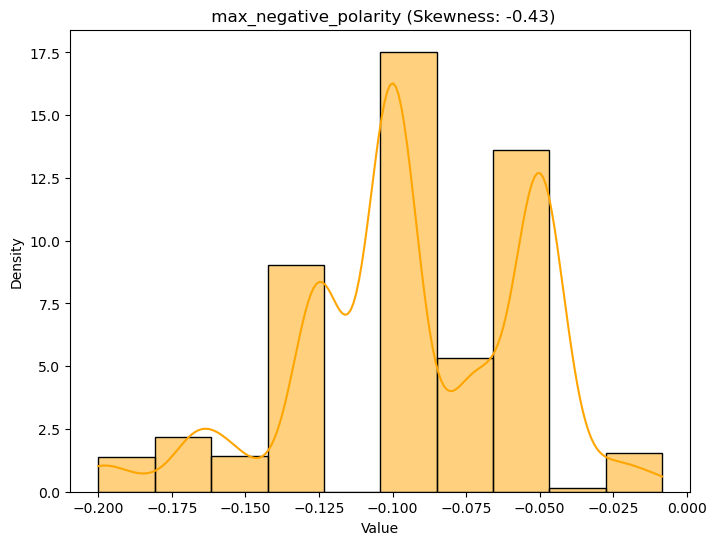

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


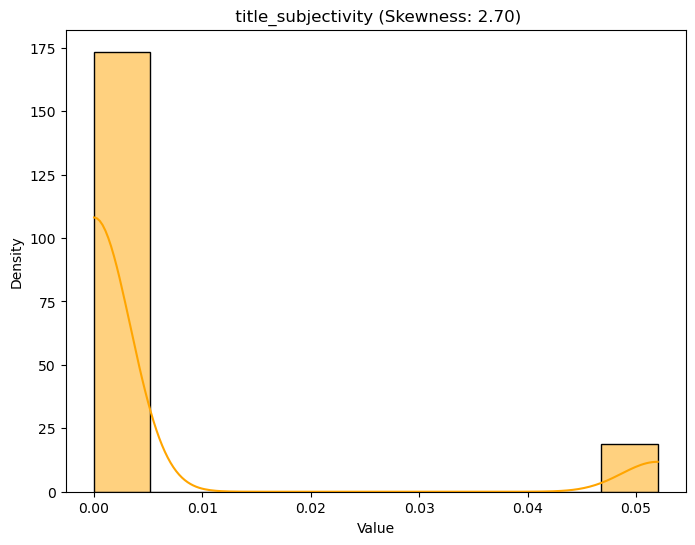

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


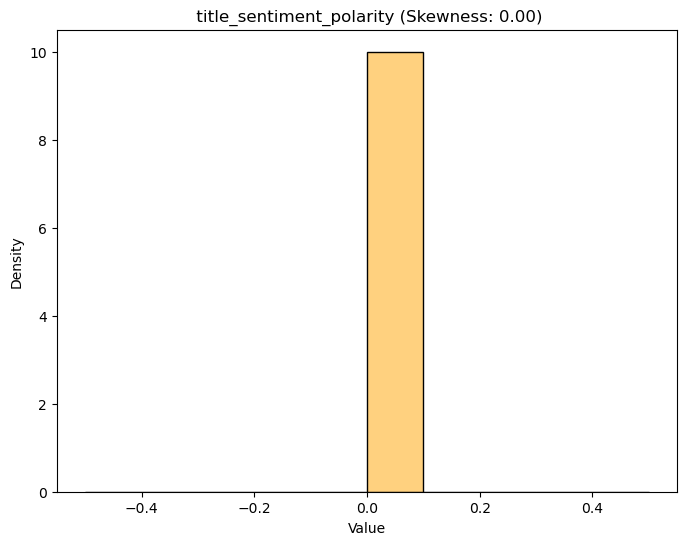

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


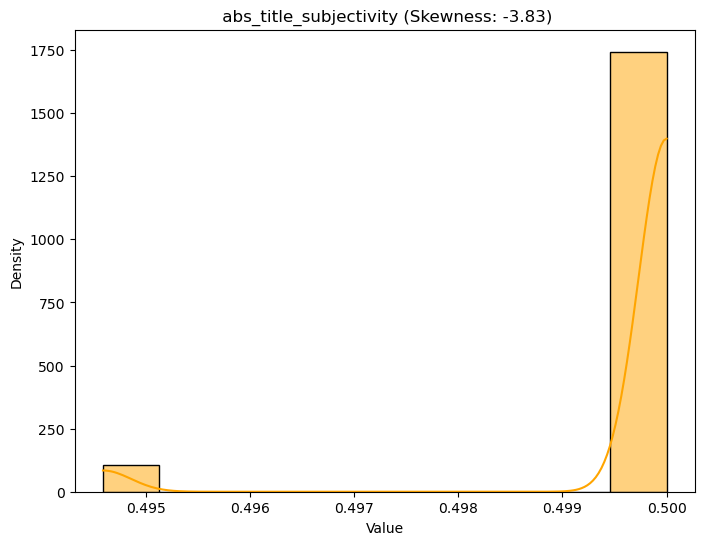

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


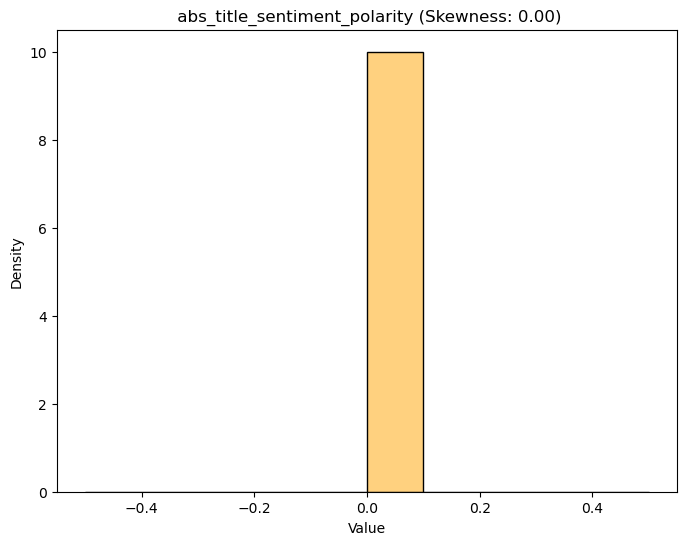

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


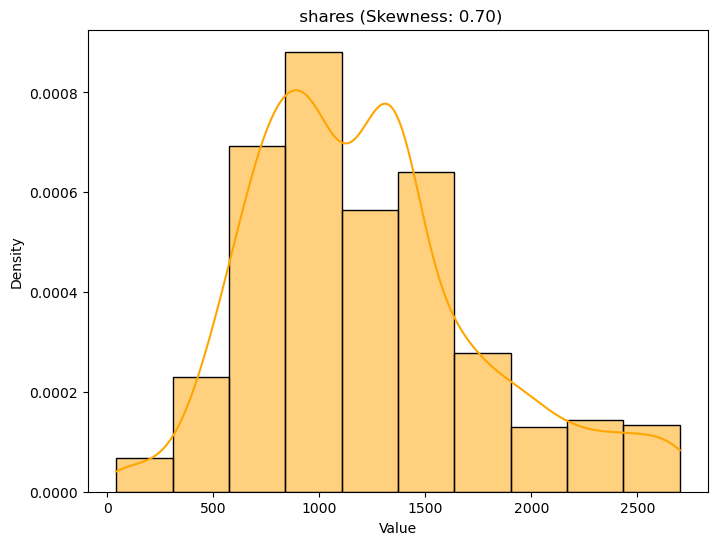

In [826]:
# Visualize skewness for multiple columns
numerical_columns = df_no_outliers2.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    skewness = df_no_outliers2[col].skew()
    
    plt.figure(figsize=(8, 6))
    sns.histplot(df_no_outliers2[col], kde=True, bins=10, color='orange', stat='density')
    plt.title(f'{col} (Skewness: {skewness:.2f})')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

###  Handle Right-Skewed Data (Positive Skewness)

In [828]:
df2 = df_no_outliers2 

In [829]:
df2

url   timedelta  \
82     http://mashable.com/2013/01/08/nfl-arian-foste...       730.0   
149        http://mashable.com/2013/01/09/mint-the-coin/       729.0   
194    http://mashable.com/2013/01/10/cheaper-iphone-...       728.0   
203    http://mashable.com/2013/01/10/earth-like-plan...       728.0   
205          http://mashable.com/2013/01/10/faster-wifi/       728.0   
...                                                  ...         ...   
39609  http://mashable.com/2014/12/26/roberto-orci-st...         9.0   
39628  http://mashable.com/2014/12/27/facebook-year-i...         9.0   
39631  http://mashable.com/2014/12/27/japan-elderly-d...         9.0   
39633  http://mashable.com/2014/12/27/lbj-adviser-sla...         9.0   
39642     http://mashable.com/2014/12/27/ukraine-blasts/         8.0   

        n_tokens_title   n_tokens_content   n_unique_tokens  \
82                11.0              281.0          0.610714   
149               10.0              614.0          0.530579   
194               10.0              289.0          0.586957   
203                9.0              757.0          0.449198   
205               10.0              357.0          0.525424   
...                ...                ...               ...   
39609              8.0              437.0          0.547564   
39628             14.0              626.0          0.552504   
39631             13.0              746.0          0.465306   
39633              9.0              614.0          0.476033   
39642              6.0              682.0          0.539493   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
82                   1.0                   0.766467         5.0   
149                  1.0                   0.750000        11.0   
194                  1.0                   0.724551         8.0   
203                  1.0                   0.634033        11.0   
205                  1.0                   0.650442         6.0   
...                  ...                        ...         ...   
39609                1.0                   0.780992         5.0   
39628                1.0                   0.759791         4.0   
39631                1.0                   0.735849         4.0   
39633                1.0                   0.614987        10.0   
39642                1.0                   0.692661        10.0   

        num_self_hrefs   num_imgs  ...   min_positive_polarity  \
82                 4.0        1.0  ...                0.136364   
149                2.0        1.0  ...                0.062500   
194                7.0        1.0  ...                0.062500   
203                0.0        1.0  ...                0.100000   
205                4.0        1.0  ...                0.062500   
...                ...        ...  ...                     ...   
39609              2.0        1.0  ...                0.100000   
39628              2.0        1.0  ...                0.033333   
39631              1.0        1.0  ...                0.100000   
39633              0.0        1.0  ...                0.050000   
39642              1.0        1.0  ...                0.062500   

        max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
82                       0.50               -0.278472                    -0.5   
149                      1.00               -0.247222                    -0.5   
194                      1.00               -0.206250                    -0.3   
203                      1.00               -0.227381                    -0.5   
205                      0.70               -0.181111                    -0.4   
...                       ...                     ...                     ...   
39609                    0.50               -0.151111                    -0.2   
39628                    0.80               -0.253333                    -1.0   
39631                    0.85               -0.375000                    -1.0   
39633                  

In [544]:
print(df2.columns)

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [545]:
len(df2.columns)

61

In [833]:
df2.duplicated().sum()

0

In [835]:

selected_features = [' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity', ' shares']

# Create a new DataFrame with only the selected features
df2_selected = df2[selected_features]

In [837]:
print(df2_selected.head())

      timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
82        730.0             11.0              281.0          0.610714   
149       729.0             10.0              614.0          0.530579   
194       728.0             10.0              289.0          0.586957   
203       728.0              9.0              757.0          0.449198   
205       728.0             10.0              357.0          0.525424   

      n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
82                 1.0                   0.766467         5.0   
149                1.0                   0.750000        11.0   
194                1.0                   0.724551         8.0   
203                1.0                   0.634033        11.0   
205                1.0                   0.650442         6.0   

      num_self_hrefs   num_imgs   num_videos  ...   min_positive_polarity  \
82               4.0        1.0          0.0  ...                0.136364   
149             

In [851]:

# Create a dictionary where keys are feature names and values are the data for those features
data_dict = {feature: df2[feature].tolist() for feature in selected_features}

# Create the DataFrame using the dictionary
df2_selected = pd.DataFrame(data_dict)

# View the new DataFrame
print(df2_selected.head())

    timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
0       730.0             11.0              281.0          0.610714   
1       729.0             10.0              614.0          0.530579   
2       728.0             10.0              289.0          0.586957   
3       728.0              9.0              757.0          0.449198   
4       728.0             10.0              357.0          0.525424   

    n_non_stop_words   n_non_stop_unique_tokens   num_hrefs   num_self_hrefs  \
0                1.0                   0.766467         5.0              4.0   
1                1.0                   0.750000        11.0              2.0   
2                1.0                   0.724551         8.0              7.0   
3                1.0                   0.634033        11.0              0.0   
4                1.0                   0.650442         6.0              4.0   

    num_imgs   num_videos  ...   min_positive_polarity  \
0        1.0          0.0  ...    

In [855]:
df3 = df2_selected

In [857]:
skewness = df3.skew()

right_skewed_features = skewness[skewness > 0].index
right_transformed =df3 [right_skewed_features].apply(np.log1p)

print("right skewed features and their skewness values:")
print(skewness[right_skewed_features])

right skewed features and their skewness values:
 n_tokens_title                0.141820
 n_tokens_content              0.796307
 num_hrefs                     0.646730
 num_self_hrefs                0.617523
 average_token_length          0.066896
 num_keywords                  0.159168
 kw_min_min                    0.381369
 kw_max_min                    0.201343
 kw_avg_min                    0.257660
 kw_min_max                    1.354054
 kw_avg_max                    0.057855
 kw_min_avg                    0.767896
 kw_max_avg                    0.933949
 kw_avg_avg                    0.259990
 self_reference_min_shares     0.680799
 self_reference_max_shares     0.856285
 self_reference_avg_sharess    0.607526
 LDA_01                        0.021863
 LDA_02                        0.921492
 LDA_03                        0.621492
 LDA_04                        1.015468
 global_sentiment_polarity     0.032960
 global_rate_positive_words    0.162404
 global_rate_negative_words    

In [859]:
skewness = df3.skew()

highly_right_skewed_features = skewness[skewness > 1].index
highly_right_transformed =df3 [highly_right_skewed_features].apply(np.log1p)

print("highly right skewed features and their skewness values:")
print(skewness[highly_right_skewed_features])

highly right skewed features and their skewness values:
 kw_min_max            1.354054
 LDA_04                1.015468
 title_subjectivity    2.698504
dtype: float64


In [845]:
# moderately_skewed = skewness_values[(skewness_values > 0) & (skewness_values < 1)]
skewness = df4.skew()

moderately_skewed_features = skewness[(skewness > 0) & (skewness < 1)].index
moderately_transformed =df4 [moderately_skewed_features].apply(np.sqrt)

print("moderately skewed features and their skewness values:")
print(skewness[moderately_skewed_features])

moderately skewed features and their skewness values:
 timedelta                     0.127044
 n_tokens_title                0.080361
 n_tokens_content              0.586571
 n_unique_tokens               0.108181
 n_non_stop_unique_tokens      0.057973
 num_hrefs                     0.560727
 num_self_hrefs                0.700968
 average_token_length          0.016745
 num_keywords                  0.320170
 kw_min_min                    0.906353
 kw_avg_min                    0.365260
 kw_min_max                    0.881039
 kw_min_avg                    0.972704
 kw_max_avg                    0.463974
 kw_avg_avg                    0.214341
 self_reference_min_shares     0.062882
 self_reference_max_shares     0.662601
 self_reference_avg_sharess    0.347602
 global_sentiment_polarity     0.079399
 global_rate_negative_words    0.122454
 avg_positive_polarity         0.034446
 avg_negative_polarity         0.251084
 shares                        0.227395
dtype: float64


In [861]:
skewness = df3.skew()

left_skewed_features = skewness[skewness < 0].index
left_transformed =df3 [left_skewed_features].apply(np.exp)

print("left skewed features and their skewness values:")
print(skewness[left_skewed_features])


left skewed features and their skewness values:
 timedelta                  -0.368352
 n_unique_tokens            -0.023038
 n_non_stop_unique_tokens   -0.197719
 LDA_00                     -0.246768
 global_subjectivity        -0.156257
 rate_positive_words        -0.267888
 max_positive_polarity      -0.257758
 avg_negative_polarity      -0.341884
 min_negative_polarity      -0.368463
 max_negative_polarity      -0.430413
 abs_title_subjectivity     -3.834229
dtype: float64


In [863]:
# Combine both transformed features into a new DataFrame (or variable)
transformed_data = pd.concat([right_transformed, highly_right_transformed,left_transformed,moderately_transformed], axis=1)

# View the new transformed data
print(transformed_data)

        n_tokens_title   n_tokens_content   num_hrefs   num_self_hrefs  \
0             2.484907           5.641907    1.791759         1.609438   
1             2.397895           6.421622    2.484907         1.098612   
2             2.397895           5.669881    2.197225         2.079442   
3             2.302585           6.630683    2.484907         0.000000   
4             2.397895           5.880533    1.945910         1.609438   
...                ...                ...         ...              ...   
10398              NaN                NaN         NaN              NaN   
10399              NaN                NaN         NaN              NaN   
10400              NaN                NaN         NaN              NaN   
10401              NaN                NaN         NaN              NaN   
10402              NaN                NaN         NaN              NaN   

        average_token_length   num_keywords   kw_min_min   kw_max_min  \
0                   1.724291       1.6

In [865]:
df4 =  transformed_data

In [867]:
df4

n_tokens_title   n_tokens_content   num_hrefs   num_self_hrefs  \
0             2.484907           5.641907    1.791759         1.609438   
1             2.397895           6.421622    2.484907         1.098612   
2             2.397895           5.669881    2.197225         2.079442   
3             2.302585           6.630683    2.484907         0.000000   
4             2.397895           5.880533    1.945910         1.609438   
...                ...                ...         ...              ...   
10398              NaN                NaN         NaN              NaN   
10399              NaN                NaN         NaN              NaN   
10400              NaN                NaN         NaN              NaN   
10401              NaN                NaN         NaN              NaN   
10402              NaN                NaN         NaN              NaN   

        average_token_length   num_keywords   kw_min_min   kw_max_min  \
0                   1.724291       1.609438         -inf     6.386879   
1                   1.750474       1.609438         -inf     6.395262   
2                   1.716320       2.079442         -inf     6.493754   
3                   1.714666       2.079442         -inf     7.090910   
4                   1.782850       1.791759         -inf     5.924256   
...                      ...            ...          ...          ...   
10398                    NaN            NaN          NaN          NaN   
10399                    NaN            NaN          NaN          NaN   
10400                    NaN            NaN          NaN          NaN   
10401                    NaN            NaN          NaN          NaN   
10402                    NaN            NaN          NaN          NaN   

        kw_avg_min   kw_min_max  ...   kw_max_avg   kw_avg_avg  \
0         6.135565     0.000000  ...    65.997623    53.573080   
1         6.114235     7.313887  ...    65.997623    53.573080   
2         5.465948     7.937732  ...    65.997623    53.573080   
3         6.312642     0.000000  ...    65.997623    53.573080   
4         5.774552     0.000000  ...    65.997623    53.573080   
...            ...          ...  ...          ...          ...   
10398          NaN          NaN  ...    61.525812    40.919412   
10399          NaN          NaN  ...    58.184133    44.677353   
10400          NaN          NaN  ...    58.184133    48.107342   
10401          NaN          NaN  ...    65.584544    51.630545   
10402          NaN          NaN  ...    58.174882    42.165103   

        self_reference_min_shares   self_reference_max_shares  \
0                       22.271057                   22.271057   
1                       30.298515                   30.298515   
2                        0.000000                    0.000000   
3                       23.345235                   52.915026   
4                        0.000000                    0.000000   
...                           ...                         ...   
10398                   38.729833                   38.729833   
10399                   27.367864                   27.367864   
10400                   41.231056                   41.231056   
10401                   44.721360                   75.498344   
10402                   21.260292                   21.260292   

        self_reference_avg_sharess   global_sentiment_polarity  \
0                        22.271057                    0.304240   
1                        30.298515                    0.568624   
2                         0.000000                    0.317340   
3                        56.135175                    0.517979   
4                         0.000000                    0.401386   
...                            ...                         ...   
10398                    38.729833                    0.246906   
10399                    27.367864                    0.327785   
10400                    41.231056                    0.279490   
10401   

In [871]:
print(df4.isna().sum())

 n_tokens_title                8218
 n_tokens_content              8218
 num_hrefs                     8218
 num_self_hrefs                8218
 average_token_length          8218
                               ... 
 global_sentiment_polarity      873
 global_rate_negative_words       0
 avg_positive_polarity            0
 avg_negative_polarity         9712
 shares                           0
Length: 66, dtype: int64


In [873]:
# Fill NaN values with the median
df4.fillna(df4.median(), inplace=True)

In [875]:
print(df4.isna().sum())

 n_tokens_title                0
 n_tokens_content              0
 num_hrefs                     0
 num_self_hrefs                0
 average_token_length          0
                              ..
 global_sentiment_polarity     0
 global_rate_negative_words    0
 avg_positive_polarity         0
 avg_negative_polarity         0
 shares                        0
Length: 66, dtype: int64


## EDA

In [915]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10403 entries, 0 to 10402
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0    n_tokens_title              10403 non-null  float64
 1    n_tokens_content            10403 non-null  float64
 2    num_hrefs                   10403 non-null  float64
 3    num_self_hrefs              10403 non-null  float64
 4    average_token_length        10403 non-null  float64
 5    num_keywords                10403 non-null  float64
 6    kw_min_min                  10403 non-null  float64
 7    kw_max_min                  10403 non-null  float64
 8    kw_avg_min                  10403 non-null  float64
 9    kw_min_max                  10403 non-null  float64
 10   kw_avg_max                  10403 non-null  float64
 11   kw_min_avg                  10403 non-null  float64
 12   kw_max_avg                  10403 non-null  float64
 13   kw_avg_avg     

In [879]:
df4.duplicated().sum()

0

In [885]:
# Check for duplicate columns
duplicate_columns = df4.columns[df4.columns.duplicated()]
print("Duplicate columns:", duplicate_columns.tolist())

Duplicate columns: [' kw_min_max', ' LDA_04', ' title_subjectivity', ' timedelta', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' average_token_length', ' num_keywords', ' kw_min_min', ' kw_avg_min', ' kw_min_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' global_sentiment_polarity', ' global_rate_negative_words', ' avg_positive_polarity', ' avg_negative_polarity', ' shares']


In [ ]:
import pandas as pd

# Reverse column order
#df4 = df4.iloc[:, ::-1]

# Drop duplicated columns, keeping the first in the reversed order (which is the last in the original)
df4 = df4.loc[:, ~df.columns.duplicated()]

# Reverse back to original column order
#df4 = df4.iloc[:, ::-1]

# Check result
print(df4.info())
print(df4.head())

In [913]:
df4

n_tokens_title   n_tokens_content   num_hrefs   num_self_hrefs  \
0             2.484907           5.641907    1.791759         1.609438   
1             2.397895           6.421622    2.484907         1.098612   
2             2.397895           5.669881    2.197225         2.079442   
3             2.302585           6.630683    2.484907         0.000000   
4             2.397895           5.880533    1.945910         1.609438   
...                ...                ...         ...              ...   
10398         2.397895           6.075346    2.197225         1.098612   
10399         2.397895           6.075346    2.197225         1.098612   
10400         2.397895           6.075346    2.197225         1.098612   
10401         2.397895           6.075346    2.197225         1.098612   
10402         2.397895           6.075346    2.197225         1.098612   

        average_token_length   num_keywords   kw_min_min   kw_max_min  \
0                   1.724291       1.609438         -inf     6.386879   
1                   1.750474       1.609438         -inf     6.395262   
2                   1.716320       2.079442         -inf     6.493754   
3                   1.714666       2.079442         -inf     7.090910   
4                   1.782850       1.791759         -inf     5.924256   
...                      ...            ...          ...          ...   
10398               1.741692       2.079442         -inf     6.439350   
10399               1.741692       2.079442         -inf     6.439350   
10400               1.741692       2.079442         -inf     6.439350   
10401               1.741692       2.079442         -inf     6.439350   
10402               1.741692       2.079442         -inf     6.439350   

        kw_avg_min   kw_min_max  ...   n_unique_tokens  \
0         6.135565     0.000000  ...          1.841746   
1         6.114235     7.313887  ...          1.699915   
2         5.465948     7.937732  ...          1.798506   
3         6.312642     0.000000  ...          1.567055   
4         5.774552     0.000000  ...          1.691175   
...            ...          ...  ...               ...   
10398     5.465948     0.000000  ...          1.696335   
10399     5.465948     0.000000  ...          1.696335   
10400     5.465948     0.000000  ...          1.696335   
10401     5.465948     0.000000  ...          1.696335   
10402     5.465948     0.000000  ...          1.696335   

        n_non_stop_unique_tokens    LDA_00   global_subjectivity  \
0                       2.152149  1.031820              1.543756   
1                       2.117000  1.031820              1.538773   
2                       2.063804  1.029256              1.535735   
3                       1.885198  1.028984              1.728061   
4                       1.916389  1.040812              1.625811   
...                          ...       ...                   ...   
10398                   1.997546  1.033896              1.549811   
10399                   1.997546  1.033896              1.549811   
10400                   1.997546  1.033896              1.549811   
10401                   1.997546  1.033896              1.549811   
10402                   1.997546  1.033896              1.549811   

        rate_positive_words   max_positive_polarity   avg_negative_polarity  \
0                  1.982206                1.648721                0.756939   
1                  2.145039                2.718282                0.780967   
2                  2.246838                2.718282                0.813630   
3                  2.215448                2.718282                0.796617   
4                  2.089327                2.013753                0.834343   
...                     ...                     ...                     ...   
10398              2.035062                2.225541                0.787559   
10399              2.035062                2.225541                0.787559   
10400            

In [897]:
df4

n_tokens_title   n_tokens_content   num_hrefs   num_self_hrefs  \
0             2.484907           5.641907    1.791759         1.609438   
1             2.397895           6.421622    2.484907         1.098612   
2             2.397895           5.669881    2.197225         2.079442   
3             2.302585           6.630683    2.484907         0.000000   
4             2.397895           5.880533    1.945910         1.609438   
...                ...                ...         ...              ...   
10398         2.397895           6.075346    2.197225         1.098612   
10399         2.397895           6.075346    2.197225         1.098612   
10400         2.397895           6.075346    2.197225         1.098612   
10401         2.397895           6.075346    2.197225         1.098612   
10402         2.397895           6.075346    2.197225         1.098612   

        average_token_length   num_keywords   kw_min_min   kw_max_min  \
0                   1.724291       1.609438         -inf     6.386879   
1                   1.750474       1.609438         -inf     6.395262   
2                   1.716320       2.079442         -inf     6.493754   
3                   1.714666       2.079442         -inf     7.090910   
4                   1.782850       1.791759         -inf     5.924256   
...                      ...            ...          ...          ...   
10398               1.741692       2.079442         -inf     6.439350   
10399               1.741692       2.079442         -inf     6.439350   
10400               1.741692       2.079442         -inf     6.439350   
10401               1.741692       2.079442         -inf     6.439350   
10402               1.741692       2.079442         -inf     6.439350   

        kw_avg_min   kw_min_max  ...   n_unique_tokens  \
0         6.135565     0.000000  ...          1.841746   
1         6.114235     7.313887  ...          1.699915   
2         5.465948     7.937732  ...          1.798506   
3         6.312642     0.000000  ...          1.567055   
4         5.774552     0.000000  ...          1.691175   
...            ...          ...  ...               ...   
10398     5.465948     0.000000  ...          1.696335   
10399     5.465948     0.000000  ...          1.696335   
10400     5.465948     0.000000  ...          1.696335   
10401     5.465948     0.000000  ...          1.696335   
10402     5.465948     0.000000  ...          1.696335   

        n_non_stop_unique_tokens    LDA_00   global_subjectivity  \
0                       2.152149  1.031820              1.543756   
1                       2.117000  1.031820              1.538773   
2                       2.063804  1.029256              1.535735   
3                       1.885198  1.028984              1.728061   
4                       1.916389  1.040812              1.625811   
...                          ...       ...                   ...   
10398                   1.997546  1.033896              1.549811   
10399                   1.997546  1.033896              1.549811   
10400                   1.997546  1.033896              1.549811   
10401                   1.997546  1.033896              1.549811   
10402                   1.997546  1.033896              1.549811   

        rate_positive_words   max_positive_polarity   avg_negative_polarity  \
0                  1.982206                1.648721                0.756939   
1                  2.145039                2.718282                0.780967   
2                  2.246838                2.718282                0.813630   
3                  2.215448                2.718282                0.796617   
4                  2.089327                2.013753                0.834343   
...                     ...                     ...                     ...   
10398              2.035062                2.225541                0.787559   
10399              2.035062                2.225541                0.787559   
10400            

In [893]:
df4.columns

Index([' n_tokens_title', ' n_tokens_content', ' num_hrefs', ' num_self_hrefs',
       ' average_token_length', ' num_keywords', ' kw_min_min', ' kw_max_min',
       ' kw_avg_min', ' kw_min_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess', ' LDA_01',
       ' LDA_02', ' LDA_03', ' LDA_04', ' global_sentiment_polarity',
       ' global_rate_positive_words', ' global_rate_negative_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' title_subjectivity', ' shares',
       ' timedelta', ' n_unique_tokens', ' n_non_stop_unique_tokens',
       ' LDA_00', ' global_subjectivity', ' rate_positive_words',
       ' max_positive_polarity', ' avg_negative_polarity',
       ' min_negative_polarity', ' max_negative_polarity',
       ' abs_title_subjectivity'],
      dtype='object')

In [891]:
df4.shape

(10403, 40)

In [561]:
df4.describe()

C:\Users\Najma\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\Najma\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\Najma\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count  10403.000000     10403.000000       10403.000000      10403.000000   
mean       5.554844         2.423959           5.789043          0.429250   
std        0.936621         0.185201           1.278514          0.054661   
min        2.197225         1.791759           0.000000          0.274174   
25%        5.043425         2.302585           5.579730          0.393159   
50%        5.811141         2.397895           6.016157          0.431279   
75%        6.327937         2.564949           6.434547          0.465119   
max        6.595781         2.833213           7.024649          0.564705   

        n_non_stop_unique_tokens     num_hrefs   num_self_hrefs    num_videos  \
count               10403.000000  10403.000000     10403.000000  10403.000000   
mean                    0.526597      1.957417         1.050340      0.217350   
std                     0.045908      0.655247         0.639956      0.353382   
min                     0.399554      0.000000         0.000000      0.000000   
25%                     0.497184      1.609438         0.693147      0.000000   
50%                     0.525010      2.079442         1.098612      0.000000   
75%                     0.556494      2.397895         1.609438      0.693147   
max                     0.640657      2.995732         2.197225      1.098612   

        average_token_length   num_keywords  ...    kw_max_avg    kw_avg_avg  \
count           10403.000000   10403.000000  ...  10403.000000  10403.000000   
mean                1.740797       2.080568  ...     62.749405     50.220573   
std                 0.043297       0.203118  ...      5.067261      5.657741   
min                 1.616530       1.609438  ...     46.417669     32.190202   
25%                 1.711874       1.945910  ...     58.984381     46.372108   
50%                 1.739040       2.079442  ...     62.643382     50.674047   
75%                 1.770922       2.197225  ...     65.997623     53.573080   
max                 1.847151       2.397895  ...     75.617970     63.387841   

        self_reference_min_shares   self_reference_max_shares  \
count                10403.000000                10403.000000   
mean                    24.842276                   35.291264   
std                     15.389059                   23.128765   
min                      0.000000                    0.000000   
25%                      7.549544                   18.727383   
50%                     30.397368                   40.000000   
75%                     34.641016                   52.915026   
max                     47.958315                   80.000000   

        self_reference_avg_sharess   global_sentiment_polarity  \
count                 10403.000000                 9530.000000   
mean                     31.638155                    0.323357   
std                      20.004015                    0.124184   
min                       0.000000                    0.000000   
25%                      18.727383                    0.257582   
50%                      37.416574                    0.342379   
75%                      46.904158                    0.409463   
max                      66.143783                    0.573212   

        global_rate_negative_words   avg_positive_polarity  \
count                 10403.000000            10403.000000   
mean                      0.116006                0.590599   
std                       0.042151                0.056413   
min                       0.000000                0.424264   
25%                       0.099276                0.554691   
50%                       0.123844                0.597016   
75%                       0.142857                0.627927   
max                       0.190347                0.723880   

        avg_negative_polarity        shares  
count                   691.0  10403.000000  
mean                      0.0    

In [565]:
print(df4.isnull().sum())

 timedelta                        0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_unique_tokens         0
                               ... 
 global_sentiment_polarity      873
 global_rate_negative_words       0
 avg_positive_polarity            0
 avg_negative_polarity         9712
 shares                           0
Length: 69, dtype: int64


### Handle missing values with mean

In [612]:
# Select numerical columns
numerical_cols = df4.select_dtypes(include=['int64', 'float64']).columns

# Fill missing values with mean for each numerical column
for col in numerical_cols:
    df4[col] = df4[col].fillna(df4[col].mean())

# Display the updated DataFrame
print(df4)

        timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
0        6.595781         2.564949           5.393628          0.508981   
1        6.595781         2.302585           5.356586          0.454338   
2        6.595781         2.302585           6.276643          0.407987   
3        6.595781         2.197225           6.867974          0.349362   
4        6.595781         2.484907           4.584967          0.512885   
...           ...              ...                ...               ...   
10398    2.302585         2.639057           6.025866          0.442552   
10399    2.302585         2.708050           6.774224          0.392516   
10400    2.302585         2.639057           6.616065          0.382064   
10401    2.197225         2.484907           5.411646          0.502684   
10402    2.197225         1.945910           6.526495          0.431453   

        n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_videos  \
0                    

In [614]:
print(df4.isnull().sum())

 timedelta                     0
 n_tokens_title                0
 n_tokens_content              0
 n_unique_tokens               0
 n_non_stop_unique_tokens      0
                              ..
 global_sentiment_polarity     0
 global_rate_negative_words    0
 avg_positive_polarity         0
 avg_negative_polarity         0
 shares                        0
Length: 69, dtype: int64


In [740]:
df4.columns

Index([' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_videos', ' average_token_length',
       ' num_keywords', ' kw_min_min', ' kw_avg_min', ' kw_min_max',
       ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', ' LDA_04', ' global_sentiment_polarity',
       ' global_rate_negative_words', ' avg_positive_polarity',
       ' avg_negative_polarity', ' title_subjectivity',
       ' abs_title_sentiment_polarity', ' shares', ' num_videos', ' LDA_04',
       ' title_subjectivity', ' abs_title_sentiment_polarity', ' kw_max_min',
       ' kw_avg_max', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03',
       ' global_subjectivity', ' global_rate_positive_words',
       ' rate_positive_words', ' rate_negative_words',
       ' min_positive_polarity', ' max_positive_polarity',
       ' min_negati

In [742]:
# Step 1: Transpose the DataFrame and check for duplicates
duplicate_columns = df5.T.duplicated()

# Step 2: Get the names of duplicate columns
duplicate_column_names = df5.columns[duplicate_columns]

# Step 3: Print the duplicate column names
print("Duplicate columns:")
print(duplicate_column_names)

Duplicate columns:
Index([' num_videos', ' LDA_04', ' title_subjectivity',
       ' abs_title_sentiment_polarity'],
      dtype='object')


In [744]:
# Drop the duplicate columns from the DataFrame
df_unique = df5.drop(columns=duplicate_column_names)

print("DataFrame after removing duplicate columns:")
print(df_unique)

DataFrame after removing duplicate columns:
        timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
0        6.595781         2.564949           5.393628          0.508981   
1        6.595781         2.302585           5.356586          0.454338   
2        6.595781         2.302585           6.276643          0.407987   
3        6.595781         2.197225           6.867974          0.349362   
4        6.595781         2.484907           4.584967          0.512885   
...           ...              ...                ...               ...   
10398    2.302585         2.639057           6.025866          0.442552   
10399    2.302585         2.708050           6.774224          0.392516   
10400    2.302585         2.639057           6.616065          0.382064   
10401    2.197225         2.484907           5.411646          0.502684   
10402    2.197225         1.945910           6.526495          0.431453   

        n_non_stop_unique_tokens   num_hrefs   num_self

In [746]:
df_unique.columns

Index([' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' average_token_length', ' num_keywords',
       ' kw_min_min', ' kw_avg_min', ' kw_min_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' global_sentiment_polarity', ' global_rate_negative_words',
       ' avg_positive_polarity', ' avg_negative_polarity', ' shares',
       ' kw_max_min', ' kw_avg_max', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' global_subjectivity', ' global_rate_positive_words',
       ' rate_positive_words', ' rate_negative_words',
       ' min_positive_polarity', ' max_positive_polarity',
       ' min_negative_polarity', ' max_negative_polarity',
       ' abs_title_subjectivity', ' timedelta', ' n_tokens_title',
       ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_unique_tokens',
 

In [748]:
# Check if there are two columns named 'shares'
duplicate_columns = df_unique.columns[df_unique.columns.duplicated()]

if 'shares' in duplicate_columns:
    print("There are duplicate 'shares' columns in the dataset.")
else:
    print("No duplicate 'shares' columns found.")

No duplicate 'shares' columns found.


### Find correlation

In [616]:
numeric_data = df5.select_dtypes(include = ['int64','float64'])
correlation_matrix = numeric_data.corr()
correlation_matrix

timedelta   n_tokens_title   n_tokens_content  \
 timedelta                     1.000000        -0.229331           0.135596   
 n_tokens_title               -0.229331         1.000000          -0.039345   
 n_tokens_content              0.135596        -0.039345           1.000000   
 n_unique_tokens               0.103607        -0.032546          -0.311933   
 n_non_stop_unique_tokens      0.083852        -0.037294          -0.234193   
...                                 ...              ...                ...   
 global_sentiment_polarity     0.249324        -0.086979           0.377383   
 global_rate_negative_words    0.051800         0.002494           0.579965   
 avg_positive_polarity         0.074823        -0.013151          -0.022282   
 avg_negative_polarity        -0.111199         0.029036          -0.747715   
 shares                        0.010870        -0.013854          -0.031612   

                              n_unique_tokens   n_non_stop_unique_tokens  \
 timedelta                           0.103607                   0.083852   
 n_tokens_title                     -0.032546                  -0.037294   
 n_tokens_content                   -0.311933                  -0.234193   
 n_unique_tokens                     1.000000                   0.815574   
 n_non_stop_unique_tokens            0.815574                   1.000000   
...                                       ...                        ...   
 global_sentiment_polarity          -0.009488                  -0.006307   
 global_rate_negative_words         -0.134082                  -0.072663   
 avg_positive_polarity              -0.020545                   0.008199   
 avg_negative_polarity               0.105743                   0.075806   
 shares                             -0.029403                  -0.035031   

                              num_hrefs   num_self_hrefs   num_videos  \
 timedelta                     0.159293         0.069934    -0.149434   
 n_tokens_title               -0.062244         0.053916     0.101464   
 n_tokens_content              0.655700         0.278397    -0.214135   
 n_unique_tokens              -0.208660        -0.016226     0.078261   
 n_non_stop_unique_tokens     -0.226297        -0.064537     0.070101   
...                                 ...              ...          ...   
 global_sentiment_polarity     0.301151         0.154197    -0.123449   
 global_rate_negative_words    0.353022         0.122878    -0.104760   
 avg_positive_polarity         0.016482         0.000659    -0.018782   
 avg_negative_polarity        -0.487860        -0.241398     0.150028   
 shares                       -0.001218         0.047605     0.027741   

                              average_token_length   num_keywords  ...  \
 timedelta                               -0.056138       0.067661  ...   
 n_tokens_title                          -0.097247       0.010756  ...   
 n_tokens_content                         0.056805       0.037642  ...   
 n_unique_tokens                          0.053914      -0.084775  ...   
 n_non_stop_unique_tokens                -0.040069      -0.075673  ...   
...                                            ...            ...  ...   
 global_sentiment_polarity               -0.124881       0.051599  ...   
 global_rate_negative_words              -0.007089      -0.009618  ...   
 avg_positive_polarity                   -0.161374       0.019250  ...   
 avg_negative_polarity                   -0.028326       0.013600  ...   
 shares                                  -0.073869      -0.015897  ...   

                              kw_max_avg   kw_avg_avg  \
 timedelta                     -0.058297    -0.076009   
 n_tokens_title                 0.020225     0.031801   
 n_tokens_content              -0.061997    -0.084172   
 n_unique_tokens                0.024229     0.036345   
 n_non_stop_unique_tokens       0.028555     0.022117   
...                                  ...          ...   
 gl

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


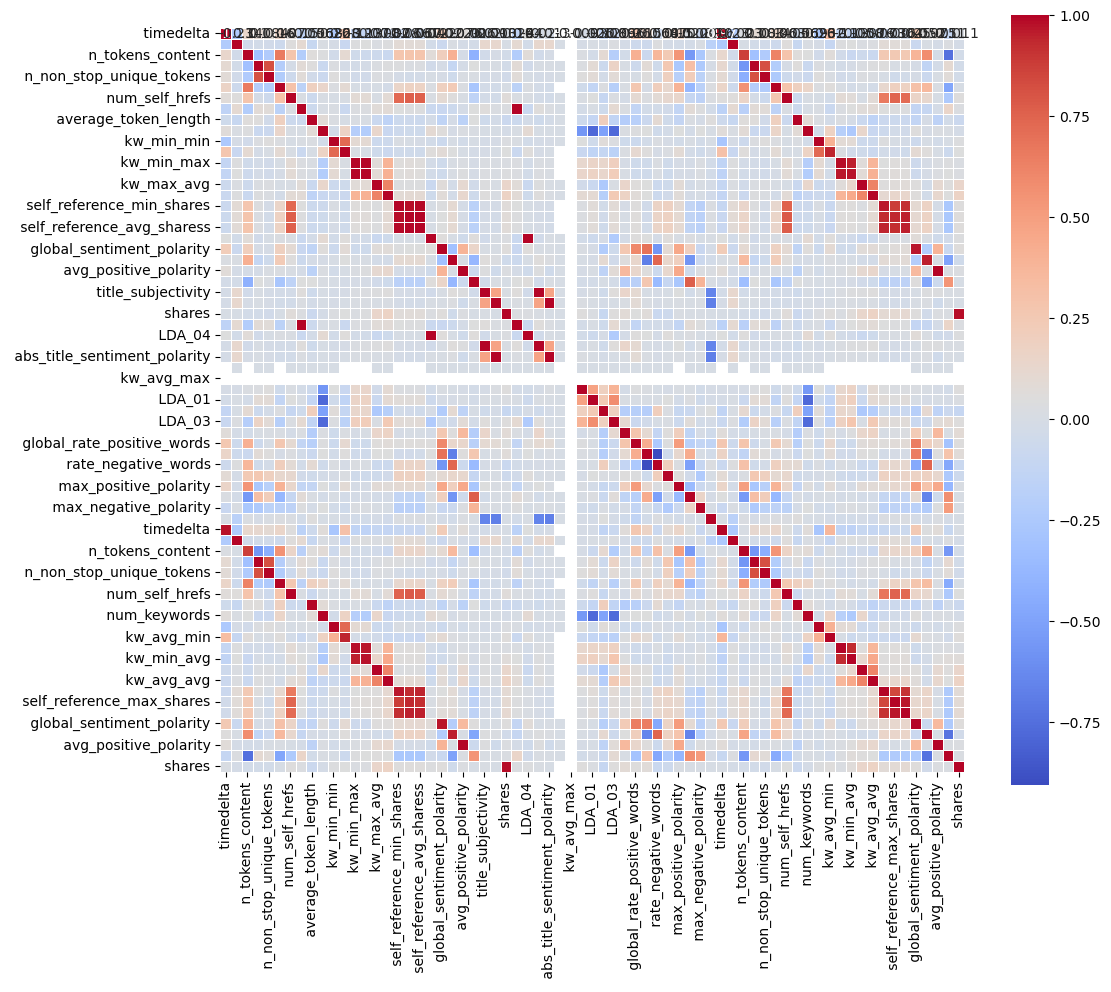

In [618]:
plt.figure(figsize = (12,10))
sns.heatmap(correlation_matrix , annot = True , cmap = 'coolwarm' , square = True , linewidth = .5)
plt.show()

In [620]:
df5.columns

Index([' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_videos', ' average_token_length',
       ' num_keywords', ' kw_min_min', ' kw_avg_min', ' kw_min_max',
       ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', ' LDA_04', ' global_sentiment_polarity',
       ' global_rate_negative_words', ' avg_positive_polarity',
       ' avg_negative_polarity', ' title_subjectivity',
       ' abs_title_sentiment_polarity', ' shares', ' num_videos', ' LDA_04',
       ' title_subjectivity', ' abs_title_sentiment_polarity', ' kw_max_min',
       ' kw_avg_max', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03',
       ' global_subjectivity', ' global_rate_positive_words',
       ' rate_positive_words', ' rate_negative_words',
       ' min_positive_polarity', ' max_positive_polarity',
       ' min_negati

In [622]:
df4.shape

(10403, 60)

In [752]:
duplicate_columns = df4.duplicated()
duplicate_columns

0        False
1        False
2        False
3        False
4        False
         ...  
10398    False
10399    False
10400    False
10401    False
10402    False
Length: 10403, dtype: bool

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


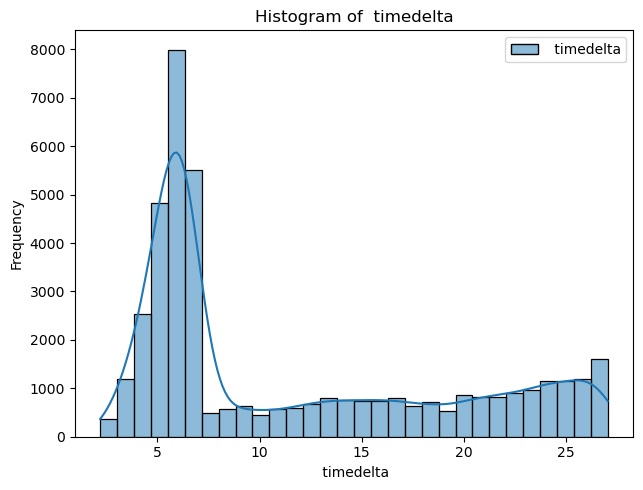

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


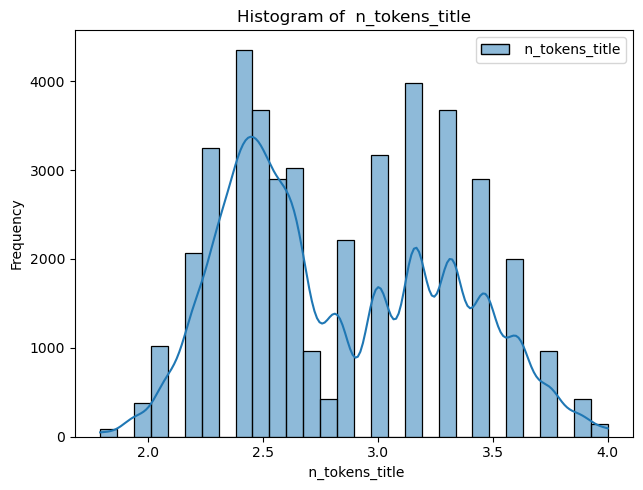

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


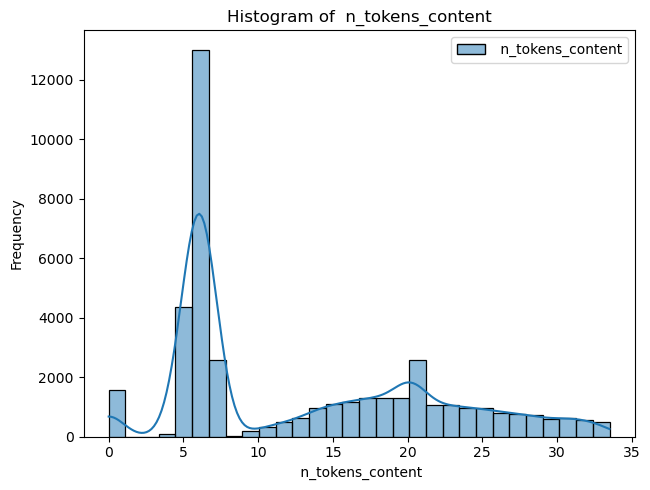

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


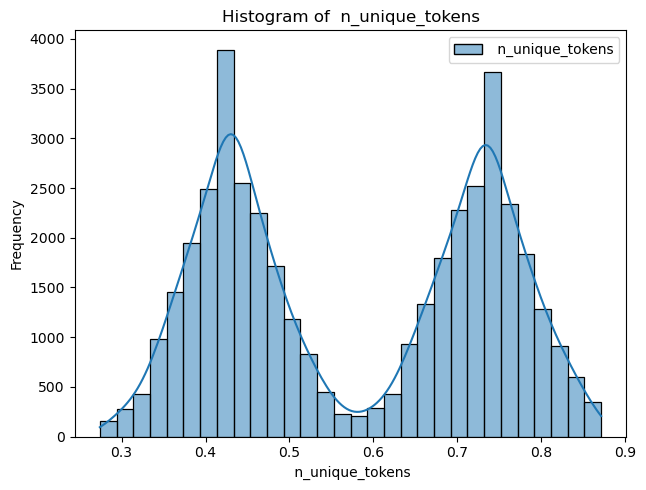

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


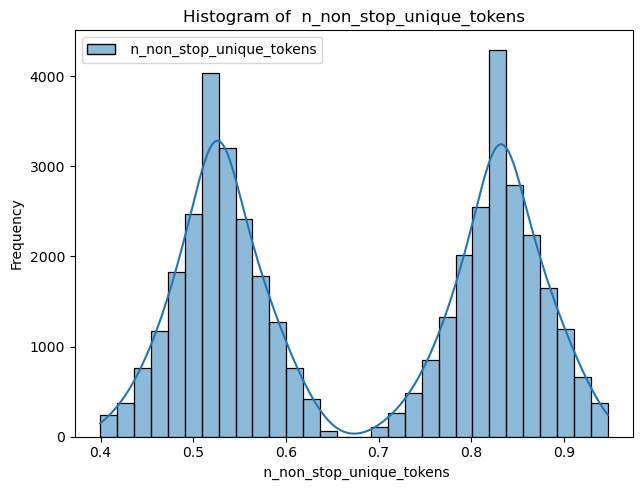

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


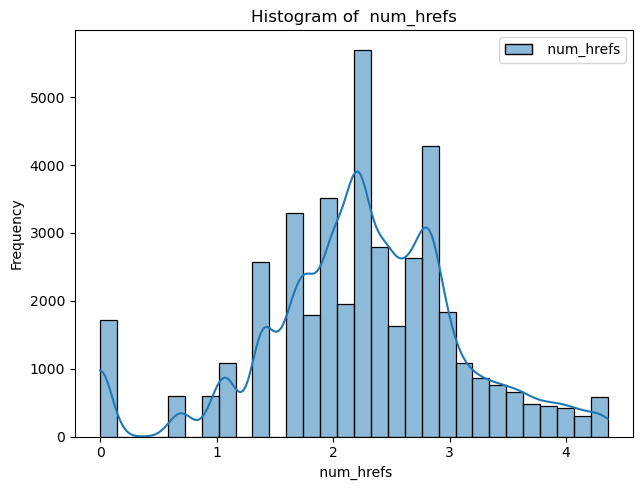

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


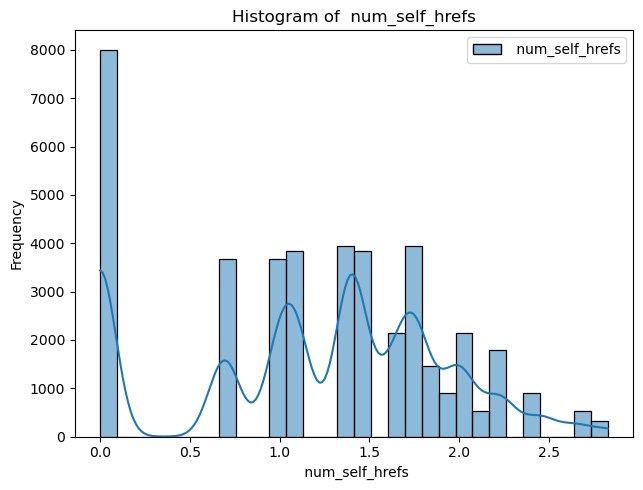

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


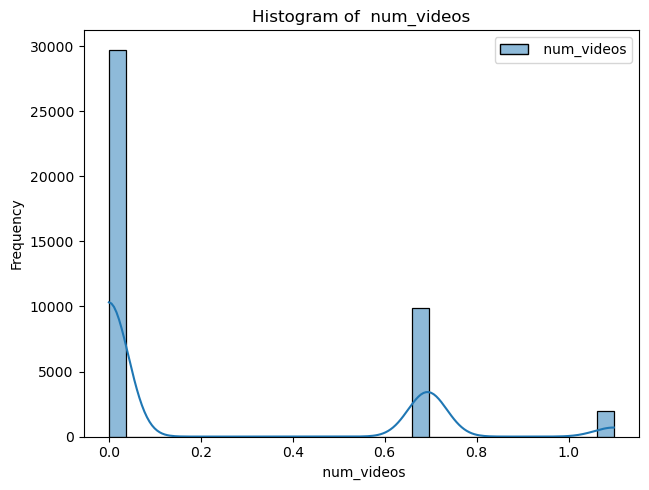

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


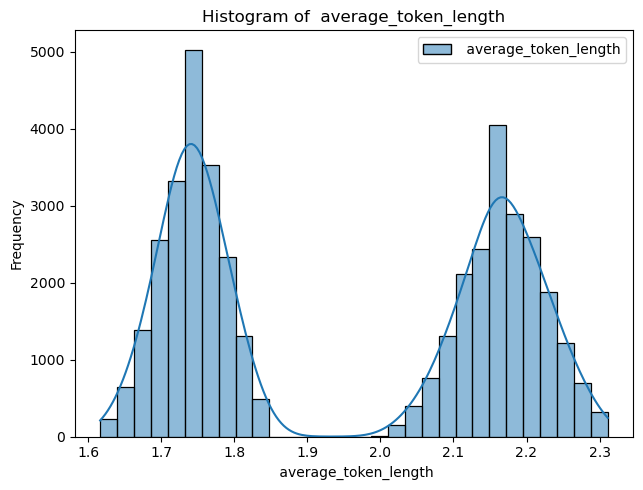

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


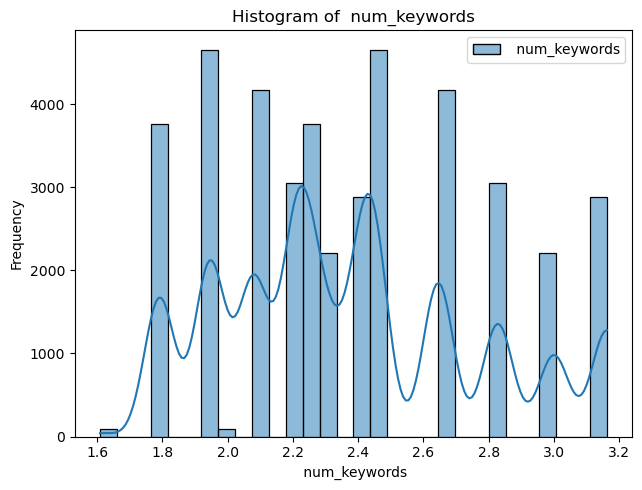

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


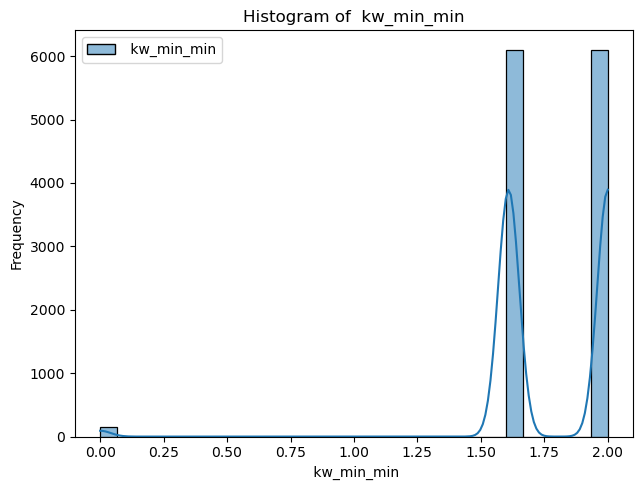

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


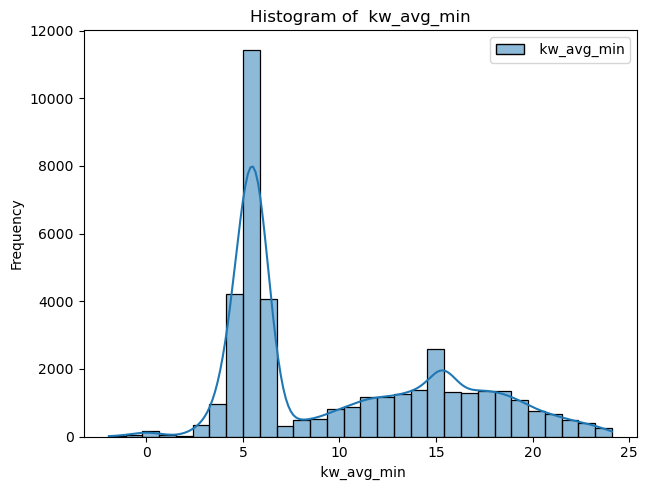

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


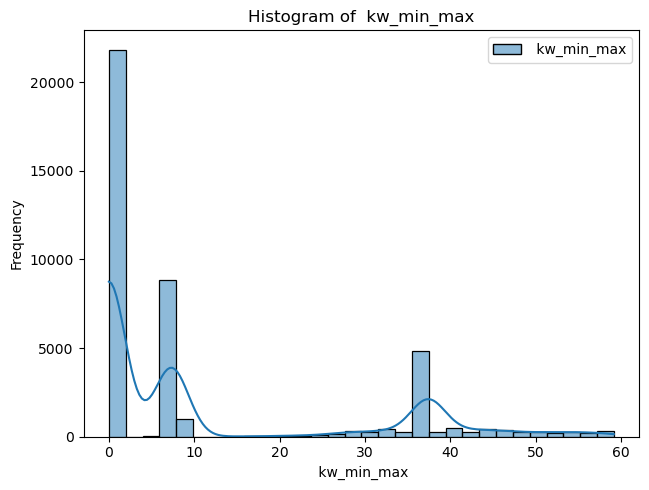

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


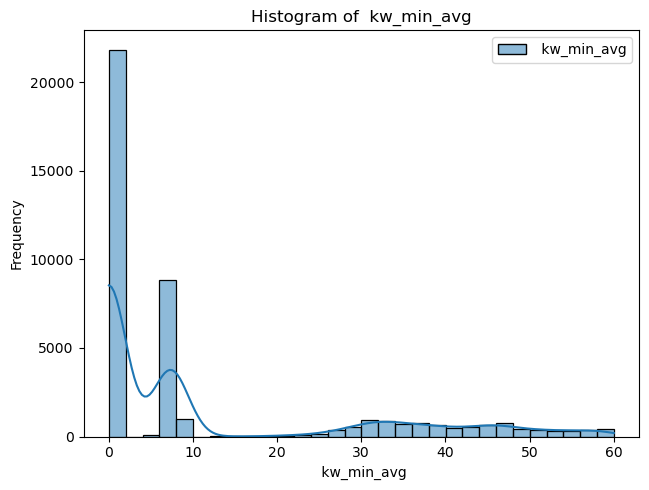

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


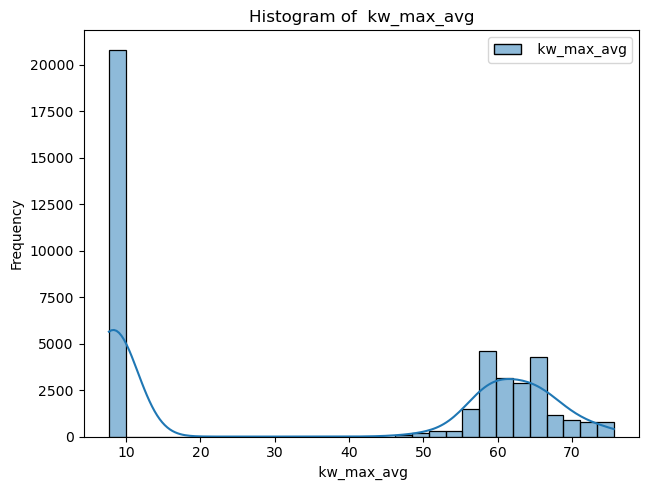

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


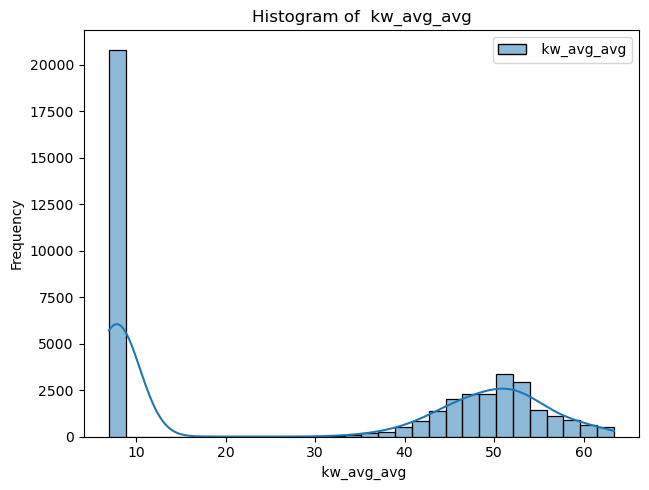

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


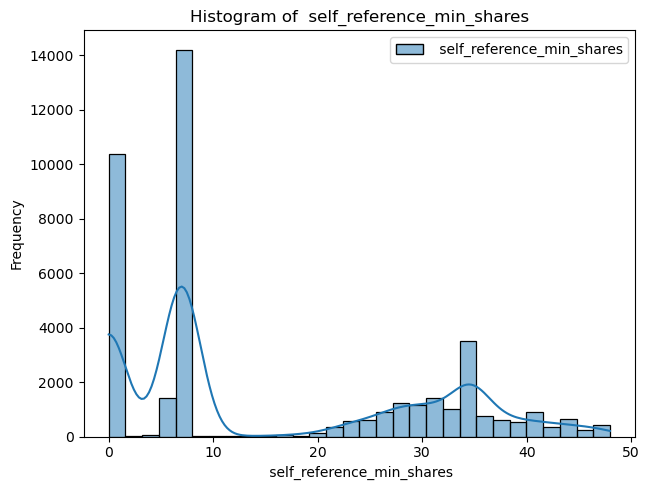

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


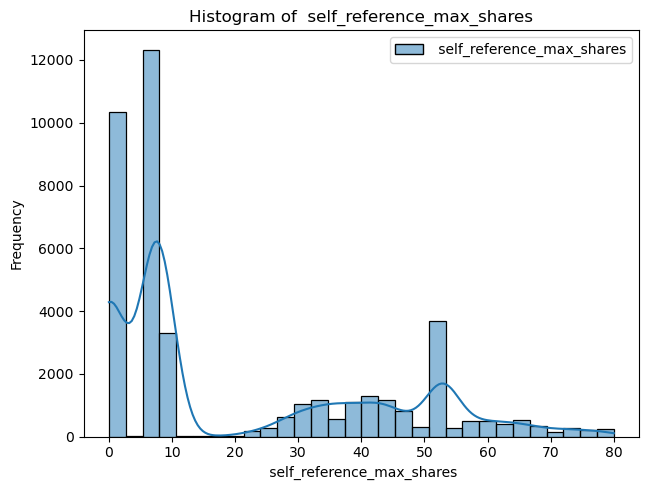

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


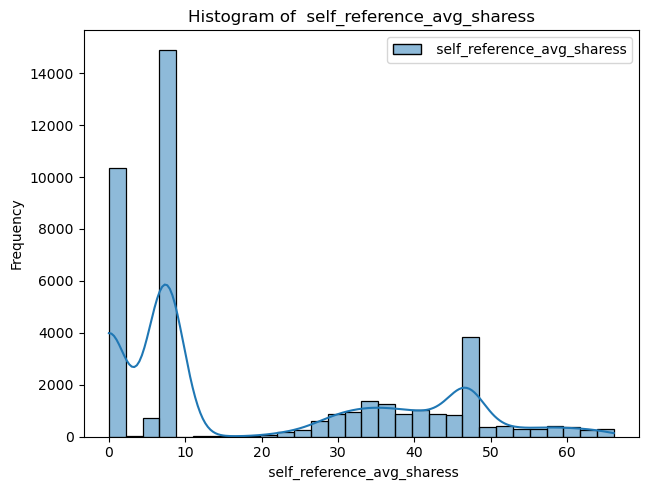

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


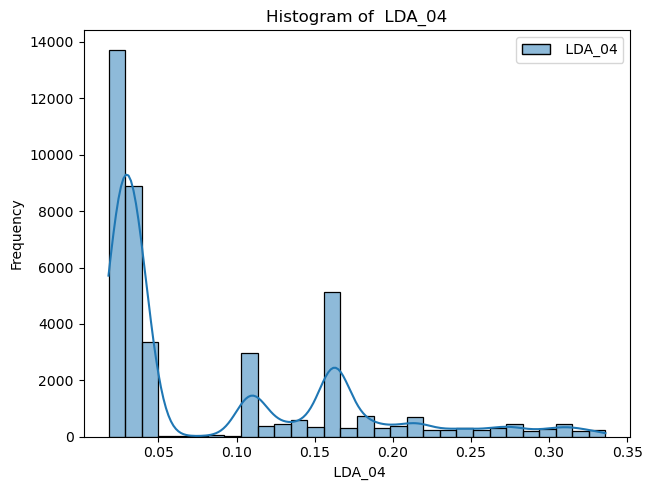

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


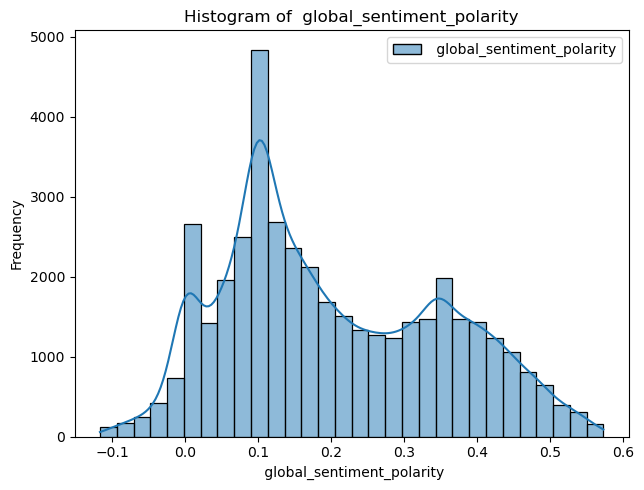

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


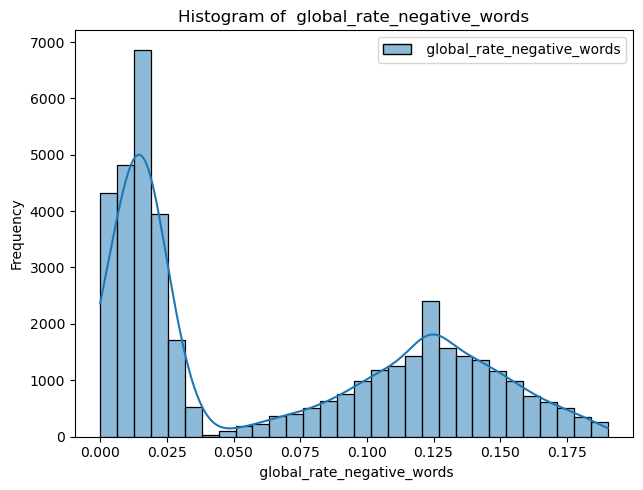

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


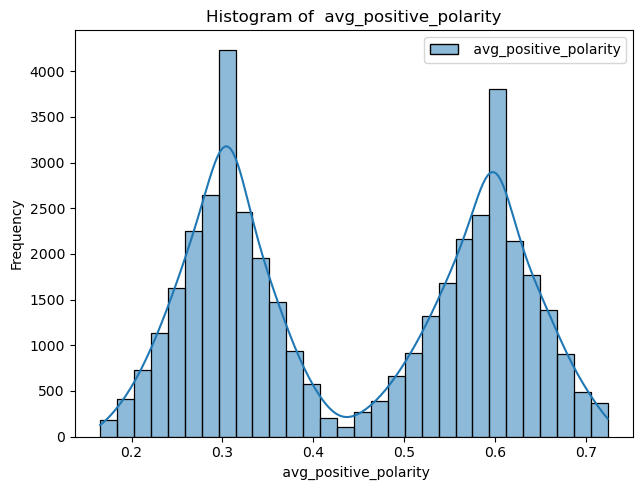

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


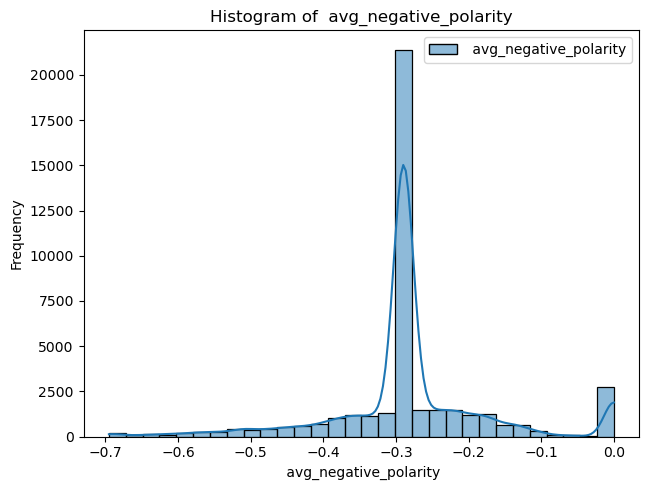

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


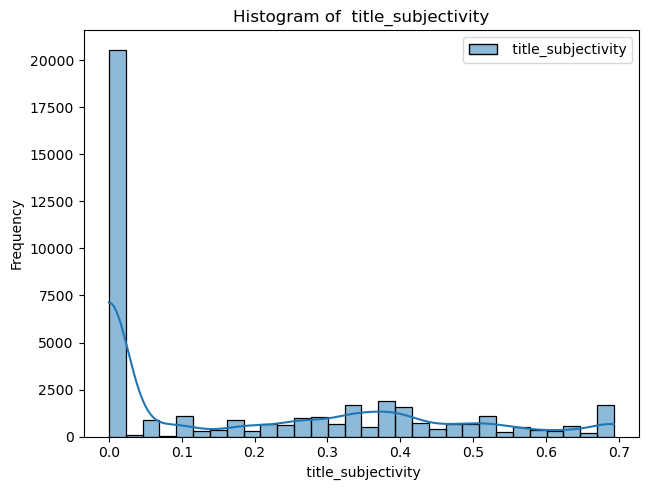

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


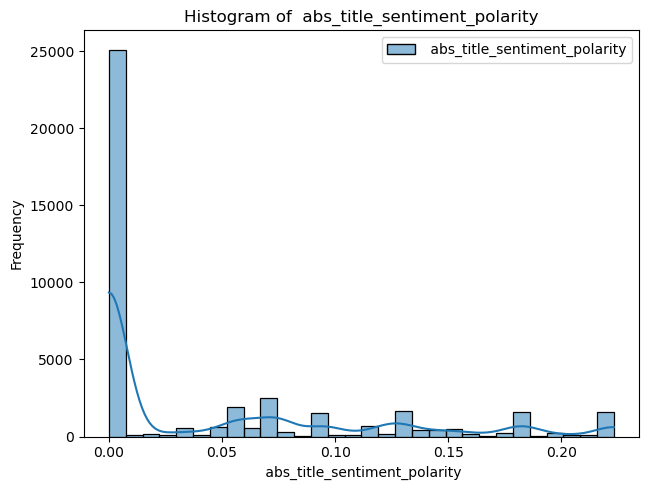

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


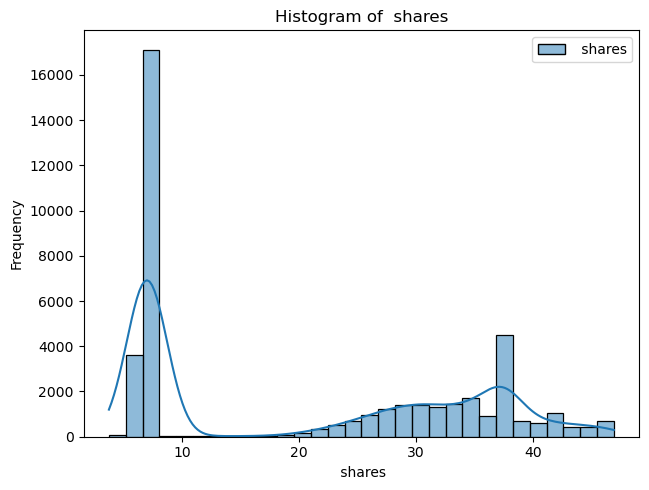

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


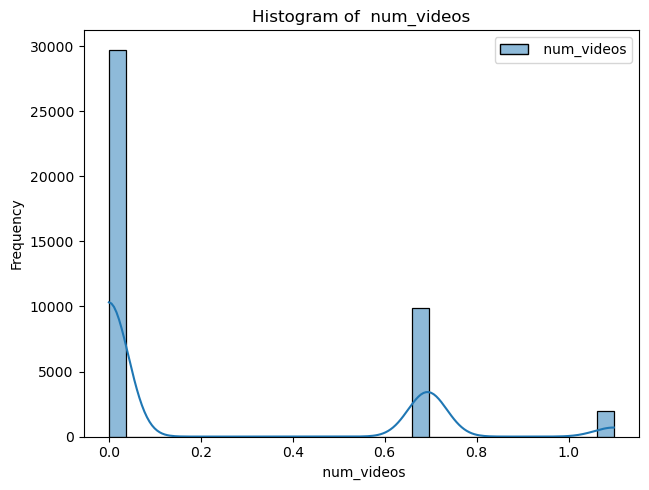

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


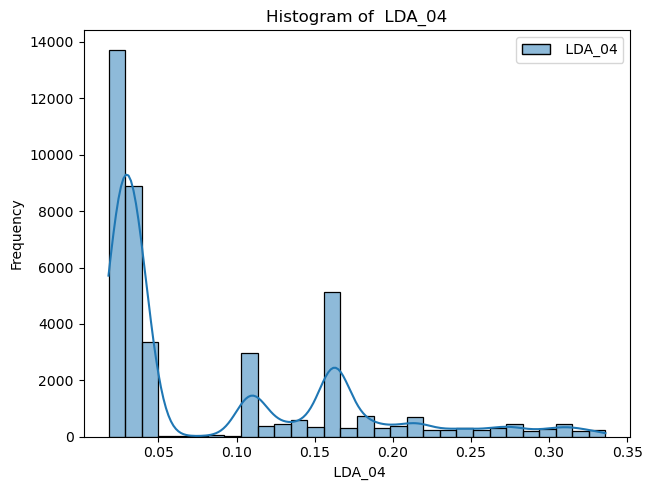

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


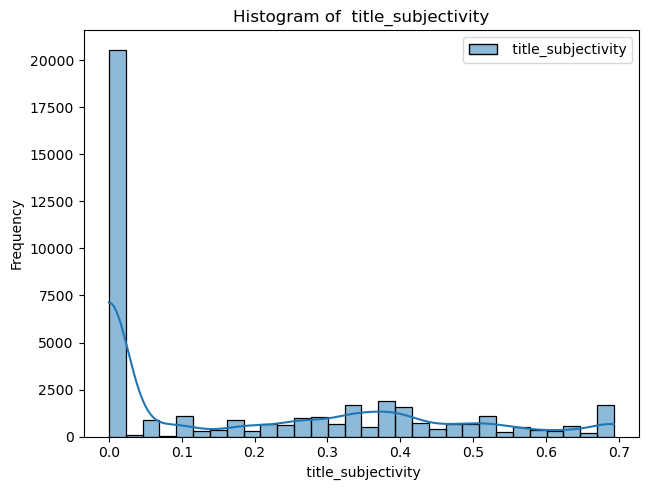

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


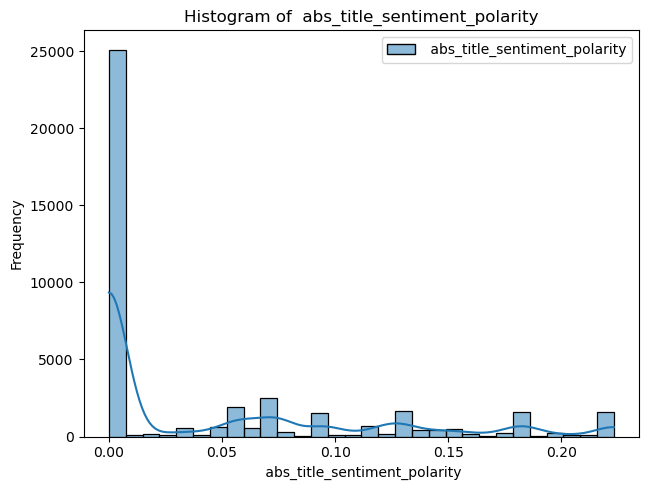

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Najma\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


ValueError: array must not contain infs or NaNs

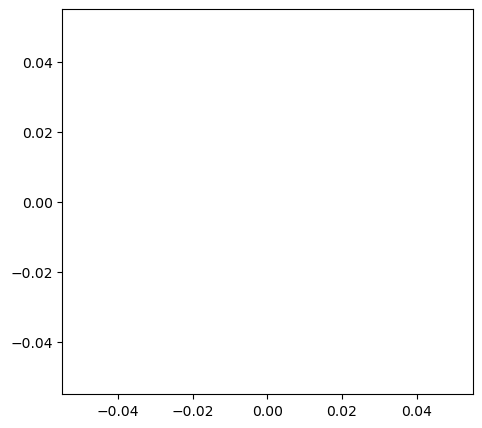

In [624]:

# Get numerical columns
numerical_cols = df5.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(18, 5))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df5[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [ ]:
# Boxplot
# Select numerical columns
numerical_cols = df5.select_dtypes(include=['int64','float64'])
print(numerical_cols.skew())

# create subplots
fig,axes = plt.subplots(nrows = 5  ,figsize =(15,15))
axex = axes.flatten()

#Plot BOXPLOT for each numerical columns

for i,column in enumerate(numerical_cols):
    sns.boxplot(y = df5[column], ax = axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()


In [ ]:
# Pair Plot
numerical_cols = df5.select_dtypes(include=['int64', 'float64']).columns

# Remove non-numeric columns before using pairplot
numeric_df5 = df5.select_dtypes(include=['number'])

# Pairplot on numerical data only
sns.pairplot(numeric_df5) 

plt.title('Pair Plot of Numerical Features')
plt.show()

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


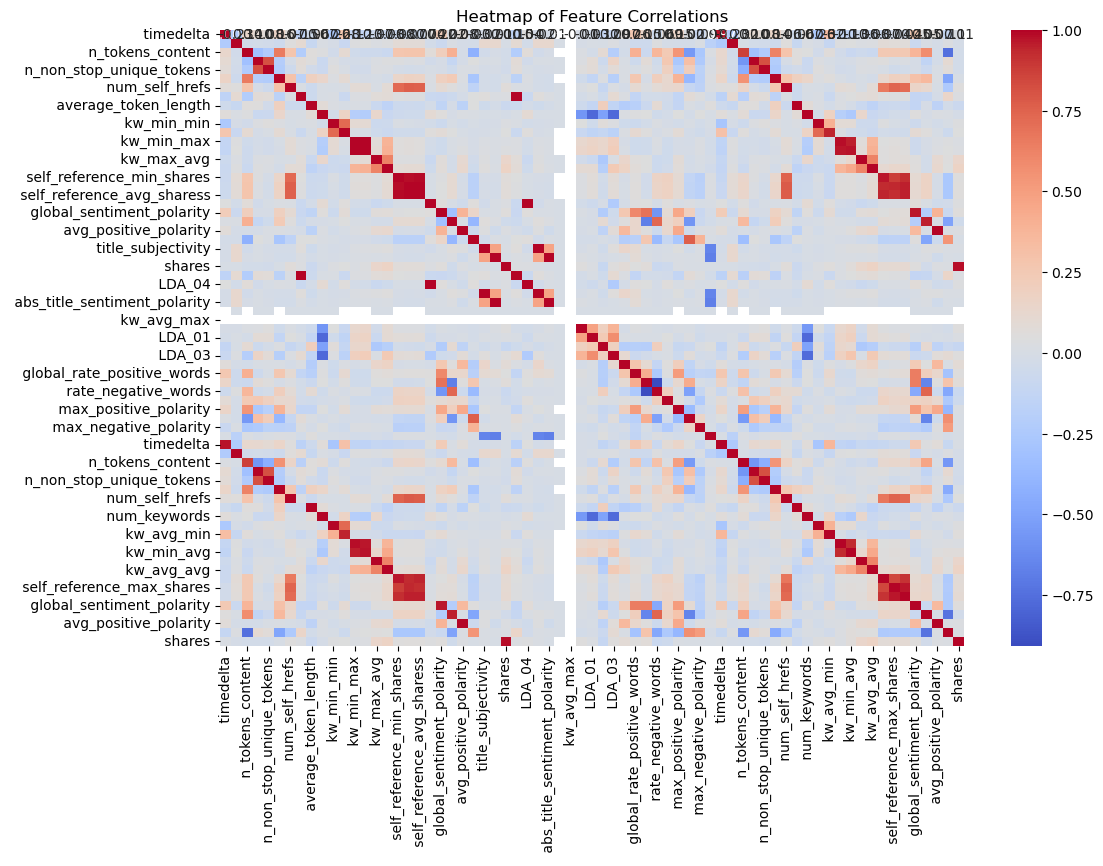

In [638]:
# Heatmap for correlation
plt.figure(figsize=(12, 8))
correlation_matrix = df5.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()

In [648]:
# Get categorical columns
categorical_cols = df5.select_dtypes(include=['object', 'category']).columns

# Bar Plot and Pie Chart for Categorical Columns
for col in categorical_cols:
    plt.figure(figsize=(22, 5))

    # Bar Plot
    plt.subplot(1, 2, 1)
    sns.countplot(x=df5[col])
    plt.title(f'Bar Plot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    


categorical_cols = df5.select_dtypes(include=['object', 'category']).columns

# Bar Plot and Pie Chart for Categorical Columns
for col in categorical_cols:
    plt.figure(figsize=(22, 5))
    
    
    # Pie Chart
    plt.subplot(1, 2, 2)
    df[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')

    plt.tight_layout()
    plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=df5.index, y='Values', data=df5)
plt.title('Line Plot of Values Over Index')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()

In [ ]:
# KDE Plot for 'Values' column
plt.figure(figsize=(6, 4))
sns.kdeplot(df5['Values'], shade=True, color='blue')
plt.title('Kernel Density Estimation (KDE) of Values')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

#### Feature Engineering:
   - Identify and encode categorical features using techniques like one-hot encoding or label encoding.


In [657]:
non_numeric_columns = df5.select_dtypes(include=['object', 'category', 'bool'])

from sklearn.preprocessing import LabelEncoder

# Label Encoder
label_encoder = LabelEncoder()

# Apply Label Encoding to non-numeric (categorical) columns
for col in non_numeric_columns:
    df5[col] = label_encoder.fit_transform(df5[col])

# Show the transformed DataFrame
print(df5)

        timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
0        6.595781         2.564949           5.393628          0.508981   
1        6.595781         2.302585           5.356586          0.454338   
2        6.595781         2.302585           6.276643          0.407987   
3        6.595781         2.197225           6.867974          0.349362   
4        6.595781         2.484907           4.584967          0.512885   
...           ...              ...                ...               ...   
10398    2.302585         2.639057           6.025866          0.442552   
10399    2.302585         2.708050           6.774224          0.392516   
10400    2.302585         2.639057           6.616065          0.382064   
10401    2.197225         2.484907           5.411646          0.502684   
10402    2.197225         1.945910           6.526495          0.431453   

        n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_videos  \
0                    

### Feature Selection:
   - Use algorithms like Random Forest and Select K Best to identify relevant features.
   - Remove redundant or irrelevant features.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd


X = df5.drop(columns=[' shares'])  # Independent variables (drop the target column)
y = df5[' shares']  # Target variable 

# Create a Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X, y)

# Get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Print feature importance
print("Feature Importance from Random Forest Regressor:\n", feature_importance)

# Select top n important features (e.g., top 10)
top_n_features = feature_importance.head(10).index
X_selected_rf = X[top_n_features]

In [666]:
print(df5.isna().sum())

 timedelta                     0
 n_tokens_title                0
 n_tokens_content              0
 n_unique_tokens               0
 n_non_stop_unique_tokens      0
                              ..
 global_sentiment_polarity     0
 global_rate_negative_words    0
 avg_positive_polarity         0
 avg_negative_polarity         0
 shares                        0
Length: 69, dtype: int64


In [682]:
# Check for infinity values in each column
print(np.isinf(X).sum())

 timedelta                     0
 n_tokens_title                0
 n_tokens_content              0
 n_unique_tokens               0
 n_non_stop_unique_tokens      0
                              ..
 self_reference_avg_sharess    0
 global_sentiment_polarity     0
 global_rate_negative_words    0
 avg_positive_polarity         0
 avg_negative_polarity         0
Length: 67, dtype: int64


### Check for Extremely Large Values

In [684]:
print(X.describe())

C:\Users\Najma\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


          timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count  10403.000000     10403.000000       10403.000000      10403.000000   
mean       5.554844         2.423959           5.789043          0.429250   
std        0.936621         0.185201           1.278514          0.054661   
min        2.197225         1.791759           0.000000          0.274174   
25%        5.043425         2.302585           5.579730          0.393159   
50%        5.811141         2.397895           6.016157          0.431279   
75%        6.327937         2.564949           6.434547          0.465119   
max        6.595781         2.833213           7.024649          0.564705   

        n_non_stop_unique_tokens     num_hrefs   num_self_hrefs    num_videos  \
count               10403.000000  10403.000000     10403.000000  10403.000000   
mean                    0.526597      1.957417         1.050340      0.217350   
std                     0.045908      0.655247         0.639956

### Cap Extremely Large Values

In [688]:
# Set a threshold for large values (for example, 1e10)
threshold = 1e10

# Cap all values in the DataFrame to this threshold
X_capped = X.clip(upper=threshold)

### Convert to float32 Data Type 

In [691]:
# Convert the DataFrame to float32
X_capped = X_capped.astype('float32')

### Scale the Data

In [694]:
from sklearn.preprocessing import StandardScaler

# Apply Standard Scaling to bring all features to a standard scale (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_capped)

###  Train the Model Again

In [699]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)

RandomForestRegressor(random_state=42)

In [704]:
from sklearn.ensemble import RandomForestRegressor



X = df5.drop(columns=[' shares'])  # Independent variables (drop the target column)
y = df5[' shares']  # Target variable 

# Create a Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_scaled, y)

# Get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Print feature importance
print("Feature Importance from Random Forest Regressor:\n", feature_importance)

# Select top n important features (e.g., top 10)
top_n_features = feature_importance.head(10).index
X_selected_rf = X[top_n_features]

Feature Importance from Random Forest Regressor:
  timedelta                0.042172
 timedelta                0.038964
 kw_avg_avg               0.035342
 global_subjectivity      0.034359
 kw_avg_avg               0.033728
                            ...   
 kw_min_min               0.001290
 kw_max_min               0.000574
 avg_negative_polarity    0.000131
 kw_min_min               0.000020
 kw_avg_max               0.000000
Length: 67, dtype: float64


### Divide the dataset into training and testing subsets

In [709]:
# Split the dataset: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes to verify the split
print("Training data shape (X_train):", X_train.shape)
print("Testing data shape (X_test):", X_test.shape)
print("Training labels shape (y_train):", y_train.shape)
print("Testing labels shape (y_test):", y_test.shape)

Training data shape (X_train): (8322, 67)
Testing data shape (X_test): (2081, 67)
Training labels shape (y_train): (8322, 2)
Testing labels shape (y_test): (2081, 2)


In [719]:
duplicate_column = df5.T.duplicated()

In [756]:
sum(duplicate_column)

4

In [760]:
df5.duplicated().sum()

0

In [734]:
# Check if there are any duplicates in the column
has_duplicates = df5[' shares'].duplicated().any()

if not has_duplicates:
    print(f"Column '{df5[' shares']}' is unique.")
else:
    print(f"Column '{df5[' shares']}' has duplicate values.")

Column '         shares     shares
0      6.386879  24.351591
1      7.313887  38.729833
2      7.090910  34.641016
3      6.322565  23.579652
4      7.244942  37.416574
...         ...        ...
10398  7.096921  34.745378
10399  7.090910  34.641016
10400  6.818924  30.232433
10401  7.090910  34.641016
10402  7.003974  33.166248

[10403 rows x 2 columns]' has duplicate values.


In [732]:
# Step 1: Transpose the DataFrame and check for duplicates
duplicate_columns = df5.T.duplicated()

# Step 2: Get the names of duplicate columns
duplicate_column_names = df5.columns[duplicate_columns]

# Step 3: Print the duplicate column names
print("Duplicate columns:")
print(duplicate_column_names)

Duplicate columns:
Index([' num_videos', ' LDA_04', ' title_subjectivity',
       ' abs_title_sentiment_polarity'],
      dtype='object')
